In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import re
import seaborn as sns
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [2]:
home_path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/'
PROBLEM = 'regression' # 'regression' or 'given_presence' or 'classification'
SPECIES = 'segal_species' # 'mpa_species' or 'segal_species'

In [3]:
palette = sns.color_palette("Set2", n_colors=8)
single_style = "nature_single.mplstyle"
double_style = "nature_double.mplstyle"
third_style = "nature_third.mplstyle"
plt.rcParams["figure.dpi"] = 150
plt.style.use(single_style)
seq_palette = sns.dark_palette(palette[0], n_colors=8, as_cmap=True)

In [4]:
def read_results(df):
    output = []
    for col in df.columns:
        output.append(df[col])
    return tuple(output)

In [5]:
diet_mb = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{SPECIES}/diet_mb.pkl")
diet_mb_train = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{SPECIES}/diet_mb_baseline_train.pkl")
with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{SPECIES}/my_lists.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, all_features, targets = loaded_lists

diet_mb

Acorn squash  Alfalfa sprouts  Almond Beverage  \
RegistrationCode                                                   
10K_1000942861             0.0              0.0              0.0   
10K_1001201093             0.0              0.0              0.0   
10K_1002254441             0.0              0.0              0.0   
10K_1003113258             0.0              0.0              0.0   
10K_1007330152             0.0              0.0              0.0   
...                        ...              ...              ...   
10K_9996884777             0.0              0.0              0.0   
10K_9998420917             0.0              0.0              0.0   
10K_9998635752             0.0              0.0              0.0   
10K_9999226141             0.0              0.0              0.0   
10K_9999409119             0.0              0.0              0.0   

                  Almond flour  Almond spread   Almonds  Amba     Apple  \
RegistrationCode                                                          
10K_1000942861             0.0            0.0  0.000000   0.0  0.016416   
10K_1001201093             0.0            0.0  0.000000   0.0  0.013895   
10K_1002254441             0.0            0.0  0.081238   0.0  0.000000   
10K_1003113258             0.0            0.0  0.002048   0.0  0.008929   
10K_1007330152             0.0            0.0  0.000000   0.0  0.000000   
...                        ...            ...       ...   ...       ...   
10K_9996884777             0.0            0.0  0.002401   0.0  0.000000   
10K_9998420917             0.0            0.0  0.019995   0.0  0.018783   
10K_9998635752             0.0            0.0  0.001607   0.0  0.011305   
10K_9999226141             0.0            0.0  0.003292   0.0  0.000000   
10K_9999409119             0.0            0.0  0.000000   0.0  0.002834   

                  Apple Cake  Apple Vinegar  ...  \
RegistrationCode                             ...   
10K_1000942861      0.000000            0.0  ...   
10K_1001201093      0.000000            0.0  ...   
10K_1002254441      0.000000            0.0  ...   
10K_1003113258      0.000000            0.0  ...   
10K_1007330152      0.000000            0.0  ...   
...                      ...            ...  ...   
10K_9996884777      0.000000            0.0  ...   
10K_9998420917      0.000000            0.0  ...   
10K_9998635752      0.000000            0.0  ...   
10K_9999226141      0.000000            0.0  ...   
10K_9999409119      0.020391            0.0  ...   

                  fBin__94|gBin__449|sBin__656  fBin__95|gBin__450|sBin__659  \
RegistrationCode                                                               
10K_1000942861                            -4.0                          -4.0   
10K_1001201093                            -4.0                          -4.0   
10K_1002254441                            -4.0                          -4.0   
10K_1003113258                            -4.0                          -4.0   
10K_1007330152                            -4.0                          -4.0   
...                                        ...                           ...   
10K_9996884777                            -4.0                          -4.0   
10K_9998420917                            -4.0                          -4.0   
10K_9998635752                            -4.0                          -4.0   
10K_9999226141                            -4.0                          -4.0   
10K_9999409119                            -4.0                          -4.0   

                  fBin__96|gBin__457|sBin__669  fBin__97|gBin__462|sBin__676  \
RegistrationCode                                                               
10K_1000942861                            -4.0                     -4.000000   
10K_1001201093                            -4.0                     -4.000000   
10K_1002254441                            -4.0                     -4.000000   
10K_1003113258                         

In [6]:
diversity_targets = ['Richness', 'Shannon_diversity']

In [7]:
# Filter non significant correlations from the permutations
with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/significant_targets.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
significant_targets = loaded_lists
significant_targets_indices = [targets.index(item) for item in significant_targets]

In [8]:
significant_targets[:6]

['fBin__100|gBin__473|sBin__693',
 'fBin__100|gBin__473|sBin__694',
 'fBin__100|gBin__477|sBin__698',
 'fBin__100|gBin__481|sBin__704',
 'fBin__100|gBin__481|sBin__705',
 'fBin__100|gBin__481|sBin__706']

In [9]:
mb_names = pd.read_pickle("/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/mb_names.pkl")

In [10]:
if PROBLEM != 'classification':
    results = pd.read_pickle(home_path + f"data/{PROBLEM}/{SPECIES}/output_ridge_div.pkl")
if PROBLEM == 'regression':
    ridge_div_scores, ridge_div_pvalues, ridge_div_coefs, ridge_div_preds, ridge_div_targets = read_results(results)
elif PROBLEM == 'given_presence':
    ridge_div_scores, ridge_div_pvalues, ridge_div_coefs, ridge_div_preds, ridge_div_targets, ridge_div_prevalence = read_results(results)

results = pd.read_pickle(home_path + f"data/{PROBLEM}/{SPECIES}/output_LGBM_abundance.pkl")
if PROBLEM == 'regression':
    lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets = read_results(results)
elif PROBLEM == 'given_presence':
    lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_prevalence = read_results(results)
elif PROBLEM == 'classification':
    lgbm_diet_acc, lgbm_diet_auc, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_pvalues = read_results(results)
    lgbm_diet_scores = lgbm_diet_auc

print(lgbm_diet_scores)


0      0.049718
1      0.069676
2      0.014241
3      0.120000
4      0.051829
         ...   
719    0.029393
720    0.066482
721    0.053365
722    0.055417
723    0.087675
Name: 0, Length: 724, dtype: float64


In [11]:
lgbm_diet_scores = lgbm_diet_scores.loc[significant_targets_indices]

In [12]:
top_microbes = lgbm_diet_scores.sort_values(ascending=False)
top_microbes = top_microbes.head(16)
top_microbes

594    0.426409
46     0.423344
223    0.376008
34     0.361910
221    0.324238
507    0.319985
32     0.312853
586    0.306736
309    0.306629
237    0.302236
579    0.295812
201    0.291234
76     0.279224
191    0.263671
190    0.258683
610    0.257005
Name: 0, dtype: float64

In [13]:
# For summary plot
print(list(top_microbes.index))

[594, 46, 223, 34, 221, 507, 32, 586, 309, 237, 579, 201, 76, 191, 190, 610]


In [14]:
map_df = pd.read_csv(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/map_df.csv', index_col=0)
map_df

index.1                    Microbe_Name  Pearson Correlation  \
index                                                                 
594        594  Lawsonibacter asaccharolyticus             0.426409   
46          46      Streptococcus thermophilus             0.423344   
223        223            UBA11774 sp003507655             0.376008   
34          34          Bifidobacterium longum             0.361910   
221        221             Pararoseburia lenta             0.324238   
...        ...                             ...                  ...   
599        599  Ruminococcus_F champanellensis             0.025609   
350        350        Congzhengia minquanensis             0.025561   
634        634        Ruminococcus sp900540005             0.025512   
348        348  Neochristensenella sp003150515             0.024920   
524        524             CAG-170 sp934668295             0.023886   

                               targets  prevalence_count  prevalence_pct  
index                                                                     
594    fBin__541|gBin__2135|sBin__3290              8631           85.73  
46      fBin__187|gBin__748|sBin__1116              3937           39.10  
223    fBin__367|gBin__1458|sBin__2166              7312           72.63  
34       fBin__121|gBin__572|sBin__848              7194           71.45  
221    fBin__367|gBin__1456|sBin__2163              3801           37.75  
...                                ...               ...             ...  
599    fBin__564|gBin__2174|sBin__3339               601            5.97  
350    fBin__431|gBin__1689|sBin__2491               573            5.69  
634    fBin__601|gBin__2279|sBin__3480              1114           11.06  
348    fBin__424|gBin__1678|sBin__2480               748            7.43  
524    fBin__541|gBin__2057|sBin__3150              2344           23.28  

[664 rows x 6 columns]

In [15]:
map_df.loc[map_df['Microbe_Name'].str.contains('Law', case=False)]

index.1                    Microbe_Name  Pearson Correlation  \
index                                                                 
594        594  Lawsonibacter asaccharolyticus             0.426409   
589        589             Lawsonibacter aceti             0.186059   
593        593            Lawsonibacter faecis             0.169462   
592        592       Lawsonibacter sp900549405             0.167421   
585        585         Lawsonibacter_A hominis             0.132799   
595        595       Lawsonibacter sp900066825             0.096937   
591        591       Lawsonibacter sp000177015             0.056903   

                               targets  prevalence_count  prevalence_pct  
index                                                                     
594    fBin__541|gBin__2135|sBin__3290              8631           85.73  
589    fBin__541|gBin__2130|sBin__3281              6562           65.18  
593    fBin__541|gBin__2134|sBin__3288              6893           68.46  
592    fBin__541|gBin__2134|sBin__3287              5403           53.67  
585    fBin__541|gBin__2123|sBin__3272              1746           17.34  
595    fBin__541|gBin__2137|sBin__3295              1038           10.31  
591    fBin__541|gBin__2133|sBin__3285               511            5.08

In [16]:
# mean_abs_shap_ridge_div = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_ridge_div.pkl")
# # mean_abs_shap_ridge_abundance = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_ridge_abundance.pkl")
# mean_abs_shap_lgbm_div = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_div.pkl")
mean_abs_shap_lgbm_abundance = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_abundance.pkl")
mean_abs_shap_lgbm_abundance

0         1         2         3         4         5         6  \
0    0.000007  0.000007  0.000000  0.000031  0.000131  0.000016  0.000337   
1    0.000071  0.000016  0.000982  0.000054  0.000046  0.000024  0.000000   
2    0.000360  0.000000  0.000019  0.000031  0.000161  0.000752  0.000014   
3    0.000158  0.000000  0.000005  0.000000  0.000000  0.000021  0.000000   
4    0.000020  0.000000  0.000000  0.000000  0.000004  0.000107  0.000014   
..        ...       ...       ...       ...       ...       ...       ...   
695  0.000402  0.000178  0.000384  0.000174  0.000469  0.000113  0.001995   
696  0.000421  0.001009  0.001826  0.000665  0.000460  0.000843  0.001028   
697  0.003380  0.010083  0.000146  0.017522  0.003861  0.000958  0.006327   
698  0.000208  0.000063  0.000901  0.029013  0.003368  0.006677  0.003824   
699  0.000296  0.000722  0.001675  0.000740  0.000284  0.000291  0.000524   

            7         8         9  ...       714       715       716  \
0    0.000000  0.000039  0.000007  ...  0.000000  0.000016  0.000000   
1    0.000018  0.000010  0.000097  ...  0.000010  0.000007  0.000106   
2    0.000038  0.000179  0.000107  ...  0.000016  0.000845  0.000285   
3    0.000005  0.000318  0.000022  ...  0.000000  0.000000  0.000010   
4    0.000028  0.000000  0.000055  ...  0.000008  0.000026  0.000032   
..        ...       ...       ...  ...       ...       ...       ...   
695  0.000250  0.000458  0.000965  ...  0.000070  0.000436  0.000258   
696  0.001824  0.000355  0.001686  ...  0.000672  0.000195  0.003634   
697  0.006545  0.008957  0.013022  ...  0.000188  0.001344  0.007692   
698  0.024507  0.000341  0.044985  ...  0.000029  0.000569  0.045005   
699  0.000682  0.000587  0.001822  ...  0.000466  0.001179  0.002807   

          717       718       719       720       721       722       723  
0    0.000039  0.000000  0.000000  0.000000  0.000157  0.000017  0.000000  
1    0.000021  0.000223  0.000000  0.000000  0.000000  0.000018  0.000000  
2    0.000029  0.000481  0.000153  0.000013  0.001172  0.000389  0.000322  
3    0.000585  0.000026  0.000101  0.000000  0.000000  0.000032  0.000000  
4    0.000110  0.000030  0.000137  0.000000  0.000094  0.000013  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
695  0.000148  0.000074  0.000150  0.000247  0.000081  0.000150  0.000068  
696  0.002033  0.005783  0.000336  0.000594  0.000722  0.000173  0.001049  
697  0.002013  0.000813  0.000584  0.000918  0.000388  0.000917  0.000210  
698  0.000138  0.000074  0.000843  0.000039  0.005119  0.003938  0.000108  
699  0.001042  0.000177  0.000233  0.000837  0.000175  0.001321  0.000216  

[700 rows x 724 columns]

In [17]:
mean_abs_shap_lgbm_abundance = mean_abs_shap_lgbm_abundance.iloc[:, significant_targets_indices]
mean_abs_shap_lgbm_abundance

0         1         3         4         5         6         7  \
0    0.000007  0.000007  0.000031  0.000131  0.000016  0.000337  0.000000   
1    0.000071  0.000016  0.000054  0.000046  0.000024  0.000000  0.000018   
2    0.000360  0.000000  0.000031  0.000161  0.000752  0.000014  0.000038   
3    0.000158  0.000000  0.000000  0.000000  0.000021  0.000000  0.000005   
4    0.000020  0.000000  0.000000  0.000004  0.000107  0.000014  0.000028   
..        ...       ...       ...       ...       ...       ...       ...   
695  0.000402  0.000178  0.000174  0.000469  0.000113  0.001995  0.000250   
696  0.000421  0.001009  0.000665  0.000460  0.000843  0.001028  0.001824   
697  0.003380  0.010083  0.017522  0.003861  0.000958  0.006327  0.006545   
698  0.000208  0.000063  0.029013  0.003368  0.006677  0.003824  0.024507   
699  0.000296  0.000722  0.000740  0.000284  0.000291  0.000524  0.000682   

            9        10        11  ...       713       715       716  \
0    0.000007  0.001650  0.000051  ...  0.000007  0.000016  0.000000   
1    0.000097  0.000000  0.000003  ...  0.000020  0.000007  0.000106   
2    0.000107  0.000467  0.000147  ...  0.000483  0.000845  0.000285   
3    0.000022  0.000000  0.000016  ...  0.000000  0.000000  0.000010   
4    0.000055  0.000794  0.000000  ...  0.000093  0.000026  0.000032   
..        ...       ...       ...  ...       ...       ...       ...   
695  0.000965  0.000170  0.000104  ...  0.001293  0.000436  0.000258   
696  0.001686  0.001293  0.000652  ...  0.002112  0.000195  0.003634   
697  0.013022  0.000856  0.001152  ...  0.000559  0.001344  0.007692   
698  0.044985  0.011485  0.000027  ...  0.054918  0.000569  0.045005   
699  0.001822  0.000529  0.000481  ...  0.003326  0.001179  0.002807   

          717       718       719       720       721       722       723  
0    0.000039  0.000000  0.000000  0.000000  0.000157  0.000017  0.000000  
1    0.000021  0.000223  0.000000  0.000000  0.000000  0.000018  0.000000  
2    0.000029  0.000481  0.000153  0.000013  0.001172  0.000389  0.000322  
3    0.000585  0.000026  0.000101  0.000000  0.000000  0.000032  0.000000  
4    0.000110  0.000030  0.000137  0.000000  0.000094  0.000013  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
695  0.000148  0.000074  0.000150  0.000247  0.000081  0.000150  0.000068  
696  0.002033  0.005783  0.000336  0.000594  0.000722  0.000173  0.001049  
697  0.002013  0.000813  0.000584  0.000918  0.000388  0.000917  0.000210  
698  0.000138  0.000074  0.000843  0.000039  0.005119  0.003938  0.000108  
699  0.001042  0.000177  0.000233  0.000837  0.000175  0.001321  0.000216  

[700 rows x 664 columns]

In [18]:
# Some predictions are NA if the training set has prevalence >95%
mean_abs_shap_lgbm_abundance.dropna(axis=1)

0         1         3         4         5         6         7  \
0    0.000007  0.000007  0.000031  0.000131  0.000016  0.000337  0.000000   
1    0.000071  0.000016  0.000054  0.000046  0.000024  0.000000  0.000018   
2    0.000360  0.000000  0.000031  0.000161  0.000752  0.000014  0.000038   
3    0.000158  0.000000  0.000000  0.000000  0.000021  0.000000  0.000005   
4    0.000020  0.000000  0.000000  0.000004  0.000107  0.000014  0.000028   
..        ...       ...       ...       ...       ...       ...       ...   
695  0.000402  0.000178  0.000174  0.000469  0.000113  0.001995  0.000250   
696  0.000421  0.001009  0.000665  0.000460  0.000843  0.001028  0.001824   
697  0.003380  0.010083  0.017522  0.003861  0.000958  0.006327  0.006545   
698  0.000208  0.000063  0.029013  0.003368  0.006677  0.003824  0.024507   
699  0.000296  0.000722  0.000740  0.000284  0.000291  0.000524  0.000682   

            9        10        11  ...       713       715       716  \
0    0.000007  0.001650  0.000051  ...  0.000007  0.000016  0.000000   
1    0.000097  0.000000  0.000003  ...  0.000020  0.000007  0.000106   
2    0.000107  0.000467  0.000147  ...  0.000483  0.000845  0.000285   
3    0.000022  0.000000  0.000016  ...  0.000000  0.000000  0.000010   
4    0.000055  0.000794  0.000000  ...  0.000093  0.000026  0.000032   
..        ...       ...       ...  ...       ...       ...       ...   
695  0.000965  0.000170  0.000104  ...  0.001293  0.000436  0.000258   
696  0.001686  0.001293  0.000652  ...  0.002112  0.000195  0.003634   
697  0.013022  0.000856  0.001152  ...  0.000559  0.001344  0.007692   
698  0.044985  0.011485  0.000027  ...  0.054918  0.000569  0.045005   
699  0.001822  0.000529  0.000481  ...  0.003326  0.001179  0.002807   

          717       718       719       720       721       722       723  
0    0.000039  0.000000  0.000000  0.000000  0.000157  0.000017  0.000000  
1    0.000021  0.000223  0.000000  0.000000  0.000000  0.000018  0.000000  
2    0.000029  0.000481  0.000153  0.000013  0.001172  0.000389  0.000322  
3    0.000585  0.000026  0.000101  0.000000  0.000000  0.000032  0.000000  
4    0.000110  0.000030  0.000137  0.000000  0.000094  0.000013  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
695  0.000148  0.000074  0.000150  0.000247  0.000081  0.000150  0.000068  
696  0.002033  0.005783  0.000336  0.000594  0.000722  0.000173  0.001049  
697  0.002013  0.000813  0.000584  0.000918  0.000388  0.000917  0.000210  
698  0.000138  0.000074  0.000843  0.000039  0.005119  0.003938  0.000108  
699  0.001042  0.000177  0.000233  0.000837  0.000175  0.001321  0.000216  

[700 rows x 664 columns]

### I created a function that does all the plotting and proccessing pipeline below, so I commented all the individual cells that did this before.

In [19]:
def process_mean_abs_shap(mean_abs_shap_df, all_features, top_n=20, selected_features=None):
  
    # Compute mean SHAP values across features
    mean_abs_shap_df['mean_abs_shap'] = mean_abs_shap_df.mean(axis=1)
    
    if selected_features is None:
        # Get top features
        top_shap_features = mean_abs_shap_df['mean_abs_shap'].sort_values(ascending=False).head(top_n).index
        top_feature_names = pd.Series(all_features).loc[top_shap_features]
        print(top_shap_features)
        print(top_feature_names)
    else:
        # Find the indices of the selected features
        top_shap_features = [i for i, feature in enumerate(all_features) if feature in selected_features]
        top_feature_names = pd.Series(all_features).loc[top_shap_features]
    
    # Combine feature names with their SHAP values
    shap_data = pd.concat([top_feature_names, mean_abs_shap_df['mean_abs_shap'].loc[top_shap_features]], axis=1)
    shap_data.columns = ['Feature', 'Mean Absolute SHAP Value']
    
    # Sort values for visualization
    shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)
    
    # Plot horizontal bar chart
    plt.figure(figsize=(8, 6), dpi=400)
    plt.barh(shap_data['Feature'], shap_data['Mean Absolute SHAP Value'], color='cadetblue', edgecolor='none')
    plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    
    # plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/mean_abs_shap{aggregation}.png", dpi=400, facecolor="white", transparent=False)
    plt.show()
    
    return shap_data

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Int64Index([698, 634, 570, 627, 676, 697, 577, 572, 613, 656, 130, 638, 667,
            581, 665, 606, 169, 680, 672, 621],
           dtype='int64')
698                               sex
634                aHEI_score_per_day
570                            Energy
627                wfpb_score_per_day
676                            Fruits
697                               age
577                      Potassium, K
572              Fiber, total dietary
613                            Starch
656             wfpb_score_per_day_cv
130                            Coffee
638              pct_alcohol_calories
667                         Bread_cat
581    Vitamin C, total ascorbic acid
665                   AlcoholicDrinks
606                          Caffeine
169                             Dates
680              Nutsseedsandproducts
672                            Drinks
621               plant_foods_per_day
dtype: object


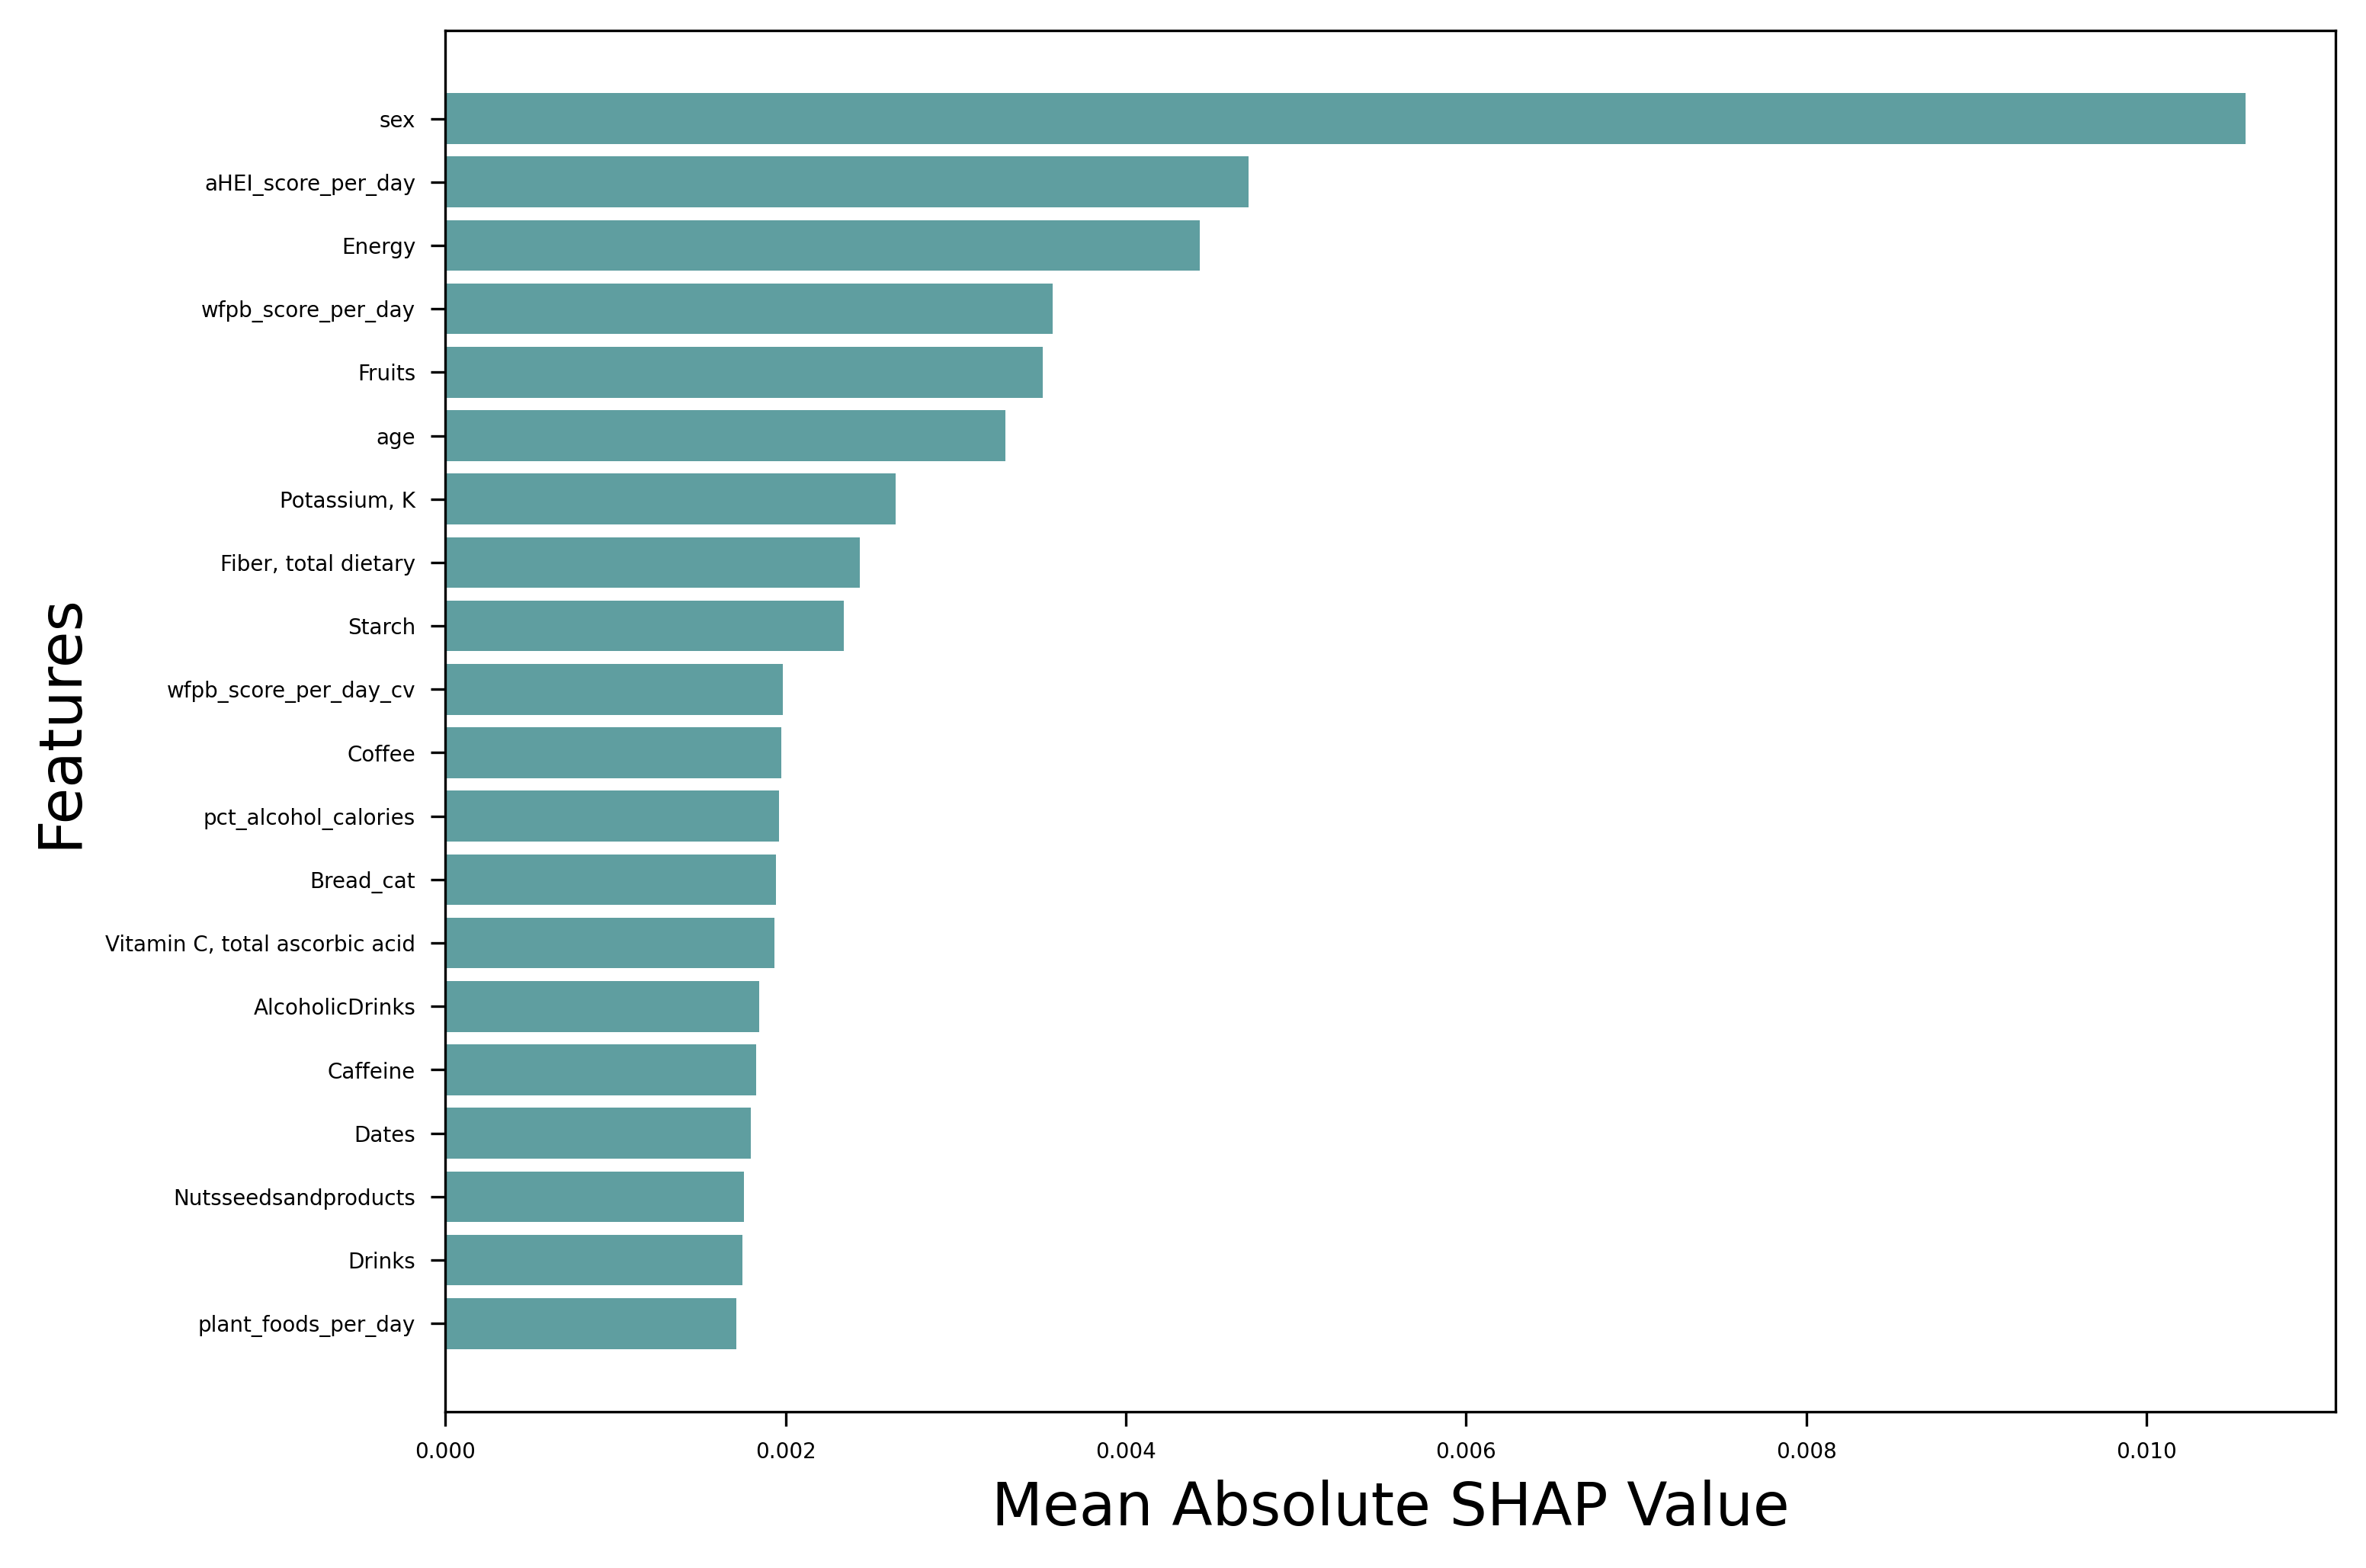

In [20]:

shap_data = process_mean_abs_shap(
    mean_abs_shap_df = mean_abs_shap_lgbm_abundance, 
    all_features = all_features, 
    top_n = 20
    )

# shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=False)

In [21]:
def process_mean_signed_shap(mean_abs_shap_df, correlation_matrix, all_features, top_n=20):
    # Compute mean absolute SHAP values and signed mean SHAP values across targets
    mean_abs_shap_df['mean_abs_shap'] = mean_abs_shap_df.mean(axis=1)
    correlation_matrix['mean_corr'] = correlation_matrix.mean(axis=1)

    # Compute directional absolute SHAP
    direction = np.sign(correlation_matrix['mean_corr']).reset_index(drop=True)
    directional_abs_shap = mean_abs_shap_df['mean_abs_shap'] * direction

    # Get top N positive and bottom N negative directional SHAP features
    top_features = directional_abs_shap.sort_values(ascending=False).head(top_n)
    bottom_features = directional_abs_shap.sort_values(ascending=True).head(top_n)

    # Combine them
    combined = pd.concat([top_features, bottom_features])
    feature_names = pd.Series(all_features).loc[combined.index]

    # Build DataFrame for plotting
    shap_data = pd.DataFrame({
        'Feature': feature_names.values,
        'Directional Mean Absolute SHAP Value': combined.values
    })
    shap_data.index = combined.index  # retain indices

    # Sort for plotting
    shap_data = shap_data.sort_values(by='Directional Mean Absolute SHAP Value')

    # Assign colors: blue for positive direction, salmon for negative
    colors = ['cadetblue' if val > 0 else 'salmon' for val in shap_data['Directional Mean Absolute SHAP Value']]

    # Plot
    plt.figure(figsize=(8, 8), dpi=400)
    plt.barh(shap_data['Feature'], shap_data['Directional Mean Absolute SHAP Value'], color=colors, edgecolor='none')
    plt.xlabel('Signed Mean Absolute SHAP Value', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title('Top and Bottom Features by Directional SHAP Value', fontsize=16)
    
    plt.show()

    return shap_data


In [22]:

# Compute full correlation matrix
full_corr = diet_mb[all_features + significant_targets].corr(method='spearman')

# Extract only the correlations between features and significant_targets
correlation_matrix = full_corr.loc[all_features, significant_targets]


In [ ]:
# correlation_matrix.to_pickle(home_path + f"data/{PROBLEM}/{SPECIES}/SHAP_correlation_matrix.pkl")
mean_abs_shap_lgbm_abundance = mean_abs_shap_lgbm_abundance.drop(columns=["mean_abs_shap"])
correlation_matrix.index = mean_abs_shap_lgbm_abundance.index
correlation_matrix.columns = mean_abs_shap_lgbm_abundance.columns
correlation_matrix

0         1         3         4             5         6         7  \
0    0.002136  0.000896 -0.014976  0.013113  1.366113e-03  0.018016 -0.009083   
1   -0.000344 -0.009282 -0.001587  0.012792  3.770868e-07  0.002940  0.006973   
2   -0.005904 -0.020205 -0.009612 -0.001582 -5.098064e-04 -0.004105 -0.013320   
3    0.004088 -0.005465 -0.008904 -0.015643 -7.862057e-03 -0.023018  0.005941   
4    0.004632 -0.010121  0.011173 -0.012444  8.994112e-05 -0.006507 -0.002067   
..        ...       ...       ...       ...           ...       ...       ...   
695 -0.012042  0.002774 -0.003775  0.007943 -4.361382e-04  0.011600  0.001968   
696  0.008380 -0.011731 -0.006986 -0.008417 -1.494821e-02 -0.012810 -0.015415   
697  0.041792  0.051017 -0.074698 -0.043573 -1.847858e-02 -0.041930 -0.053897   
698 -0.011950 -0.001028  0.103043  0.047536  4.756639e-02  0.054247  0.093487   
699 -0.002002  0.002763  0.024450  0.012946 -1.577845e-03  0.011115  0.003557   

            9        10        11  ...       713       715       716  \
0    0.003153  0.030613  0.002253  ...  0.002759 -0.015582 -0.013922   
1    0.001874 -0.011846 -0.002444  ... -0.005649 -0.003729  0.001755   
2   -0.001666  0.006196 -0.024965  ...  0.026087 -0.016587 -0.000033   
3    0.009891  0.001382  0.000993  ...  0.012507 -0.016537 -0.004686   
4   -0.000008  0.026425  0.006539  ... -0.018752 -0.039820 -0.011474   
..        ...       ...       ...  ...       ...       ...       ...   
695  0.006619 -0.006746  0.001777  ...  0.018419  0.007956  0.007189   
696  0.008316  0.007257  0.017864  ...  0.014029  0.010043  0.050035   
697  0.071517 -0.023413  0.020942  ...  0.006380 -0.006543  0.035181   
698 -0.122081 -0.057388  0.013266  ... -0.144132  0.018375 -0.101740   
699  0.029362  0.024962 -0.019262  ... -0.007144 -0.041084 -0.010805   

          717       718       719       720       721       722       723  
0    0.025632 -0.004468 -0.014163 -0.009946  0.002135  0.008054 -0.004109  
1   -0.007270  0.016451 -0.015578 -0.008175 -0.004813  0.001038 -0.008524  
2    0.018584  0.024102  0.003053 -0.011460  0.005475  0.018968  0.020858  
3    0.035663 -0.003685  0.002589 -0.007062 -0.004174  0.009408 -0.001029  
4    0.033318  0.000637  0.000616 -0.019506 -0.018579 -0.001622 -0.009024  
..        ...       ...       ...       ...       ...       ...       ...  
695 -0.038985 -0.005726  0.010554 -0.006363 -0.009718  0.004927 -0.009045  
696 -0.014052  0.015378 -0.009116  0.009488  0.010484 -0.011236  0.033106  
697  0.001495  0.016121  0.024171  0.029176  0.006816 -0.023058 -0.023029  
698  0.024341 -0.024704  0.041368  0.021527 -0.034855 -0.040012  0.028835  
699  0.013070  0.002140 -0.015918 -0.003049 -0.026698 -0.023112 -0.000757  

[700 rows x 664 columns]

In [ ]:
signed_mean_abs_shap = np.sign(correlation_matrix)
signed_mean_abs_shap.index = mean_abs_shap_lgbm_abundance.index
signed_mean_abs_shap.columns = mean_abs_shap_lgbm_abundance.columns
signed_mean_abs_shap = mean_abs_shap_lgbm_abundance * signed_mean_abs_shap
signed_mean_abs_shap

0         1         3         4         5         6         7  \
0    0.000007  0.000007 -0.000031  0.000131  0.000016  0.000337 -0.000000   
1   -0.000071 -0.000016 -0.000054  0.000046  0.000024  0.000000  0.000018   
2   -0.000360 -0.000000 -0.000031 -0.000161 -0.000752 -0.000014 -0.000038   
3    0.000158 -0.000000 -0.000000 -0.000000 -0.000021 -0.000000  0.000005   
4    0.000020 -0.000000  0.000000 -0.000004  0.000107 -0.000014 -0.000028   
..        ...       ...       ...       ...       ...       ...       ...   
695 -0.000402  0.000178 -0.000174  0.000469 -0.000113  0.001995  0.000250   
696  0.000421 -0.001009 -0.000665 -0.000460 -0.000843 -0.001028 -0.001824   
697  0.003380  0.010083 -0.017522 -0.003861 -0.000958 -0.006327 -0.006545   
698 -0.000208 -0.000063  0.029013  0.003368  0.006677  0.003824  0.024507   
699 -0.000296  0.000722  0.000740  0.000284 -0.000291  0.000524  0.000682   

            9        10        11  ...       713       715       716  \
0    0.000007  0.001650  0.000051  ...  0.000007 -0.000016 -0.000000   
1    0.000097 -0.000000 -0.000003  ... -0.000020 -0.000007  0.000106   
2   -0.000107  0.000467 -0.000147  ...  0.000483 -0.000845 -0.000285   
3    0.000022  0.000000  0.000016  ...  0.000000 -0.000000 -0.000010   
4   -0.000055  0.000794  0.000000  ... -0.000093 -0.000026 -0.000032   
..        ...       ...       ...  ...       ...       ...       ...   
695  0.000965 -0.000170  0.000104  ...  0.001293  0.000436  0.000258   
696  0.001686  0.001293  0.000652  ...  0.002112  0.000195  0.003634   
697  0.013022 -0.000856  0.001152  ...  0.000559 -0.001344  0.007692   
698 -0.044985 -0.011485  0.000027  ... -0.054918  0.000569 -0.045005   
699  0.001822  0.000529 -0.000481  ... -0.003326 -0.001179 -0.002807   

          717       718       719       720       721       722       723  
0    0.000039 -0.000000 -0.000000 -0.000000  0.000157  0.000017 -0.000000  
1   -0.000021  0.000223 -0.000000 -0.000000 -0.000000  0.000018 -0.000000  
2    0.000029  0.000481  0.000153 -0.000013  0.001172  0.000389  0.000322  
3    0.000585 -0.000026  0.000101 -0.000000 -0.000000  0.000032 -0.000000  
4    0.000110  0.000030  0.000137 -0.000000 -0.000094 -0.000013 -0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
695 -0.000148 -0.000074  0.000150 -0.000247 -0.000081  0.000150 -0.000068  
696 -0.002033  0.005783 -0.000336  0.000594  0.000722 -0.000173  0.001049  
697  0.002013  0.000813  0.000584  0.000918  0.000388 -0.000917 -0.000210  
698  0.000138 -0.000074  0.000843  0.000039 -0.005119 -0.003938  0.000108  
699  0.001042  0.000177 -0.000233 -0.000837 -0.000175 -0.001321 -0.000216  

[700 rows x 664 columns]

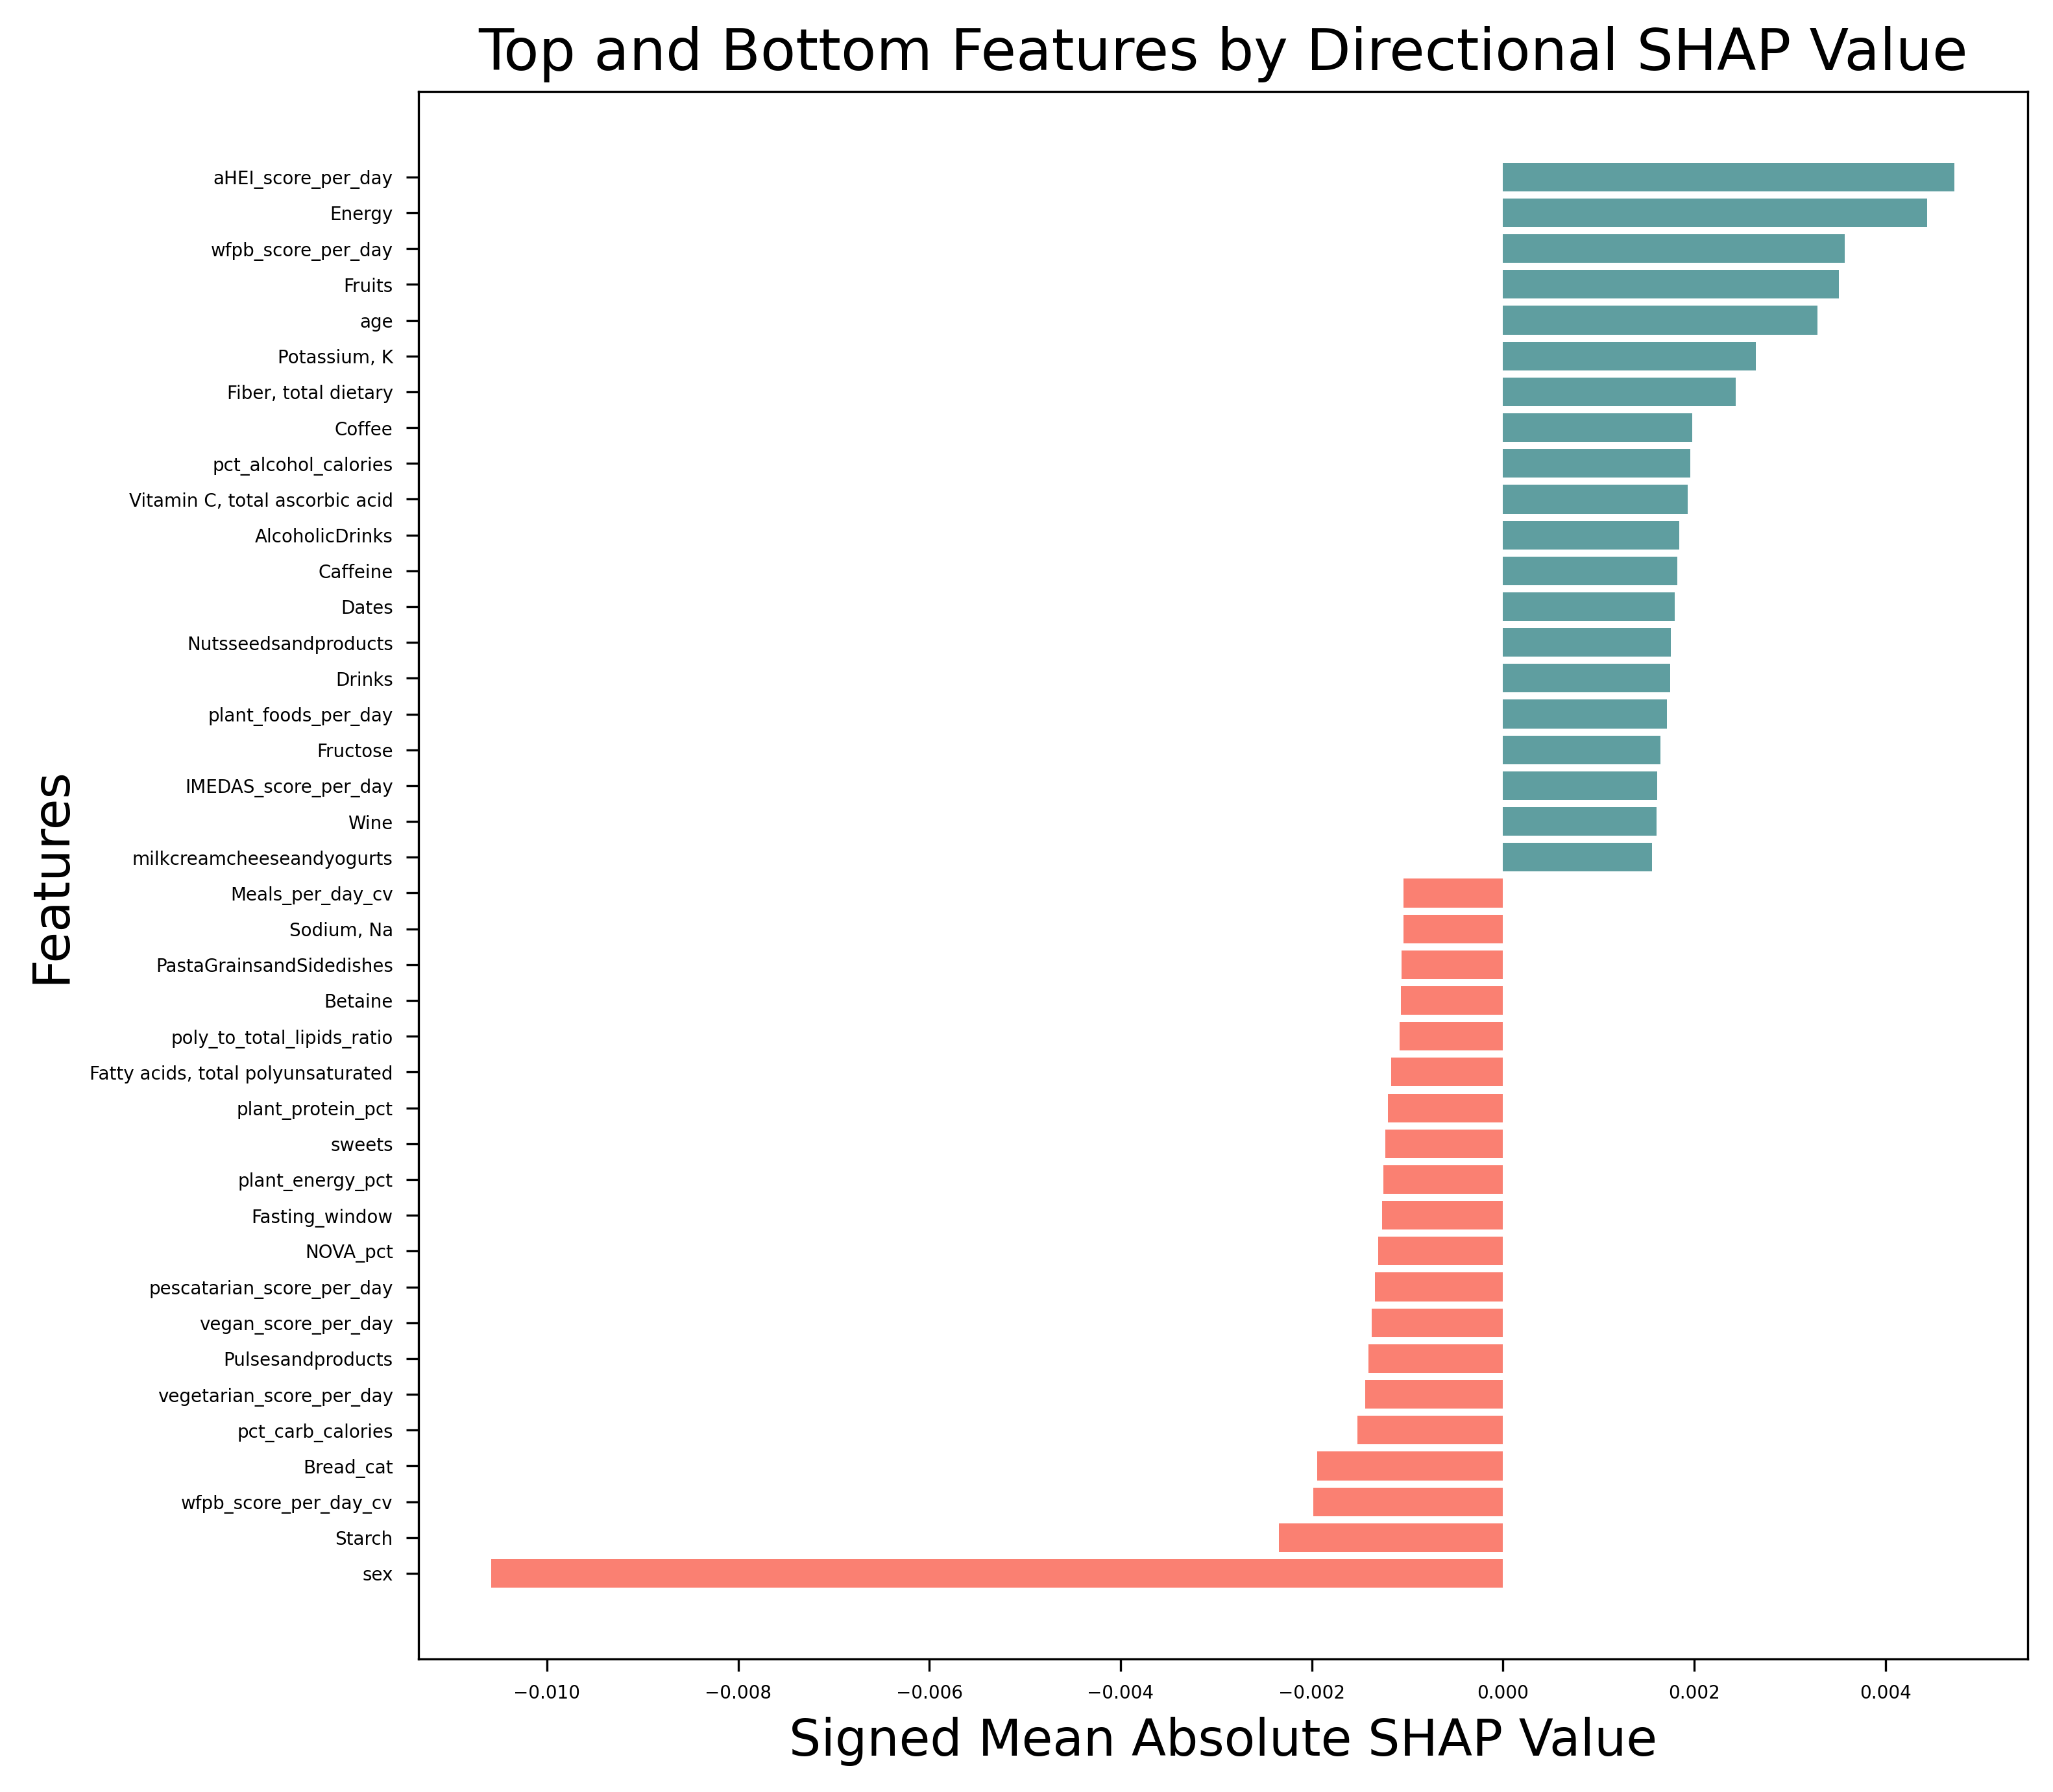

Feature  Directional Mean Absolute SHAP Value
698                                 sex                             -0.010581
613                              Starch                             -0.002342
656               wfpb_score_per_day_cv                             -0.001986
667                           Bread_cat                             -0.001942
636                   pct_carb_calories                             -0.001522
626            vegetarian_score_per_day                             -0.001440
687                   Pulsesandproducts                             -0.001407
628                 vegan_score_per_day                             -0.001372
629           pescatarian_score_per_day                             -0.001336
631                            NOVA_pct                             -0.001304
620                      Fasting_window                             -0.001265
623                    plant_energy_pct                             -0.001254
696                              sweets                             -0.001231
624                   plant_protein_pct                             -0.001207
590  Fatty acids, total polyunsaturated                             -0.001171
642          poly_to_total_lipids_ratio                             -0.001085
605                             Betaine                             -0.001068
683            PastaGrainsandSidedishes                             -0.001059
578                          Sodium, Na                             -0.001044
653                    Meals_per_day_cv                             -0.001042
694           milkcreamcheeseandyogurts                              0.001561
556                                Wine                              0.001603
632                IMEDAS_score_per_day                              0.001609
599                            Fructose                              0.001647
621                 plant_foods_per_day                              0.001712
672                              Drinks                              0.001746
680                Nutsseedsandproducts                              0.001754
169                               Dates                              0.001794
606                            Caffeine                              0.001826
665                     AlcoholicDrinks                              0.001845
581      Vitamin C, total ascorbic acid                              0.001935
638                pct_alcohol_calories                              0.001962
130                              Coffee                              0.001976
572                Fiber, total dietary                              0.002436
577                        Potassium, K                              0.002646
697                                 age                              0.003292
676                              Fruits                              0.003510
627                  wfpb_score_per_day                              0.003572
570                              Energy                              0.004436
634                  aHEI_score_per_day                              0.004720

In [ ]:
process_mean_signed_shap(mean_abs_shap_lgbm_abundance, correlation_matrix, all_features, top_n=20)

In [ ]:
# mean_abs_shap_lgbm_abundance.drop(["max", "max_microbe", "mean_abs_shap"], axis=1, inplace=True)
# mean_abs_shap_lgbm_abundance

In [ ]:
def analyze_genus(genus, title=None, directional=False):
    if title is None:
        title = genus

    # genus_names = mb_names['species_new'][mb_names['species_new'].str.contains(genus)].index
    # if genus_names.empty:
    #     print("Genus not found.")
    #     return

    # genus_indices = map_df[map_df["targets"].isin(genus_names)].index
            # genus_names = map_df[map_df["Microbe_Name"].isin(genus_names)]["targets"]
    genus_indices = map_df[map_df["Microbe_Name"].str.contains(genus)].index
    for genus_index in genus_indices:
        print(map_df.loc[int(genus_index)]["Microbe_Name"])

    # Pearson's correlations
    bifido_corr = lgbm_diet_scores.loc[genus_indices]
    print(bifido_corr)

    genus_indices = [str(x) for x in genus_indices]

    # Subset mean absolute and signed SHAP
    mean_abs_shap_genus = mean_abs_shap_lgbm_abundance.loc[:, genus_indices]
    corr_matrix_genus = correlation_matrix.loc[:, genus_indices]

    mean_abs_shap_genus['mean_abs_shap'] = mean_abs_shap_genus.mean(axis=1)

    if directional:
        corr_matrix_genus['mean_corr'] = corr_matrix_genus.mean(axis=1)
        direction = np.sign(corr_matrix_genus['mean_corr']).reset_index(drop=True)
        directional_abs_shap = mean_abs_shap_genus['mean_abs_shap'] * direction

        # Get top and bottom
        top_n = 10
        top_features = directional_abs_shap.sort_values(ascending=False).head(top_n)
        bottom_features = directional_abs_shap.sort_values(ascending=True).head(top_n)

        combined = pd.concat([top_features, bottom_features])
        feature_names = pd.Series(all_features).loc[combined.index]

        shap_data = pd.DataFrame({
            'Feature': feature_names.values,
            'Directional SHAP Value': combined.values
        }, index=combined.index)

        shap_data = shap_data.sort_values(by='Directional SHAP Value')
        colors = ['cadetblue' if val > 0 else 'salmon' for val in shap_data['Directional SHAP Value']]

        # Plot
        plt.figure(figsize=(8, 8))
        plt.barh(shap_data['Feature'], shap_data['Directional SHAP Value'], color=colors, edgecolor='none')
        plt.xlabel('Signed Mean SHAP Value', fontsize=14)
        plt.ylabel('Features', fontsize=14)
        plt.title(f"Directional SHAP for {title}", fontsize=14)
        
        plt.show()

    else:
        # Original behavior
        top_shap_genus = mean_abs_shap_genus['mean_abs_shap'].sort_values(ascending=False).head(10).index
        top_fnames_shap_genus = pd.Series(all_features).loc[top_shap_genus]

        shap_data = pd.concat([
            top_fnames_shap_genus,
            mean_abs_shap_genus['mean_abs_shap'].loc[top_shap_genus]
        ], axis=1)
        shap_data.columns = ['Feature', 'Mean Absolute SHAP Value']
        shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)

        # Plot
        plt.figure(figsize=(8, 6))
        plt.barh(shap_data['Feature'], shap_data['Mean Absolute SHAP Value'], color='cadetblue', edgecolor='none')
        plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
        plt.ylabel('Features', fontsize=14)
        plt.title(f"Top Features for {title}", fontsize=14)
        
        plt.show()


In [ ]:
def analyze_genus_ranks(genus, title=None):
    if title is None:
        title = genus

    # genus_names = mb_names[mb_names['species_new'].str.contains(genus, regex=True)].index
    # if genus_names.empty:
    #     print("Genus not found.")
    #     return
    
    # genus_names = [name for name in genus_names if name in significant_targets]
    # genus_indices = map_df[map_df["targets"].isin(genus_names)].index
    genus_indices = map_df[map_df["Microbe_Name"].str.contains(genus)].index
    print(genus_indices)
    for genus_index in genus_indices:
        print(map_df.loc[int(genus_index)]["Microbe_Name"])

    # Pearson's correlations
    bifido_corr = lgbm_diet_scores.loc[genus_indices]
    print(bifido_corr)

    genus_indices = [str(x) for x in genus_indices]
    shap_values_genus = mean_abs_shap_lgbm_abundance.loc[:, list(genus_indices)]

    # Calculate ranks for each target (column)
    ranks = shap_values_genus.rank(ascending=False)
    
    # Calculate mean rank across all targets for each feature
    mean_ranks = ranks.mean(axis=1)
    
    # Get top 10 features by mean rank
    top_features = mean_ranks.sort_values().head(10)
    
    # Get actual feature names
    top_fnames_shap_genus = pd.Series(all_features).loc[top_features.index]
    
    # Sort features by rank (highest to lowest)
    sorted_indices = np.argsort(top_features.values)[::-1]
    sorted_features = top_fnames_shap_genus.iloc[sorted_indices]
    sorted_values = top_features.values[sorted_indices]
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    bars = plt.barh(
        y=np.arange(len(sorted_features)),
        width=sorted_values,
        color='cadetblue',
        edgecolor=None
    )
    
    # Customize the plot
    plt.ylabel('Features')
    plt.xlabel('Mean Rank')
    plt.title(f'Mean SHAP Rank for {title}')
    
    # Add feature names as y-tick labels
    plt.yticks(np.arange(len(sorted_features)), sorted_features)
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}',
                 ha='left', va='center')
    
    # Adjust layout to prevent label cutoff
    
    
    # Save the figure
    # plt.savefig(home_path + f"figures/{PROBLEM}/mean_shap_ranks_{title}.png", 
    #             dpi=400, facecolor="white", transparent=False)
    
    # Show the plot
    plt.show()
    
    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Feature': sorted_features.values,
        'Mean_Rank': sorted_values,
        'Std_Rank': ranks.loc[top_features.index].std(axis=1).values,
        'Min_Rank': ranks.loc[top_features.index].min(axis=1).values,
        'Max_Rank': ranks.loc[top_features.index].max(axis=1).values
    })
    
    return summary_df


In [ ]:
# Template to use for differential species

# # Probiotic species
# probiotics_pattern = (
#     r'Bifidobacterium|'
#     r'Streptococcus thermophilus|Streptococcus salivarius|'
#     r'Akkermansia muciniphila|'
#     r'Faecalibacterium prausnitzii|'
#     r'Lactococcus lactis'
#     # r'Bacteroides'
# )

# # r'Bacteroides fragilis|Bacteroides vulgatus|': Two pathogenic bacteroides to remove if I include Bacteroides genus as probiotics.

# analyze_genus(probiotics_pattern, title="Probiotic Species", directional=True)

### Diet Groups Comparisons

In [ ]:
# diet_scores = [
#     'vegetarian_score_per_day', 'wfpb_score_per_day', 'vegan_score_per_day', 
#     'pescatarian_score_per_day', 'carnivore_score_per_day', 'NOVA_pct',
#     'IMEDAS_score_per_day', 'eatLANCET_score_per_day', 'aHEI_score_per_day', 'hPDI_score_per_day', 
#     'DASH_score', 'keto', 'low_carb_diet'
# ]
# diet_score_col = 'aHEI_score_per_day'

# for diet_score_col in diet_scores:

#     threshold_high = diet_mb[diet_score_col].quantile(0.9)
#     threshold_low = diet_mb[diet_score_col].quantile(0.1)

#     most_adherent = diet_mb[diet_mb[diet_score_col] >= threshold_high]
#     least_adherent = diet_mb[diet_mb[diet_score_col] <= threshold_low]

#     # Plot with colored regions instead of vertical lines
#     plt.figure(figsize=(6, 4))

#     # Histogram
#     counts, bins, patches = plt.hist(diet_mb[diet_score_col], bins=30, edgecolor='None')

#     # Color patches based on quantile thresholds
#     for patch, left in zip(patches, bins[:-1]):
#         right = left + (bins[1] - bins[0])
#         if right <= threshold_low:
#             patch.set_facecolor('red')  # Least adherent
#         elif left >= threshold_high:
#             patch.set_facecolor('green')  # Most adherent
#         else:
#             patch.set_facecolor('grey')  # Middle

#     # Labels and title
#     plt.title(f'Distribution of {diet_score_col}')
#     plt.xlabel(diet_score_col)
#     plt.ylabel('Frequency')
#     
#     plt.show()



In [ ]:
diet_rename_dict = {
    'vegetarian_score_per_day': "Vegetarian",
    'wfpb_score_per_day': "Whole-food, plant-based",  # Whole-food, plant-based
    'vegan_score_per_day': "Vegan",
    'pescatarian_score_per_day': "Pescatarian",
    'carnivore_score_per_day': "Animal-based",
    'NOVA_pct': "UPF, %",
    'IMEDAS_score_per_day': "I-MEDAS",
    'eatLANCET_score_per_day': "EAT-Lancet",
    'aHEI_score_per_day': "AHEI",
    'hPDI_score_per_day': "hPDI",
    'DASH_score': "DASH",
    'keto': "Extremely low carbs",
    'low_carb_diet': "Low carbs"
}


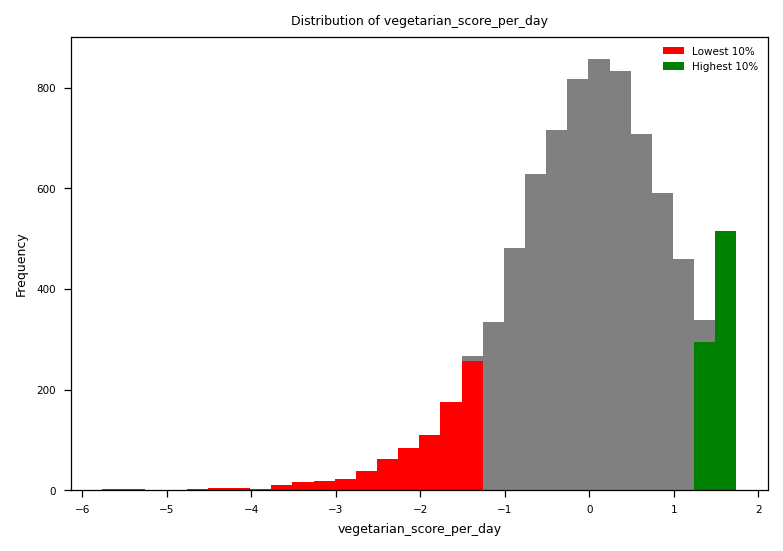

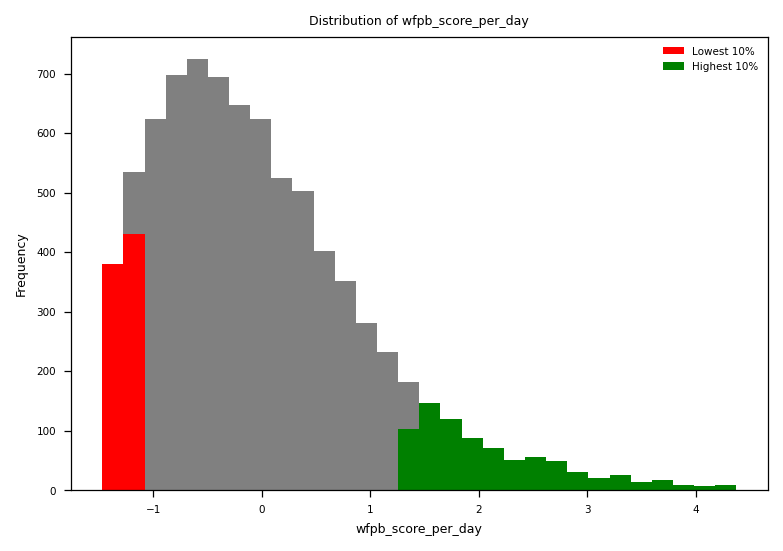

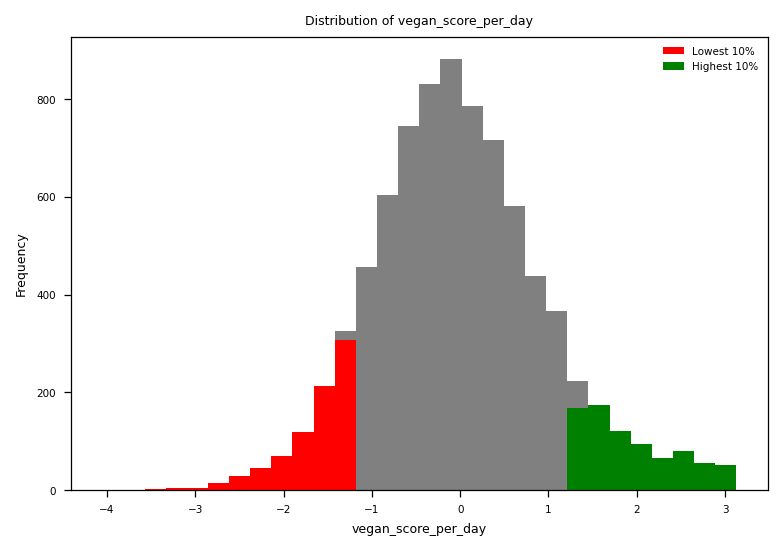

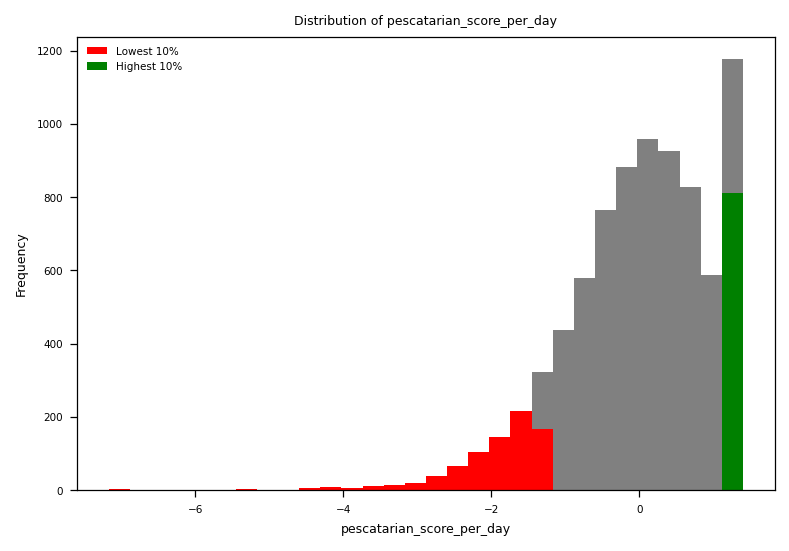

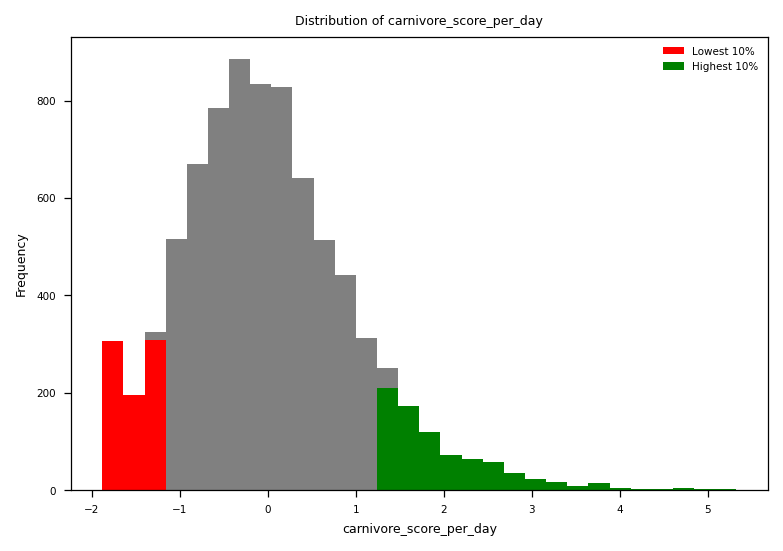

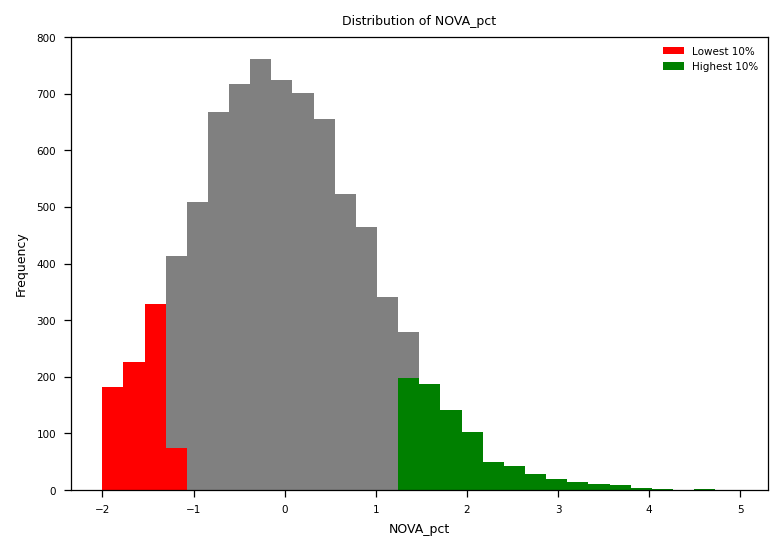

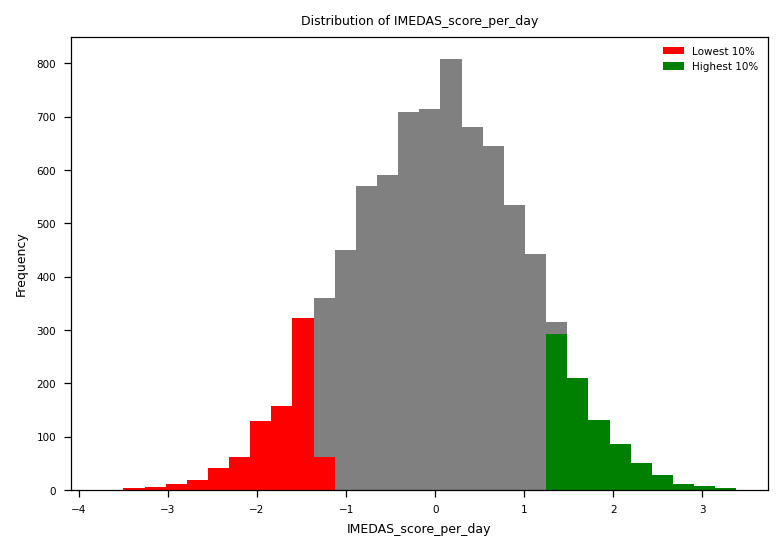

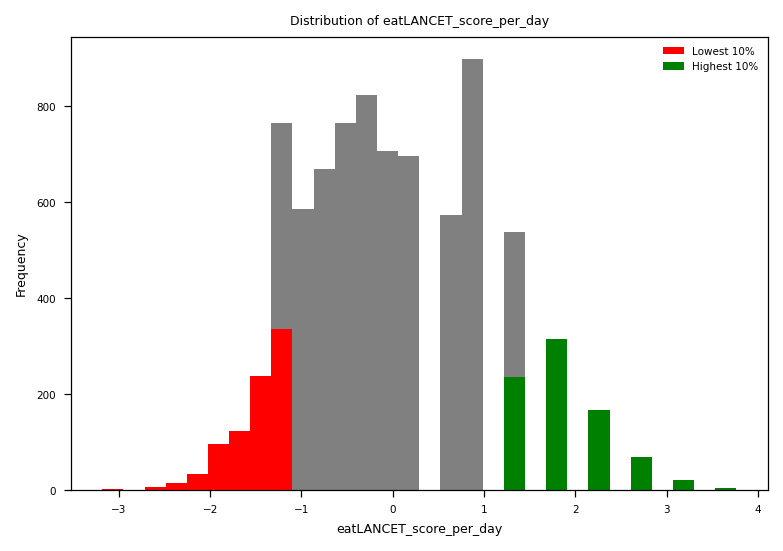

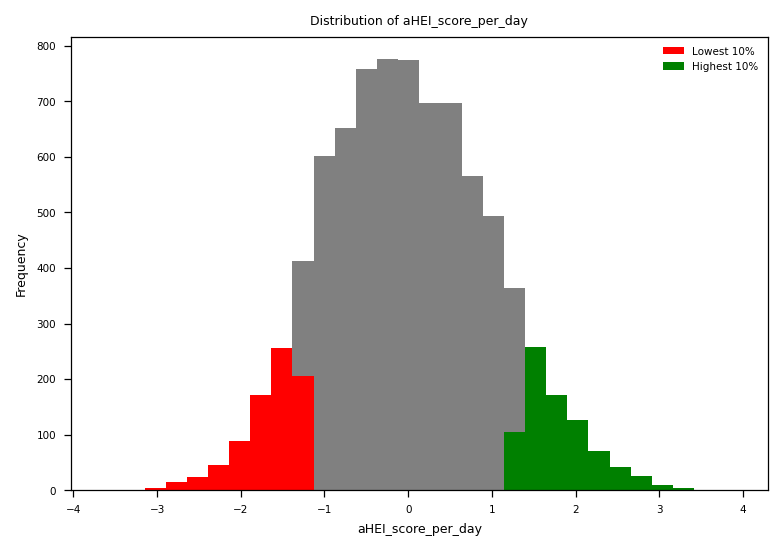

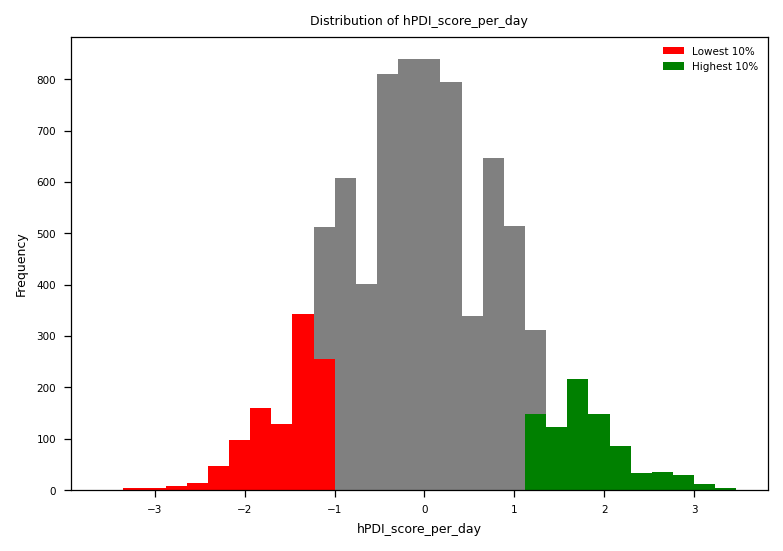

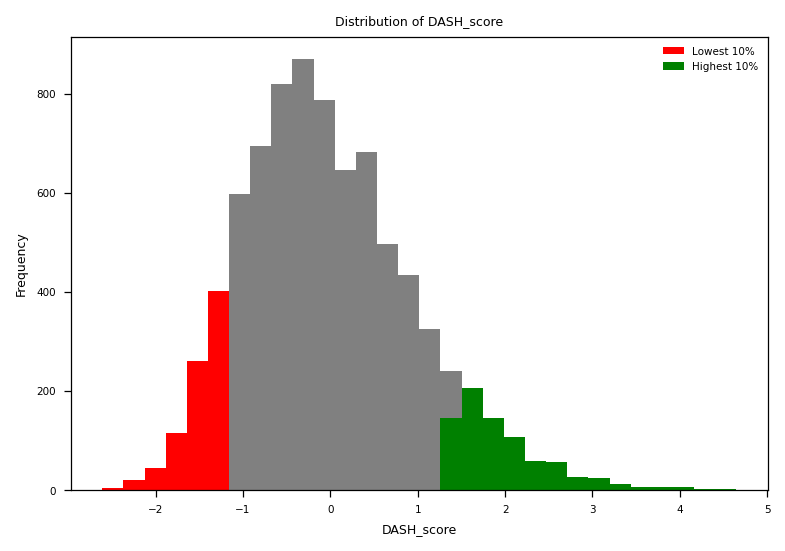

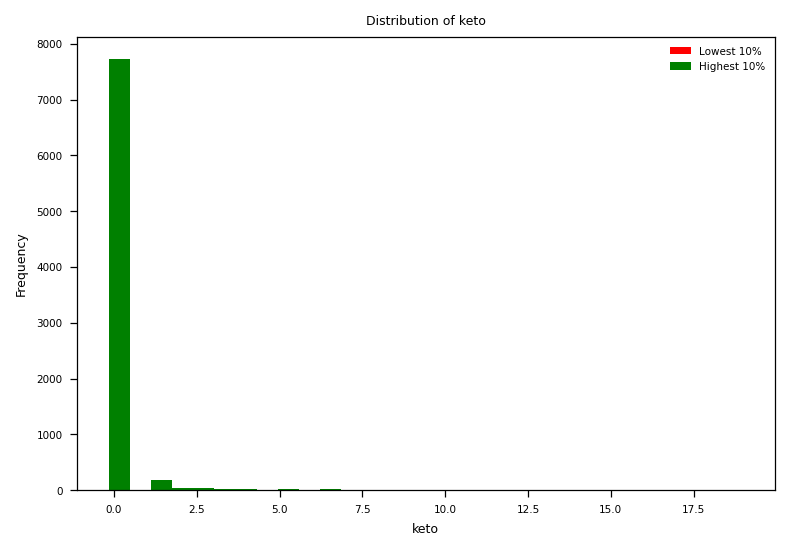

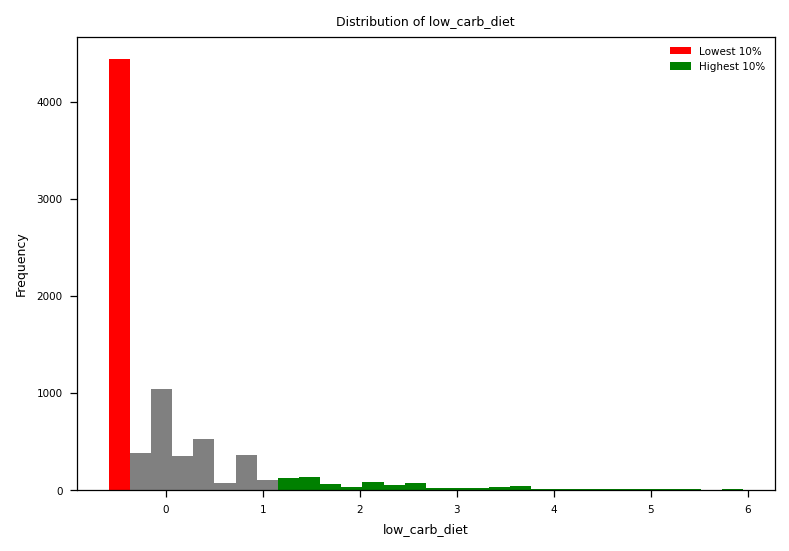

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

diet_scores = [
    'vegetarian_score_per_day', 'wfpb_score_per_day', 'vegan_score_per_day',
    'pescatarian_score_per_day', 'carnivore_score_per_day', 'NOVA_pct',
    'IMEDAS_score_per_day', 'eatLANCET_score_per_day', 'aHEI_score_per_day',
    'hPDI_score_per_day', 'DASH_score', 'keto', 'low_carb_diet'
]

for diet_score_col in diet_scores:
    # Compute 10th and 90th percentiles
    threshold_low  = diet_mb_train[diet_score_col].quantile(0.1)
    threshold_high = diet_mb_train[diet_score_col].quantile(0.9)

    # Define bins
    hist_all, bin_edges = np.histogram(diet_mb_train[diet_score_col], bins=30)
    bin_width   = np.diff(bin_edges)
    bin_centers = bin_edges[:-1] + bin_width / 2

    # Plot grey histogram for all values
    plt.figure(figsize=(6, 4))
    plt.hist(
        diet_mb_train[diet_score_col],
        bins=bin_edges,
        color='grey',
        edgecolor='none'
    )

    # Now compute “low” and “high” histograms using the same bin edges
    low_mask   = diet_mb_train[diet_score_col] <= threshold_low
    high_mask  = diet_mb_train[diet_score_col] >= threshold_high

    counts_low,  _ = np.histogram(diet_mb_train.loc[low_mask,  diet_score_col], bins=bin_edges)
    counts_high, _ = np.histogram(diet_mb_train.loc[high_mask, diet_score_col], bins=bin_edges)

    # Overlay red bars for the lowest‐decile bins
    plt.bar(
        bin_centers,
        counts_low,
        width=bin_width,
        color='red',
        edgecolor='none',
        alpha=1,
        label='Lowest 10%'
    )

    # Overlay green bars for the highest‐decile bins
    plt.bar(
        bin_centers,
        counts_high,
        width=bin_width,
        color='green',
        edgecolor='none',
        alpha=1,
        label='Highest 10%'
    )

    # Labels and title
    plt.title(f'Distribution of {diet_score_col}')
    plt.xlabel(diet_score_col)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.show()


Diversity Comparisons

In [ ]:
# remove 'keto' and 'low_carb_diet'
diet_scores_no_keto = [d for d in diet_scores if d not in ('keto', 'low_carb_diet')]


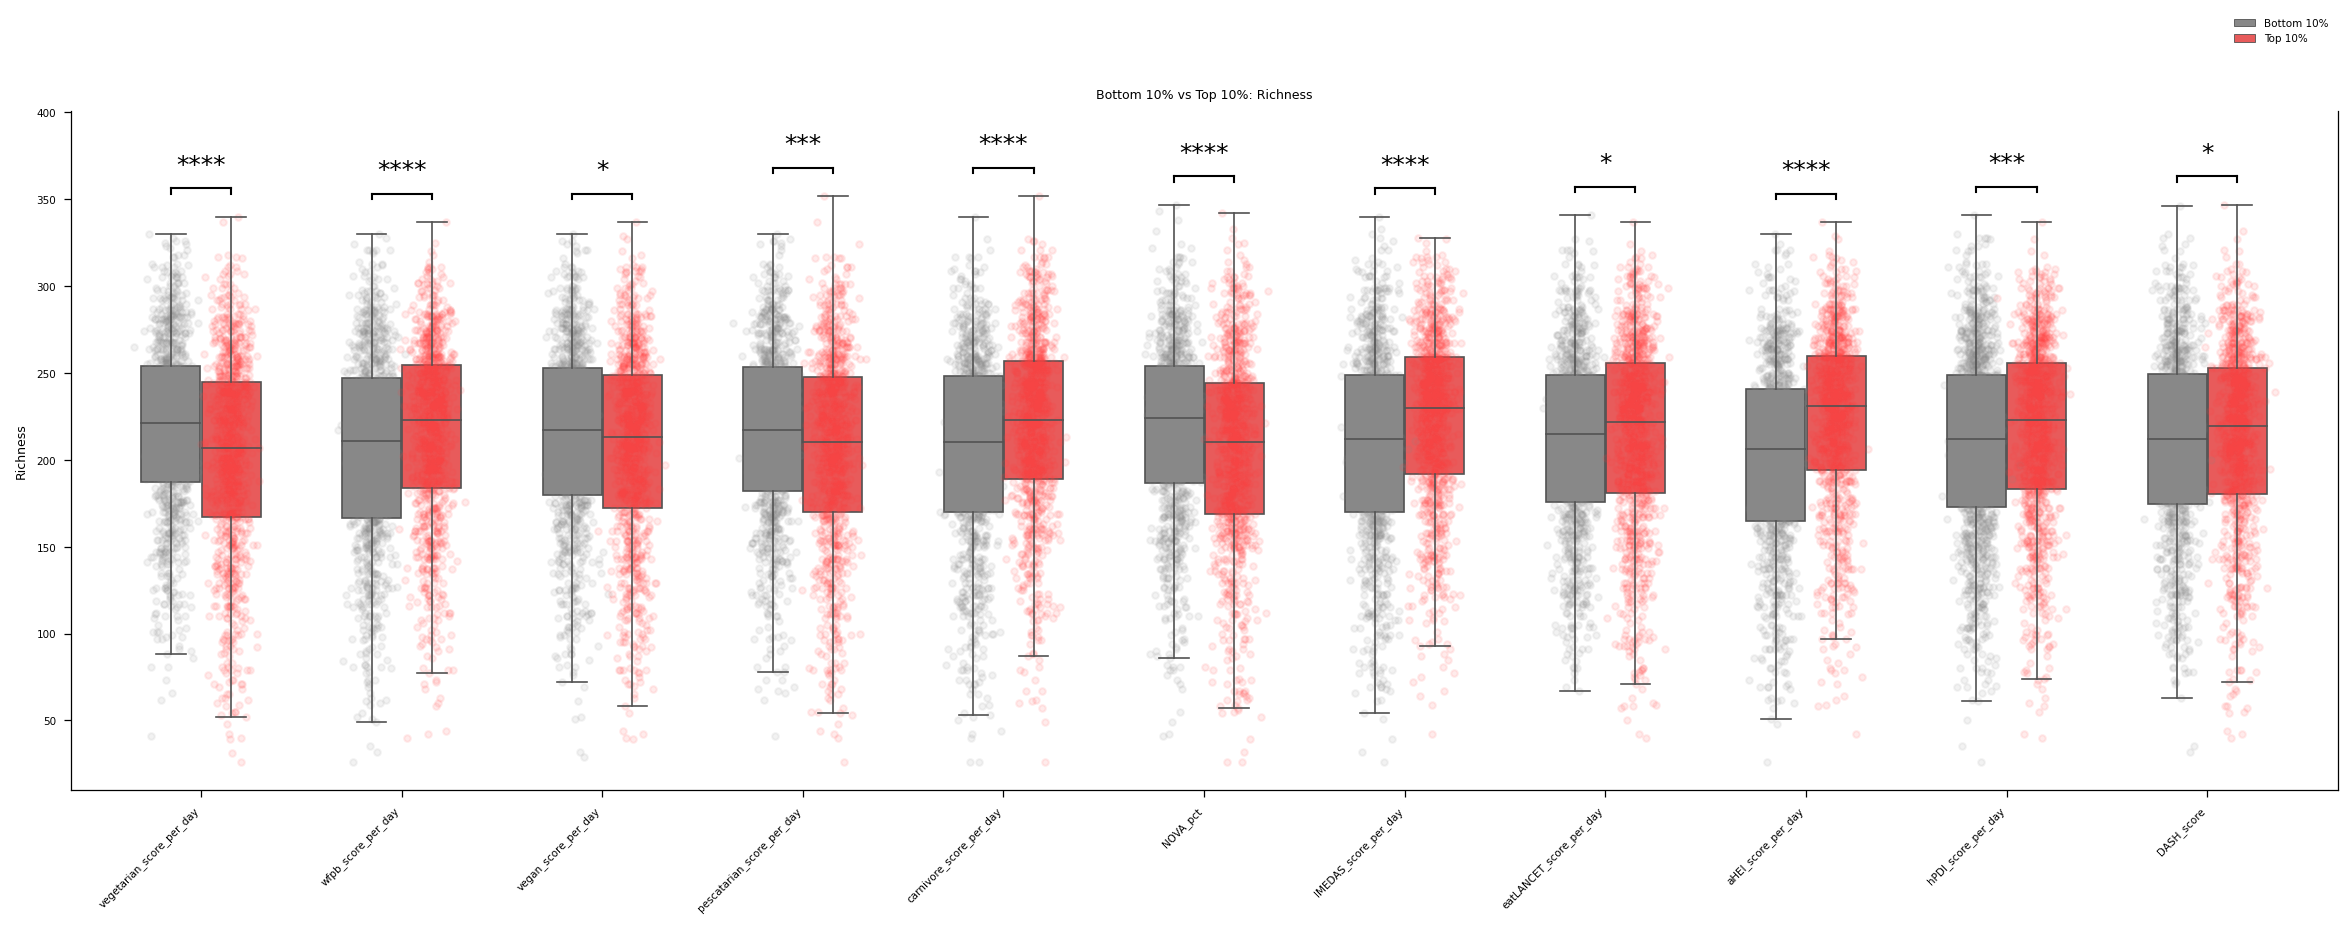

In [ ]:
def target_comparison(
    target,
    diet_scores,
    data,
    alpha=0.05,
    figsize_per_diet=(1.5, 0.8),
    star_levels=None
):
    """
    For each diet in `diet_scores`, split participants into bottom 10% vs top 10%
    based on that diet score, then plot boxplot pairs of `target` with significance
    brackets using FDR‐adjusted p‐values and multiple star levels.

    Parameters
    ----------
    target : str
        Column name in `data` to compare (e.g. "Richness").
    diet_scores : list of str
        List of column names in `data` that represent different diet-score metrics.
    data : pd.DataFrame
        DataFrame containing both the diet_scores columns and the target column.
    alpha : float
        Nominal FDR level to control (default 0.05).
    figsize_per_diet : tuple(float, float)
        (width, height) per diet to scale the overall figure.  Default (1.5, 0.8).
    star_levels : list of tuple(float, str)
        List of (p_thresh, stars) from largest to smallest p‐threshold.  By default:
            [(0.0001, '****'),
             (0.001,  '***'),
             (0.01,   '**'),
             (0.05,   '*')]
    """
    # Default star levels if none provided:
    if star_levels is None:
        star_levels = [
            (0.0001, '****'),
            (0.001,  '***'),
            (0.01,   '**'),
            (0.05,   '*')
        ]

    # Step 1: For each diet, compute bottom/top 10% and raw p-value; store for FDR
    tests = []
    for diet_col in diet_scores_no_keto:
        p_low  = data[diet_col].quantile(0.10)
        p_high = data[diet_col].quantile(0.90)

        low_mask  = data[diet_col] <= p_low
        high_mask = data[diet_col] >= p_high

        bottom_vals = data.loc[low_mask, target].dropna()
        top_vals    = data.loc[high_mask, target].dropna()

        # If either group is empty, set pval = 1.0
        if len(bottom_vals) < 1 or len(top_vals) < 1:
            pval = 1.0
        else:
            try:
                _, pval = mannwhitneyu(bottom_vals, top_vals, alternative='two-sided')
            except:
                pval = 1.0

        tests.append({
            'diet': diet_col,
            'bottom_vals': bottom_vals,
            'top_vals': top_vals,
            'p_raw': pval
        })

    # Step 2: FDR adjustment (Benjamini–Hochberg) across all diets
    raw_pvals = [t['p_raw'] for t in tests]
    reject, p_adj, _, _ = multipletests(raw_pvals, alpha=alpha, method='fdr_bh')
    for i, t in enumerate(tests):
        t['p_adj']     = p_adj[i]
        t['reject_fdr'] = reject[i]

    # Step 3: Build the “extreme” DataFrame for boxplots
    records = []
    for t in tests:
        diet_col = t['diet']
        bottom_vals = t['bottom_vals']
        top_vals    = t['top_vals']

        for val in bottom_vals:
            records.append({
                'diet': diet_col,
                'group': 'Bottom 10%',
                'value': val
            })
        for val in top_vals:
            records.append({
                'diet': diet_col,
                'group': 'Top 10%',
                'value': val
            })

    extreme_df = pd.DataFrame.from_records(records)

    # Step 4: Plotting
    total_width  = figsize_per_diet[0] * len(diet_scores)
    total_height = 6
    plt.figure(figsize=(total_width, total_height))
    ax = sns.boxplot(
        data=extreme_df,
        x='diet',
        y='value',
        hue='group',
        palette=['#888888', '#FF4444'],  # gray for Bottom, red for Top
        width=0.6,
        dodge=True,
        showfliers=False
    )
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(target)
    plt.xlabel('')
    plt.title(f'Bottom 10% vs Top 10%: {target}')
    plt.legend(title='', loc='upper right', bbox_to_anchor=(1, 1.15))

    # Remove top border so stars aren’t clipped
    ax.spines['top'].set_visible(False)

    # Compute vertical scaling so we can place brackets safely
    overall_min = extreme_df['value'].min()
    overall_max = extreme_df['value'].max()
    y_range = overall_max - overall_min

    # Expand y‐limits by 15% so text/brackets aren’t on the edge
    ax.set_ylim(overall_min - 0.05 * y_range, overall_max + 0.15 * y_range)

    # Determine x‐positions for bottom vs top boxes for each diet
    n = len(diet_scores)
    x_positions = np.arange(n)
    # Seaborn dodge offset estimation (half the box_width=0.6 ≈ 0.3,
    # then split between the two hue categories ≈ 0.15 each)
    dodge = 0.6 * 0.5  # 0.3
    offset = dodge * 0.5  # ≈ 0.15

    # Overlay scatter of individual points in matching colors:
    for i, t in enumerate(tests):
        bottom_vals = t['bottom_vals']
        top_vals    = t['top_vals']

        # x‐coordinates for bottom vs. top boxes
        x_low  = i - offset
        x_high = i + offset

        # Add a small horizontal jitter so points don’t all overlap
        jitter_scale = 0.05
        xs_low  = np.random.normal(loc=x_low, scale=jitter_scale, size=len(bottom_vals))
        xs_high = np.random.normal(loc=x_high, scale=jitter_scale, size=len(top_vals))

        # Scatter in same colors as the boxes
        ax.scatter(xs_low,  bottom_vals, color='#888888', alpha=0.1, s=10)
        ax.scatter(xs_high, top_vals,    color='#FF4444', alpha=0.1, s=10)

    # Step 5: Draw brackets & annotate with stars based on adjusted p‐values
    for i, t in enumerate(tests):
        p_adj_i = t['p_adj']
        bottom_vals = t['bottom_vals']
        top_vals    = t['top_vals']

        # Determine number of stars or “NS”
        star = 'NS'
        for thresh, s in star_levels:
            if p_adj_i < thresh:
                star = s
                break

        # x‐coordinates
        x_low  = i - offset
        x_high = i + offset

        # y‐coordinate for bracket: just above the taller of the two boxes
        y_bot_max = bottom_vals.max() if len(bottom_vals) else overall_min
        y_top_max = top_vals.max()    if len(top_vals)    else overall_min
        y_line = max(y_bot_max, y_top_max) + 0.05 * y_range
        y_text = y_line + 0.02 * y_range

        # Draw horizontal line
        ax.plot([x_low, x_high], [y_line, y_line], color='black', linewidth=1.0)
        # Draw vertical ticks
        ax.plot([x_low, x_low], [y_line, y_line - 0.01 * y_range], color='black', linewidth=1.0)
        ax.plot([x_high, x_high], [y_line, y_line - 0.01 * y_range], color='black', linewidth=1.0)
        # Place star/NS text
        ax.text((x_low + x_high) / 2, y_text, star,
                ha='center', va='bottom', color='black', fontsize=12)

    
    plt.show()


# Example usage:
target_comparison('Richness', diet_scores, diet_mb)


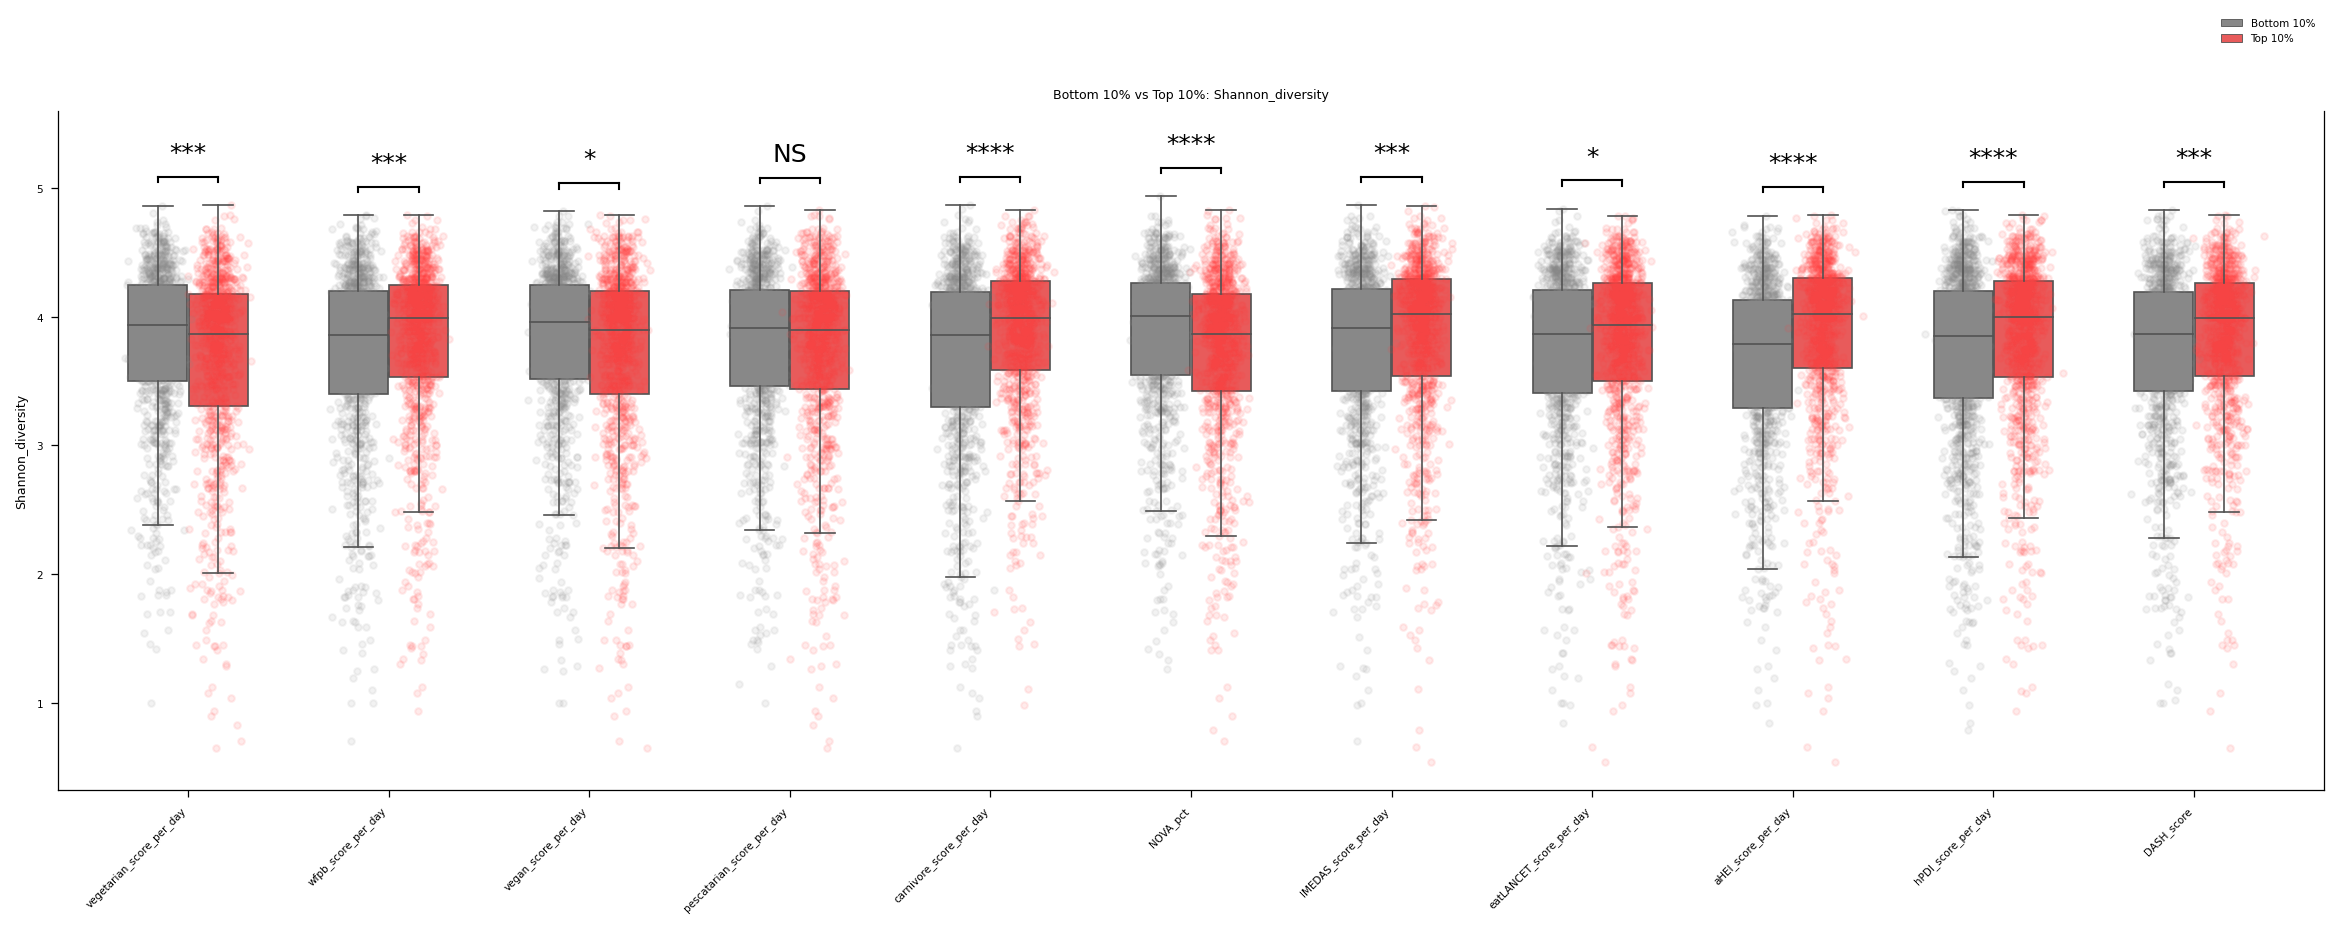

In [ ]:
target_comparison('Shannon_diversity', diet_scores, diet_mb)

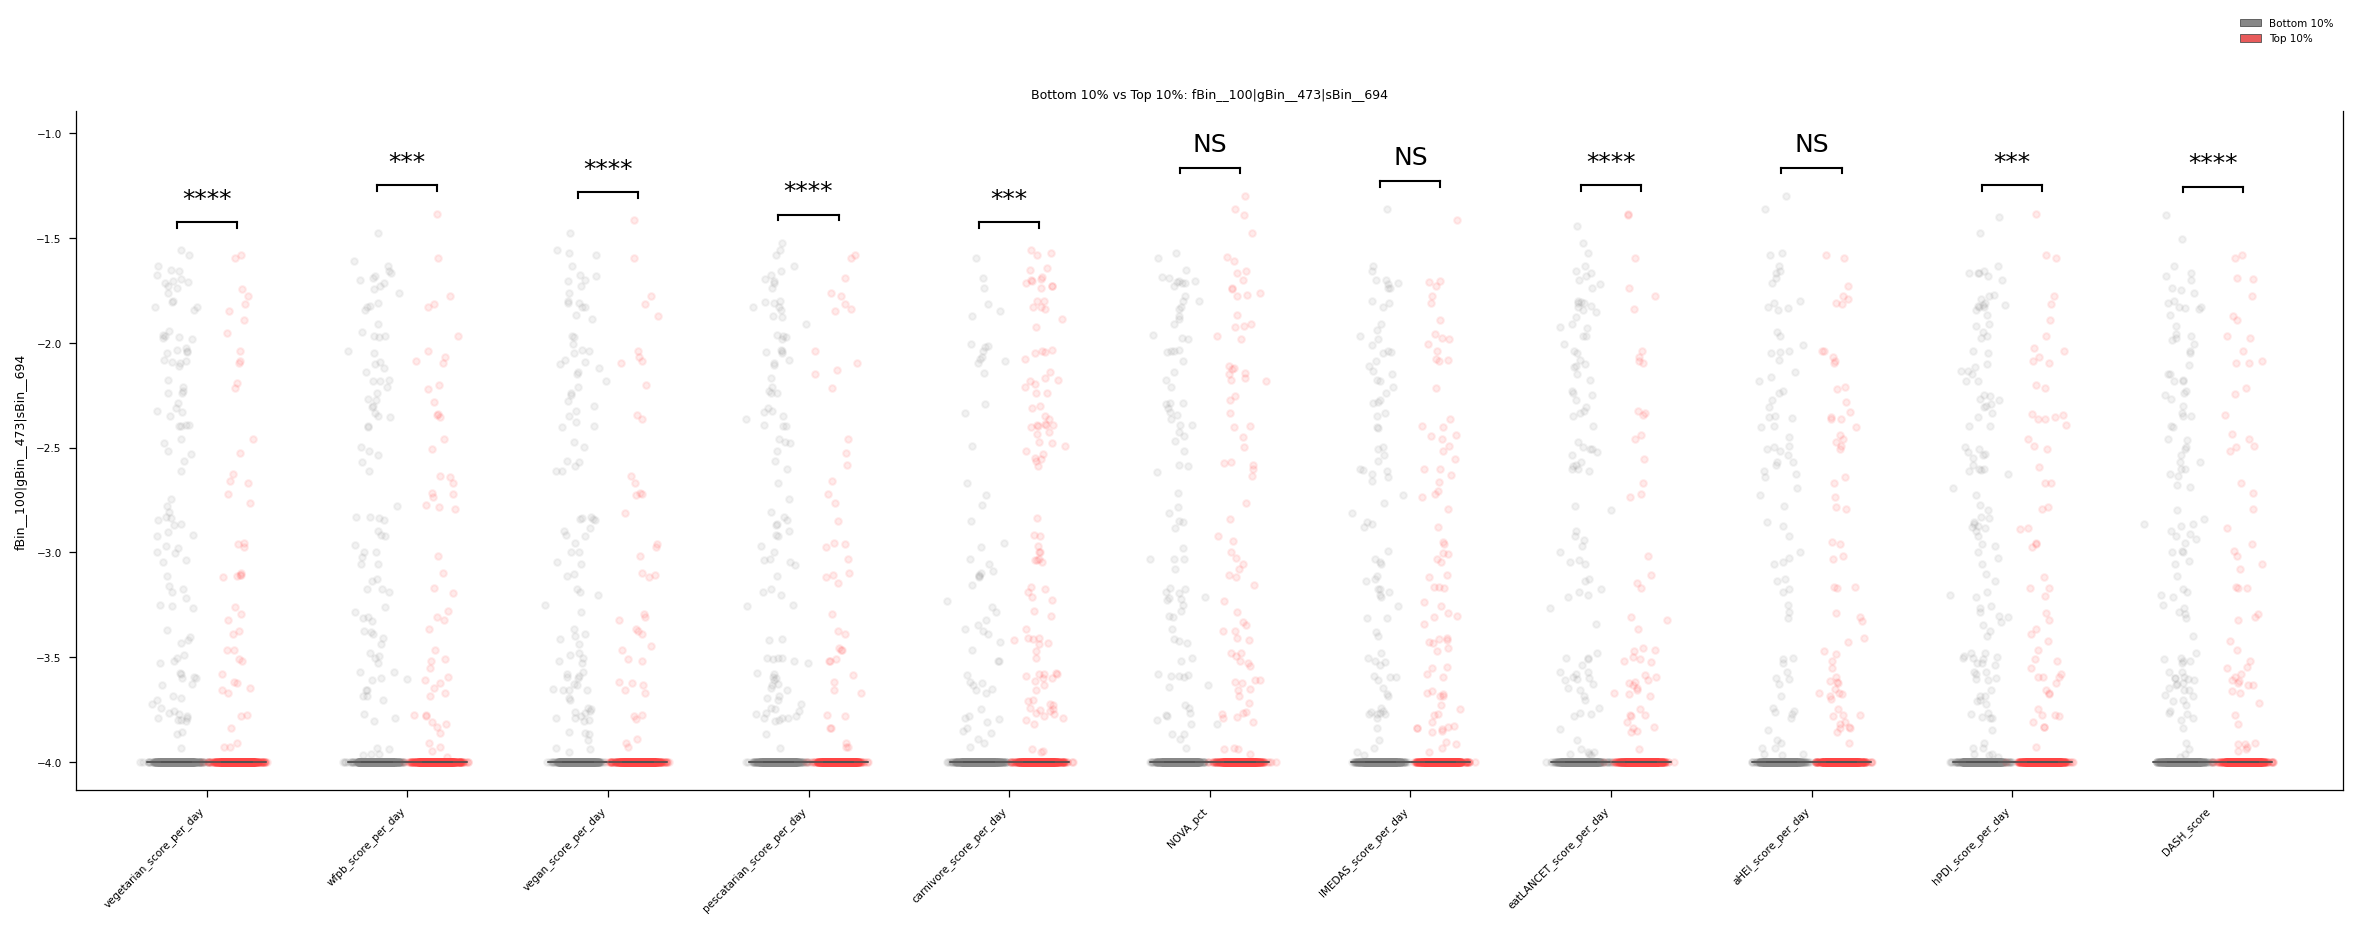

In [ ]:
target_comparison(map_df.loc[1, "targets"], diet_scores, diet_mb)

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import mannwhitneyu
# from statsmodels.stats.multitest import multipletests

# def target_comparison_by_sex(
#     target,
#     diet_scores,
#     data,
#     alpha=0.05,
#     figsize_per_diet=(1.5, 0.8),
#     star_levels=None
# ):
#     """
#     Split participants by sex, then for each diet score compare Bottom 10% vs Top 10%
#     of `target` within each sex. Plot faceted boxplots (one facet for Females, one for Males)
#     with FDR‐adjusted significance stars, and overlay scatter points.
#     """
#     if star_levels is None:
#         star_levels = [
#             (0.0001, '****'),
#             (0.001,  '***'),
#             (0.01,   '**'),
#             (0.05,   '*')
#         ]

#     # 1. Collect raw p-values for each (diet, sex)
#     tests = []
#     for diet_col in diet_scores_no_keto:
#         for sex_label in data['sex'].unique():
#             subset = data[data['sex'] == sex_label]
#             p_low  = subset[diet_col].quantile(0.10)
#             p_high = subset[diet_col].quantile(0.90)

#             low_mask  = (data[diet_col] <= p_low)  & (data['sex'] == sex_label)
#             high_mask = (data[diet_col] >= p_high) & (data['sex'] == sex_label)

#             bottom_vals = data.loc[low_mask, target].dropna()
#             top_vals    = data.loc[high_mask, target].dropna()

#             if len(bottom_vals) < 1 or len(top_vals) < 1:
#                 pval = 1.0
#             else:
#                 try:
#                     _, pval = mannwhitneyu(bottom_vals, top_vals, alternative='two-sided')
#                 except:
#                     pval = 1.0

#             tests.append({
#                 'diet': diet_col,
#                 'sex': sex_label,
#                 'bottom_vals': bottom_vals,
#                 'top_vals': top_vals,
#                 'p_raw': pval
#             })

#     # 2. FDR correction across all tests
#     raw_pvals = [t['p_raw'] for t in tests]
#     reject, p_adj, _, _ = multipletests(raw_pvals, alpha=alpha, method='fdr_bh')
#     for i, t in enumerate(tests):
#         t['p_adj']      = p_adj[i]
#         t['reject_fdr'] = reject[i]

#     # 3. Build long-form DataFrame for plotting
#     records = []
#     for t in tests:
#         diet_col    = t['diet']
#         sex_label   = t['sex']
#         bottom_vals = t['bottom_vals']
#         top_vals    = t['top_vals']

#         for val in bottom_vals:
#             records.append({
#                 'sex':   sex_label,
#                 'diet':  diet_col,
#                 'group': 'Bottom 10%',
#                 'value': val
#             })
#         for val in top_vals:
#             records.append({
#                 'sex':   sex_label,
#                 'diet':  diet_col,
#                 'group': 'Top 10%',
#                 'value': val
#             })

#     extreme_df = pd.DataFrame.from_records(records)

#     # 4. Plot faceted boxplots
#     n = len(diet_scores)
#     total_width = figsize_per_diet[0] * n
#     total_height = 6  # fixed height as requested

#     g = sns.catplot(
#         data=extreme_df,
#         x='diet',
#         y='value',
#         hue='group',
#         col='sex',
#         kind='box',
#         palette=['#888888', '#FF4444'],
#         showfliers=False,
#         height=total_height,
#         aspect=total_width / (2 * total_height),
#         dodge=True
#     )

#     # 5. Rename facet titles: "0"→"Females", "1"→"Males"
#     for ax in g.axes.flat:
#         title = ax.get_title()
#         print(title)
#         if title == 'sex = 0.0':
#             ax.set_title('Females')
#         elif title == 'sex = 1.0':
#             ax.set_title('Males')

#     g.set_xticklabels(rotation=45, ha='right')
#     g.set_axis_labels("", target)
#     g._legend.set_title("")  # remove legend title
#     g._legend.set_bbox_to_anchor((1, 1))

#     # 6. Annotate each facet with brackets, stars, and scatter points
#     for ax, (sex_label, sub_df) in zip(g.axes.flat, extreme_df.groupby('sex')):
#         # subset tests for this sex
#         sex_tests = [t for t in tests if t['sex'] == sex_label]

#         facet_min = sub_df['value'].min()
#         facet_max = sub_df['value'].max()
#         y_range = facet_max - facet_min
#         ax.set_ylim(facet_min - 0.05 * y_range, facet_max + 0.15 * y_range)

#         # Seaborn dodge offsets
#         dodge = 0.6 * 0.5  # half box width
#         offset = dodge * 0.5  # ~0.15

#         for i, diet_col in enumerate(diet_scores):
#             t = next(tt for tt in sex_tests if tt['diet'] == diet_col)
#             bottom_vals = t['bottom_vals']
#             top_vals    = t['top_vals']

#             # Determine stars
#             star = 'NS'
#             for thresh, s in star_levels:
#                 if t['p_adj'] < thresh:
#                     star = s
#                     break

#             x_low  = i - offset
#             x_high = i + offset

#             # 6a. Overlay scatter (with jitter)
#             jitter = 0.05
#             xs_low  = np.random.normal(loc=x_low, scale=jitter, size=len(bottom_vals))
#             xs_high = np.random.normal(loc=x_high, scale=jitter, size=len(top_vals))
#             ax.scatter(xs_low,  bottom_vals, color='#888888', alpha=0.1, s=10)
#             ax.scatter(xs_high, top_vals,    color='#FF4444', alpha=0.1, s=10)

#             # 6b. Draw the bracket
#             y_bot_max = bottom_vals.max() if len(bottom_vals) else facet_min
#             y_top_max = top_vals.max()    if len(top_vals)    else facet_min
#             y_line = max(y_bot_max, y_top_max) + 0.05 * y_range
#             y_text = y_line + 0.02 * y_range

#             ax.plot([x_low, x_high], [y_line, y_line], color='black', linewidth=1.0)
#             ax.plot([x_low, x_low], [y_line, y_line - 0.01 * y_range], color='black', linewidth=1.0)
#             ax.plot([x_high, x_high], [y_line, y_line - 0.01 * y_range], color='black', linewidth=1.0)
#             ax.text((x_low + x_high) / 2, y_text, star,
#                     ha='center', va='bottom', color='black', fontsize=12)

#     
#     plt.show()


# # Example usage:
# target_comparison_by_sex('Shannon_diversity', diet_scores, diet_mb)


Differentially abundant species

In [ ]:
map_df.loc[1, "targets"]

'fBin__100|gBin__473|sBin__694'

In [ ]:
diet_mb.columns

Index(['Acorn squash', 'Alfalfa sprouts', 'Almond Beverage', 'Almond flour',
       'Almond spread', 'Almonds', 'Amba', 'Apple', 'Apple Cake',
       'Apple Vinegar',
       ...
       'fBin__94|gBin__449|sBin__656', 'fBin__95|gBin__450|sBin__659',
       'fBin__96|gBin__457|sBin__669', 'fBin__97|gBin__462|sBin__676',
       'fBin__97|gBin__462|sBin__678', 'fBin__99|gBin__469|sBin__687',
       'Richness', 'Shannon_diversity', 'GMWI2_score',
       'modified_HACK_top17_score'],
      dtype='object', length=1428)

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
import pandas as pd
import numpy as np

# Loop through each diet score
for diet_score in diet_scores:
    beta_col = f'beta_{diet_score}'
    pval_col = f'pval_{diet_score}'
    qval_col = f'qval_{diet_score}'

    # Add empty columns to map_df
    map_df[beta_col] = np.nan
    map_df[pval_col] = np.nan

    # Loop through each target
    for i, row in map_df.iterrows():
        target = row['targets']
        predictors = ['age', 'sex', diet_score]

        # Ensure required columns exist
        if not all(col in diet_mb.columns for col in predictors + [target]):
            continue

        # Drop missing data
        diff_df = diet_mb[predictors + [target]].dropna()

        if diff_df.shape[0] < 10:
            continue

        # Standardize all columns (predictors and target)
        scaler = StandardScaler()
        diff_df_scaled = pd.DataFrame(scaler.fit_transform(diff_df), columns=diff_df.columns, index=diff_df.index)

        X = diff_df_scaled.drop(columns=target)
        y = diff_df_scaled[target]
        X = sm.add_constant(X)

        # Fit model
        model = sm.OLS(y, X).fit()

        if diet_score in model.params:
            map_df.at[i, beta_col] = model.params[diet_score]
            map_df.at[i, pval_col] = model.pvalues[diet_score]

    # FDR correction
    pvals = map_df[pval_col]
    mask = pvals.notna()
    map_df.loc[mask, qval_col] = multipletests(pvals[mask], method='fdr_bh')[1]

# ✅ Done — map_df now has beta_*, pval_*, and qval_* columns for each diet score


In [41]:
map_df

index.1                    Microbe_Name  Pearson Correlation  \
index                                                                 
594        594  Lawsonibacter asaccharolyticus             0.426409   
46          46      Streptococcus thermophilus             0.423344   
223        223            UBA11774 sp003507655             0.376008   
34          34          Bifidobacterium longum             0.361910   
221        221             Pararoseburia lenta             0.324238   
...        ...                             ...                  ...   
599        599  Ruminococcus_F champanellensis             0.025609   
350        350        Congzhengia minquanensis             0.025561   
634        634        Ruminococcus sp900540005             0.025512   
348        348  Neochristensenella sp003150515             0.024920   
524        524             CAG-170 sp934668295             0.023886   

                               targets  prevalence_count  prevalence_pct  \
index                                                                      
594    fBin__541|gBin__2135|sBin__3290              8631           85.73   
46      fBin__187|gBin__748|sBin__1116              3937           39.10   
223    fBin__367|gBin__1458|sBin__2166              7312           72.63   
34       fBin__121|gBin__572|sBin__848              7194           71.45   
221    fBin__367|gBin__1456|sBin__2163              3801           37.75   
...                                ...               ...             ...   
599    fBin__564|gBin__2174|sBin__3339               601            5.97   
350    fBin__431|gBin__1689|sBin__2491               573            5.69   
634    fBin__601|gBin__2279|sBin__3480              1114           11.06   
348    fBin__424|gBin__1678|sBin__2480               748            7.43   
524    fBin__541|gBin__2057|sBin__3150              2344           23.28   

       beta_vegetarian_score_per_day  pval_vegetarian_score_per_day  \
index                                                                 
594                        -0.167551                   1.942893e-62   
46                          0.006970                   4.932284e-01   
223                         0.043969                   1.137491e-05   
34                          0.098288                   9.800546e-23   
221                         0.086275                   1.486372e-17   
...                              ...                            ...   
599                         0.009471                   3.519899e-01   
350                        -0.006410                   5.283202e-01   
634                         0.002998                   7.681633e-01   
348                         0.032834                   1.235561e-03   
524                         0.000160                   9.874416e-01   

       qval_vegetarian_score_per_day  beta_wfpb_score_per_day  ...  \
index                                                          ...   
594                     3.225203e-60                -0.266011  ...   
46                      5.639818e-01                -0.061105  ...   
223                     3.631221e-05                 0.149468  ...   
34                      2.099214e-21                -0.146048  ...   
221                     2.193224e-16                 0.262770  ...   
...                              ...                      ...  ...   
599                     4.196073e-01                 0.023984  ...   
350                     5.966064e-01                -0.017032  ...   
634                     8.160967e-01                 0.023005  ...   
348                     2.809632e-03                -0.009057  ...   
524                     9.907199e-01                -0.008719  ...   

       qval_hPDI_score_per_day  beta_DASH_score  pval_DASH_score  \
index                                                              
594               5.115215e-66        -0.150480     7.688049e-51   
46                2.628907e-04         0.052130     2.7

In [ ]:
map_df.to_csv(home_path + f"data/{PROBLEM}/{SPECIES}/diet_comparisons_map_df.csv", index=False)

Volcano plots

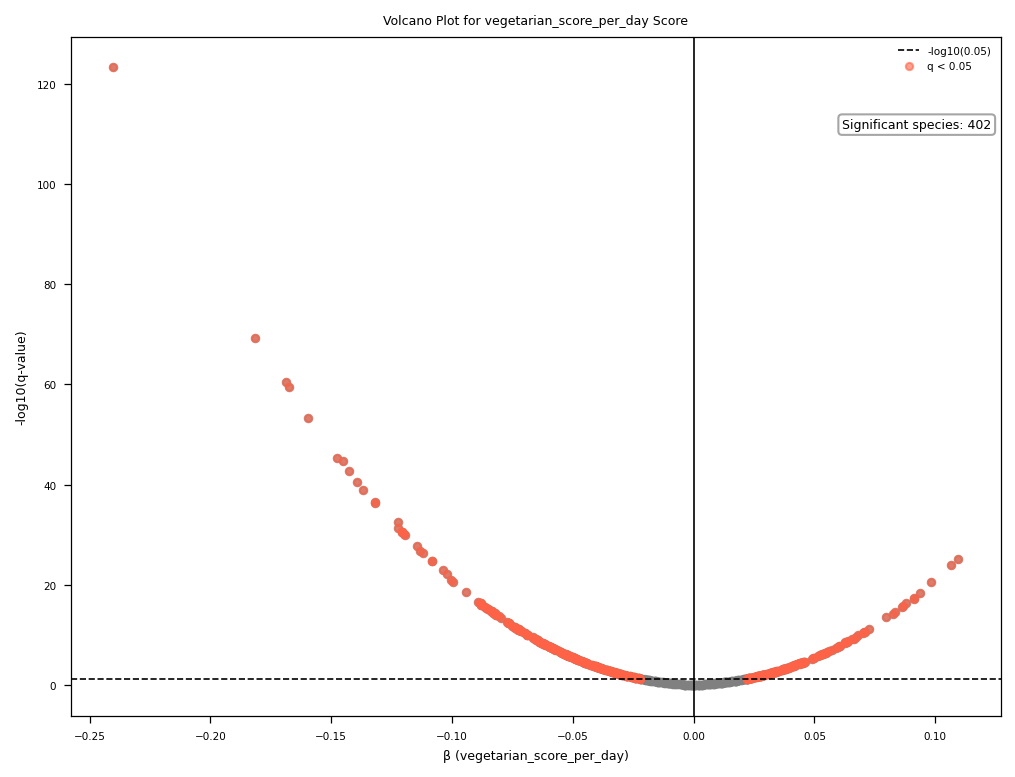

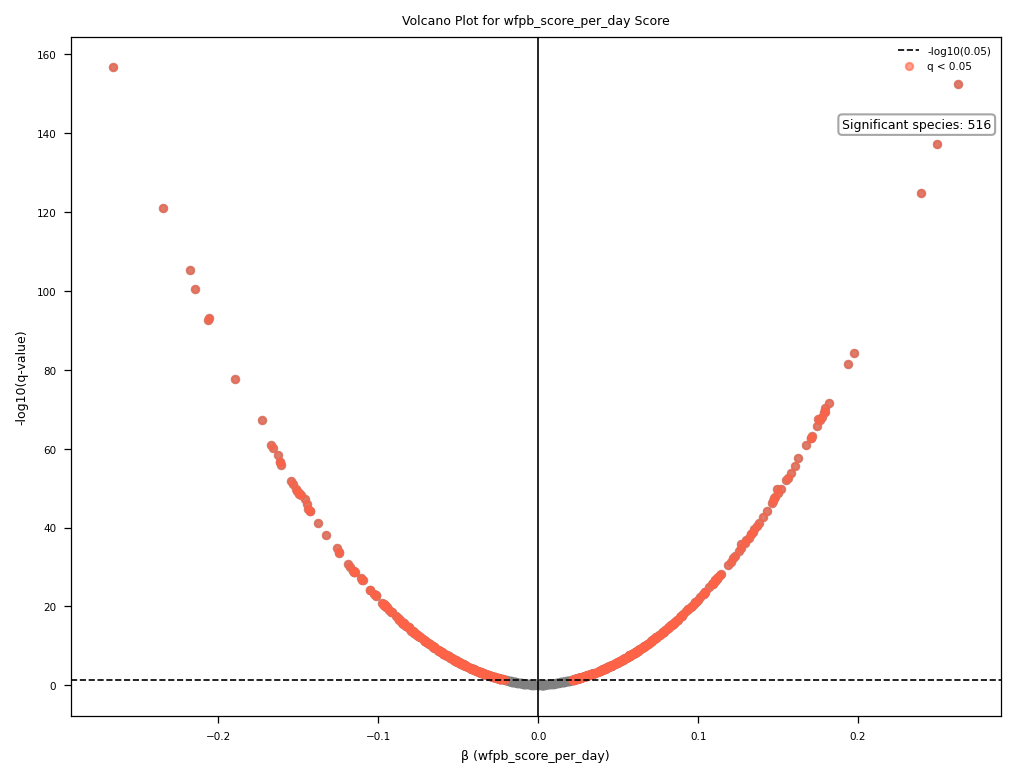

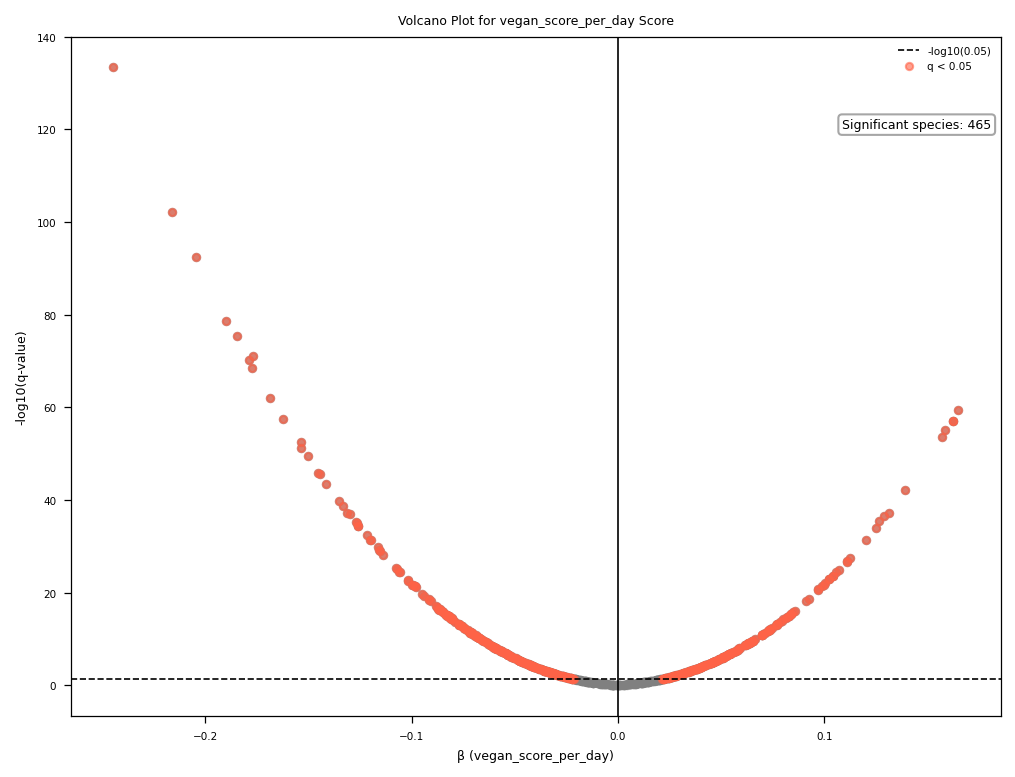

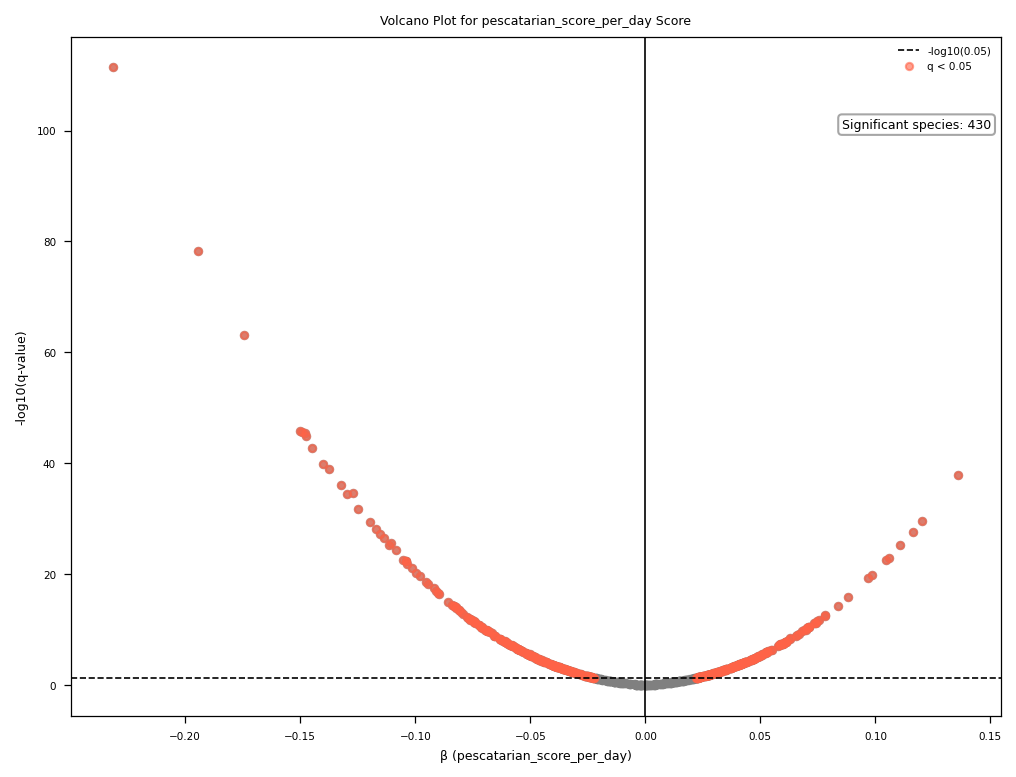

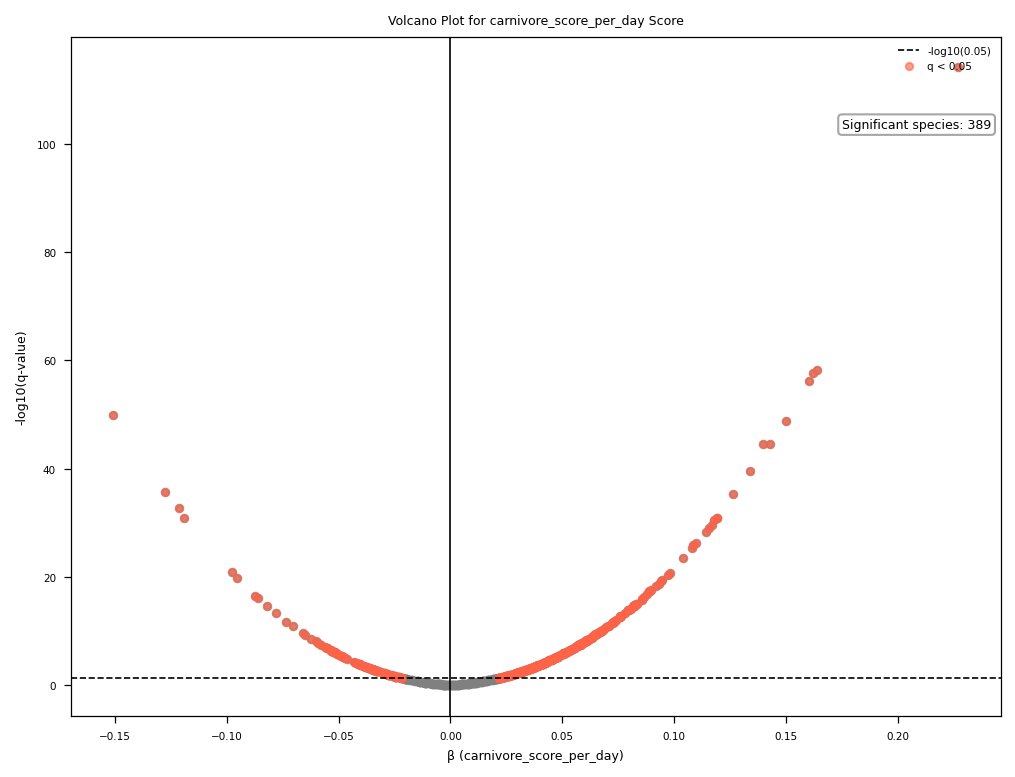

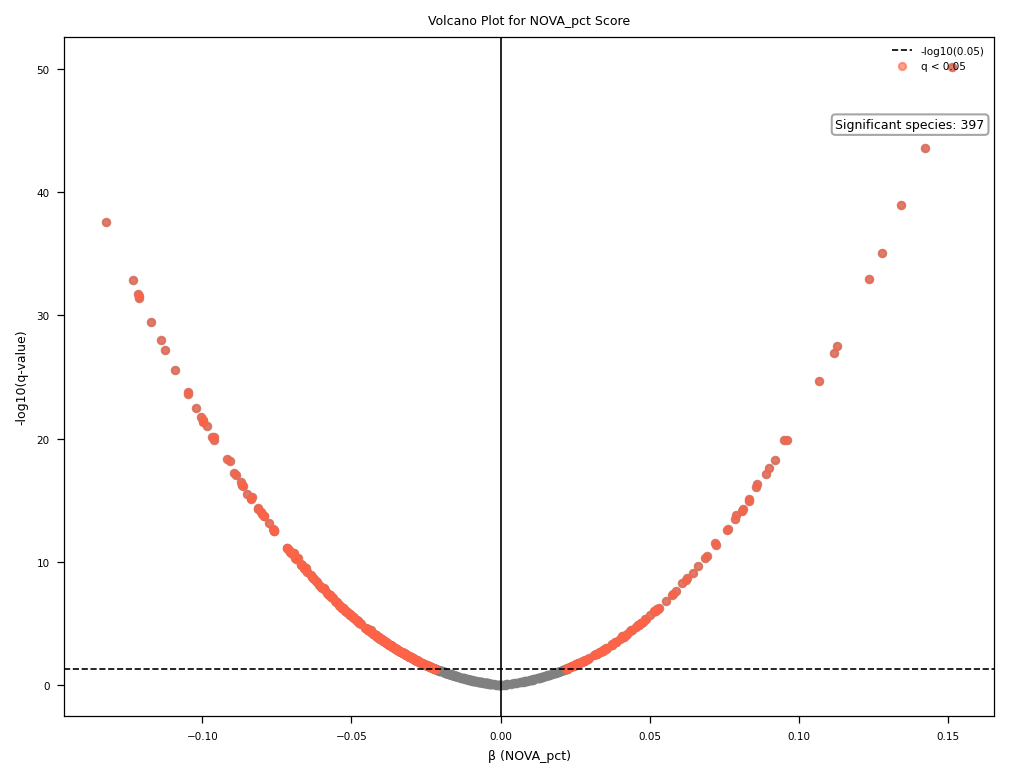

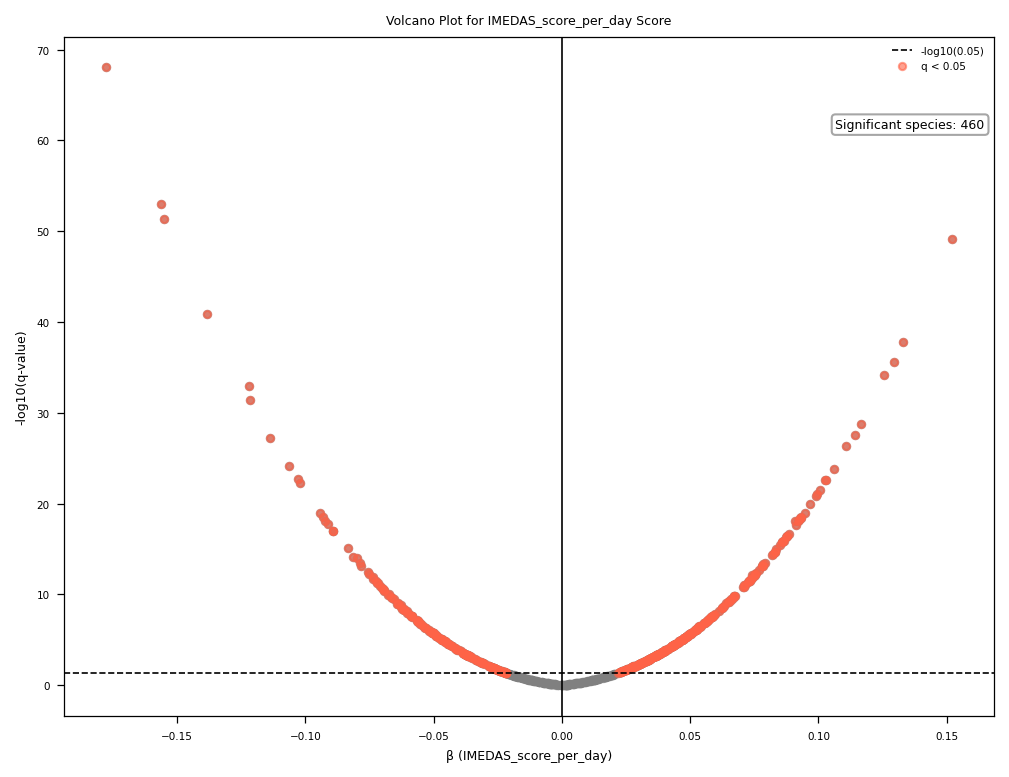

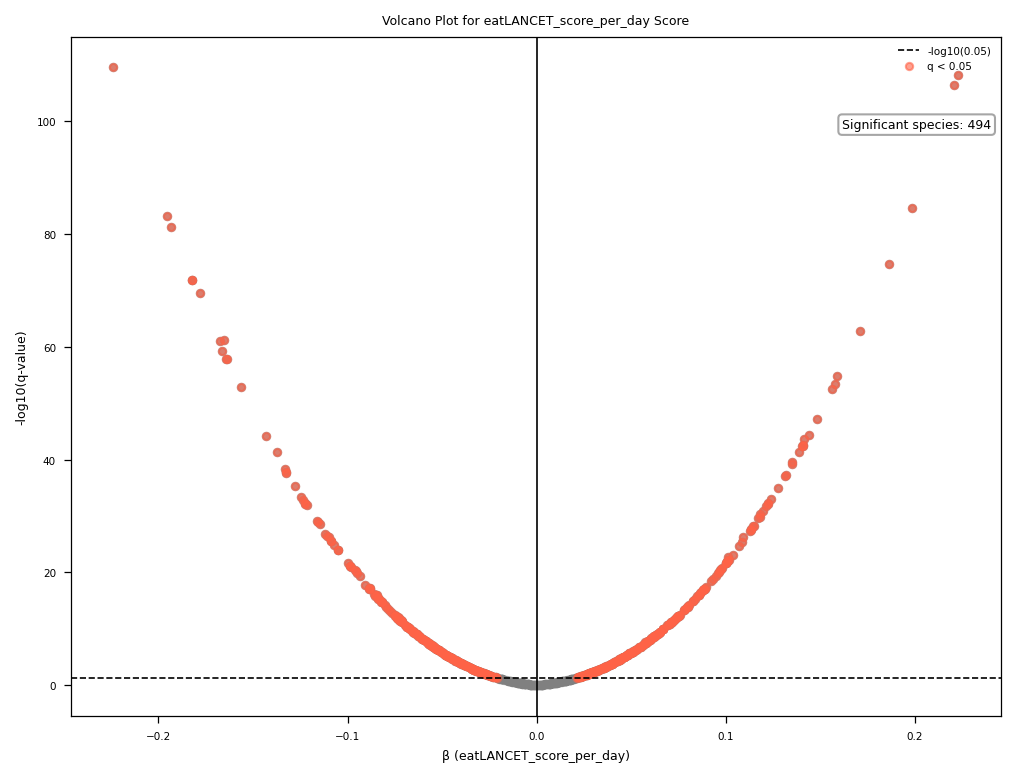

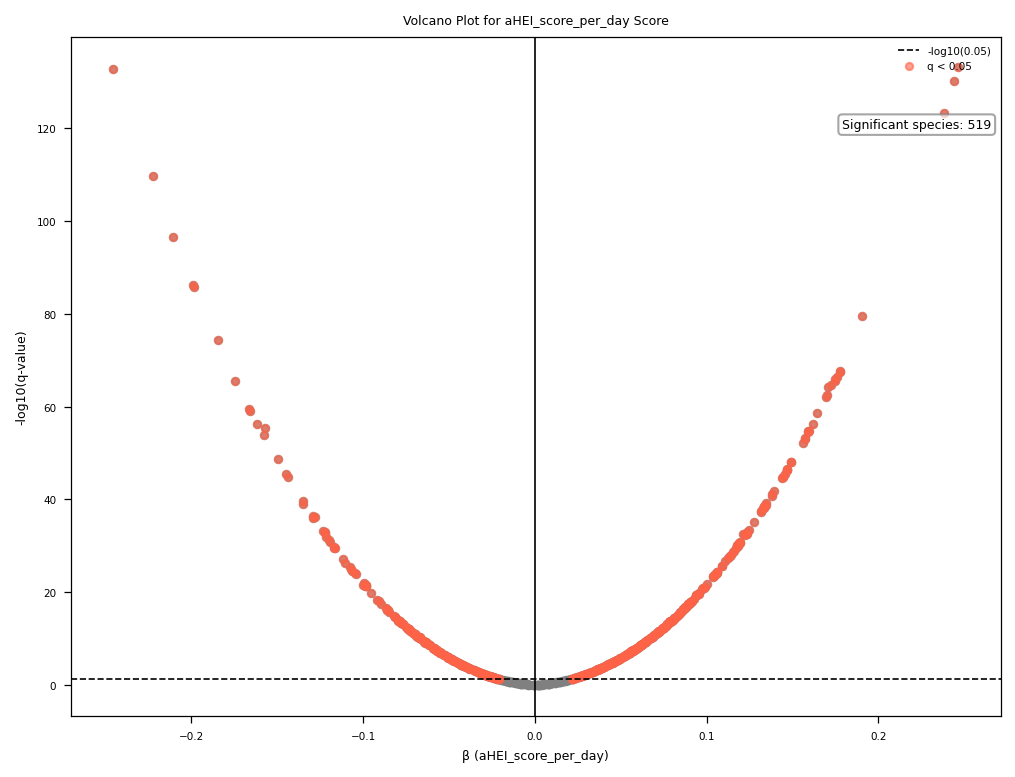

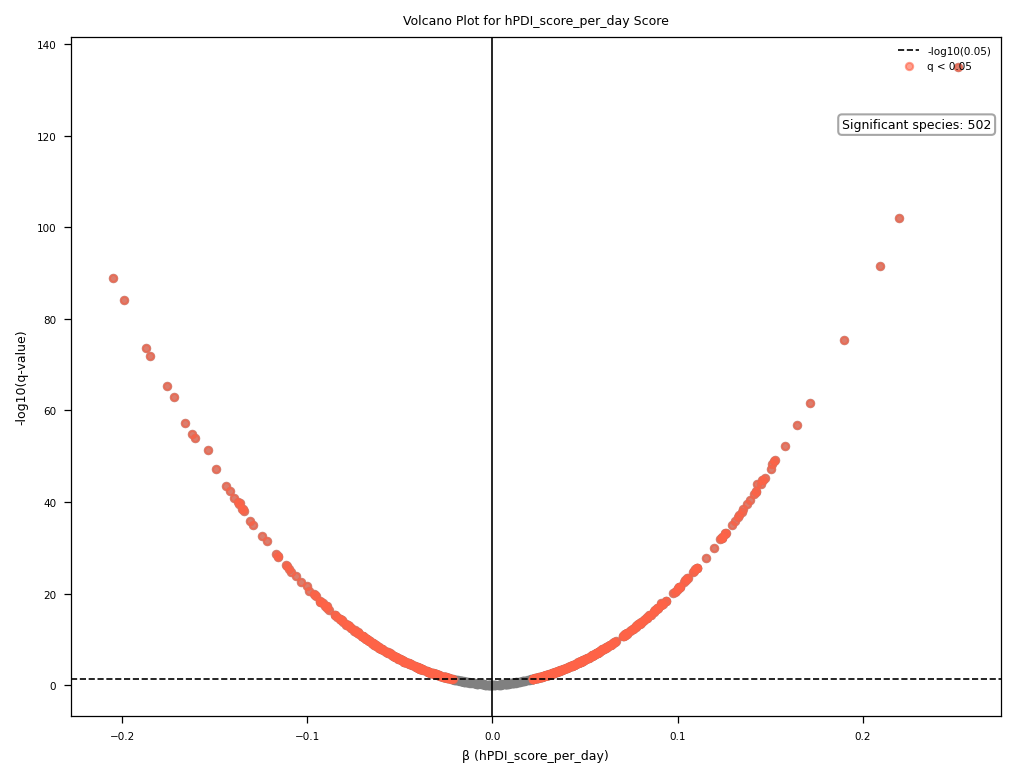

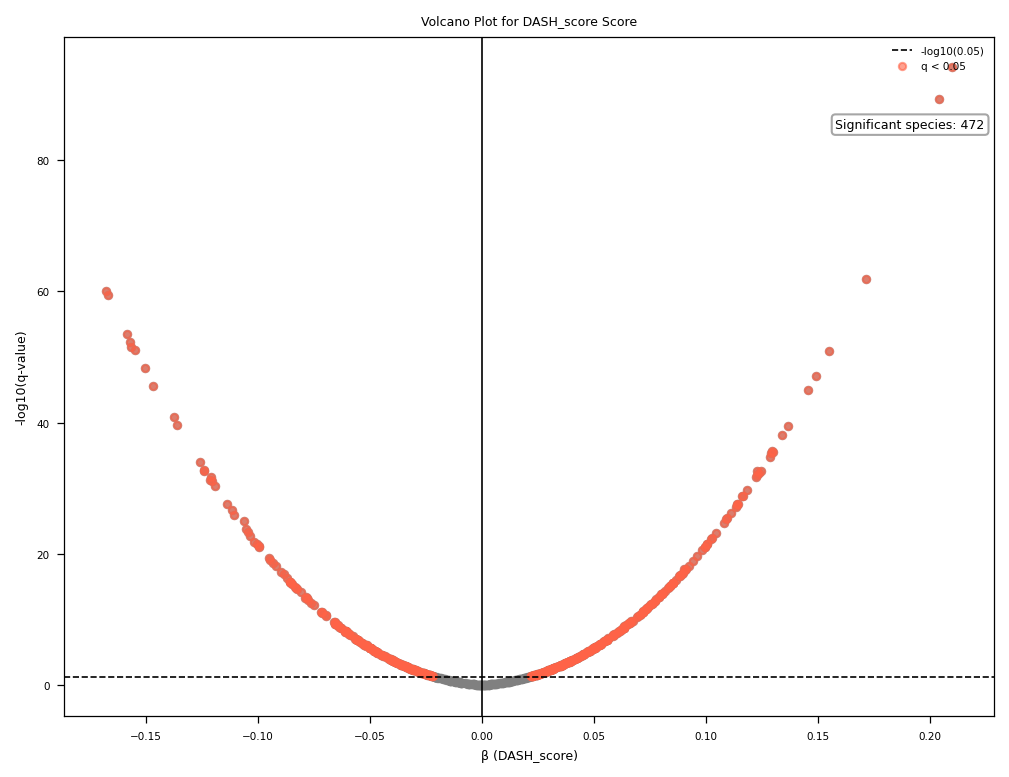

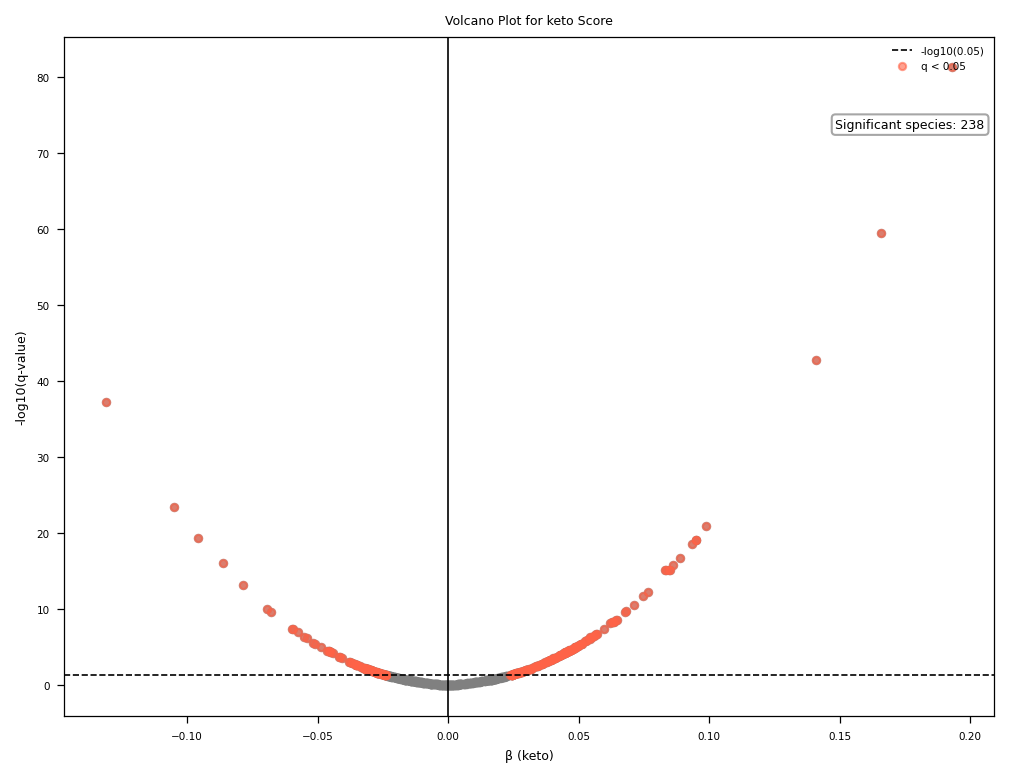

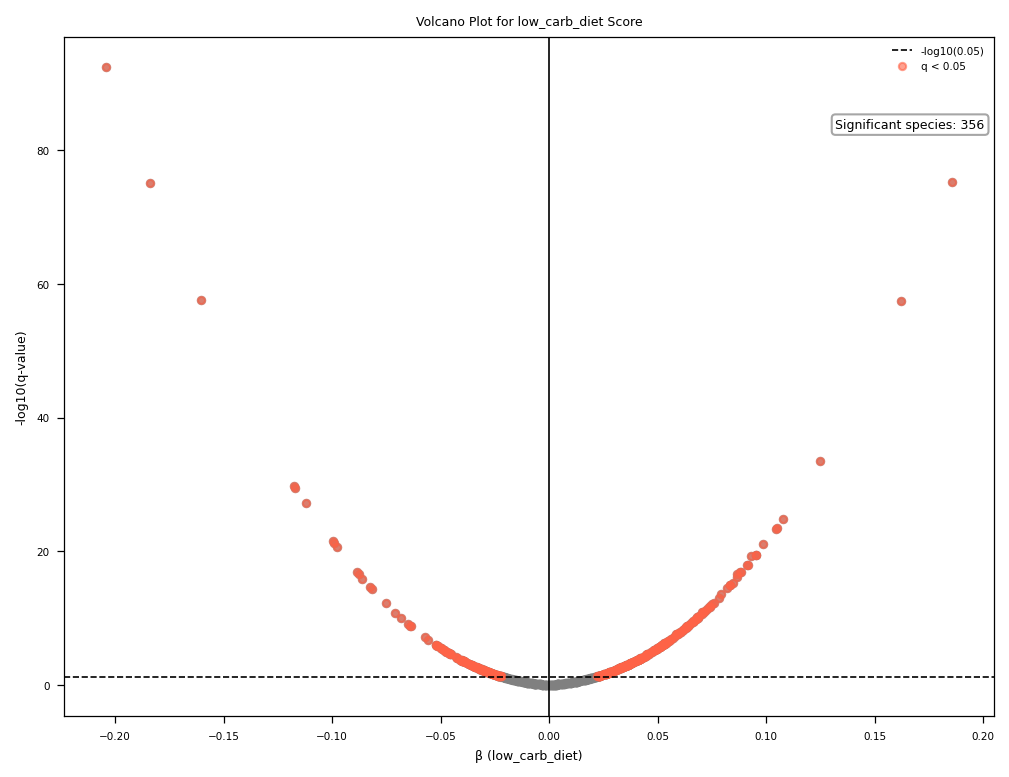

In [42]:
# significance threshold on q-value
q_sig = 0.05

for diet in diet_scores:
    betas = map_df[f'beta_{diet}']
    qvals = map_df[f'qval_{diet}']

    # avoid -log10(0)
    neg_log_q = -np.log10(qvals.replace(0, np.nextafter(0, 1)))

    # mask of significant species
    sig = qvals < q_sig
    n_sig = sig.sum()

    plt.figure(figsize=(8,6))
    plt.scatter(betas, neg_log_q, c='gray', alpha=0.7)

    # highlight significant
    plt.scatter(
        betas[sig],
        neg_log_q[sig],
        c='tomato',
        alpha=0.6,
        label=f'q < {q_sig}'
    )

    # reference lines
    plt.axvline(0, color='black', linestyle='-')
    plt.axhline(-np.log10(q_sig), color='black', linestyle='--', label=f'-log10({q_sig})')

    # annotate number of significant species
    plt.text(
        0.99, 0.88,
        f'Significant species: {n_sig}',
        transform=plt.gca().transAxes,
        horizontalalignment='right',
        verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7)
    )

    # labels & title
    plt.xlabel(f'β ({diet})')
    plt.ylabel('-log10(q-value)')
    plt.title(f'Volcano Plot for {diet} Score')
    plt.legend(loc='upper right')

    
    plt.show()


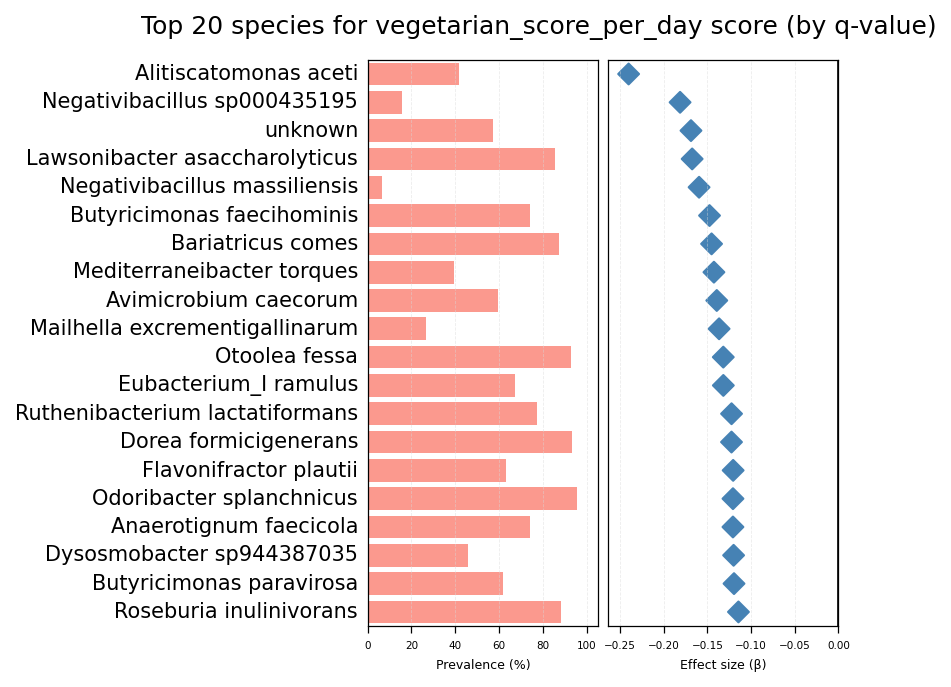

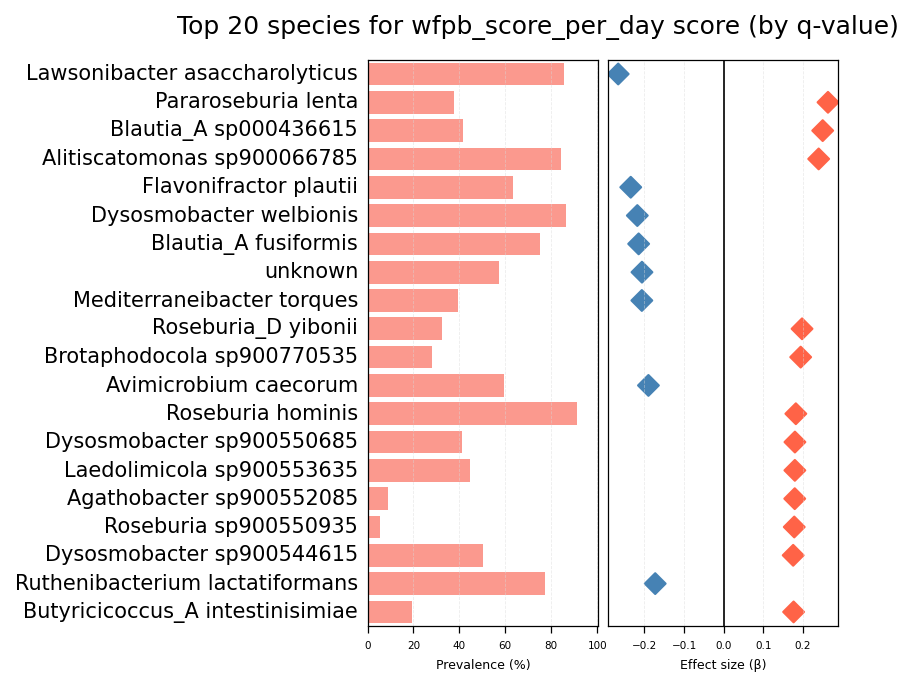

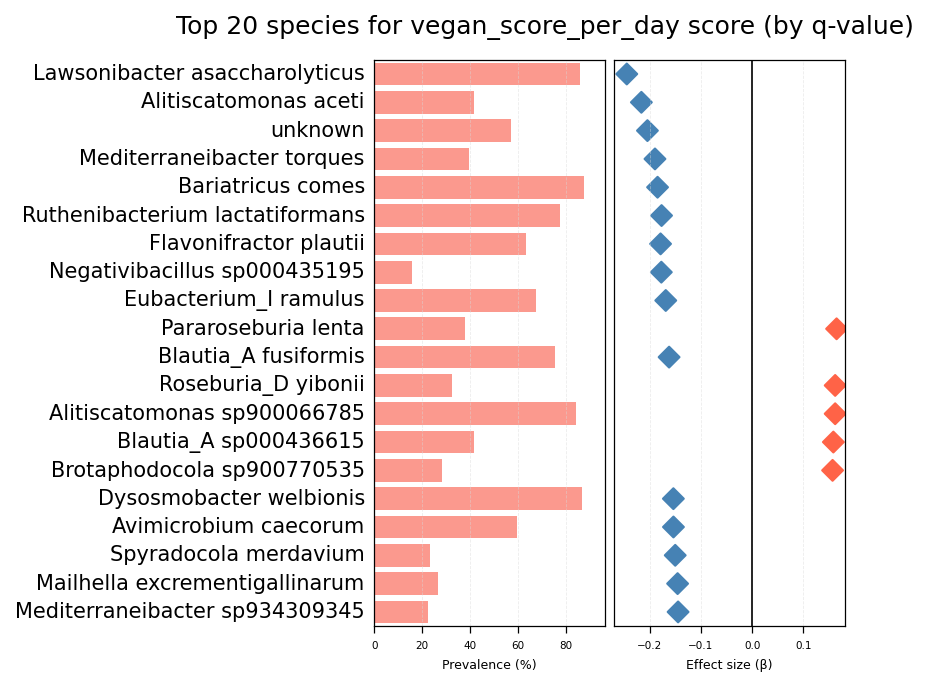

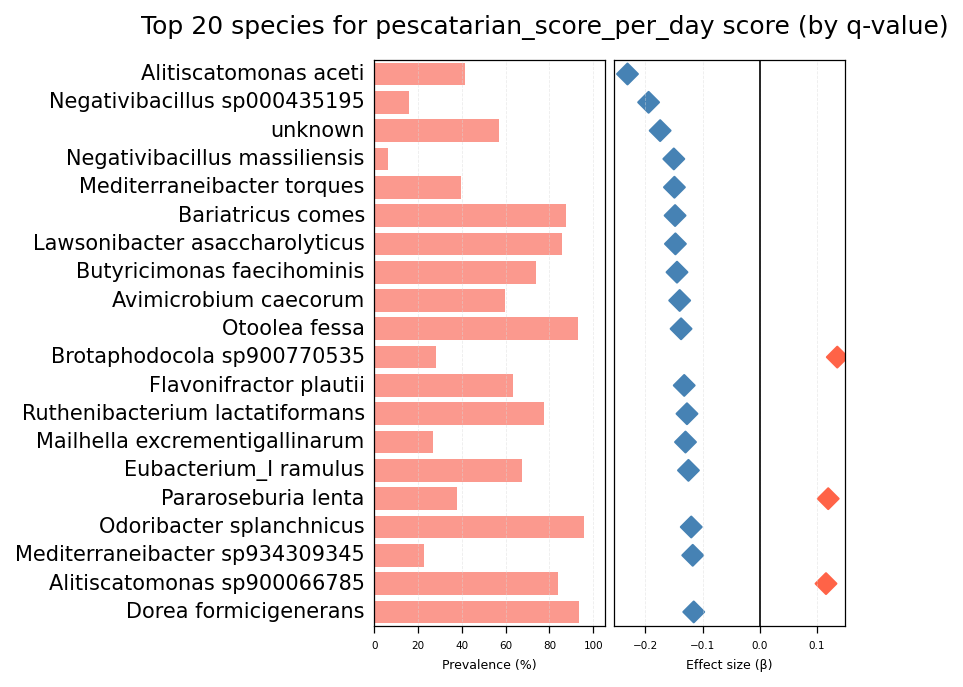

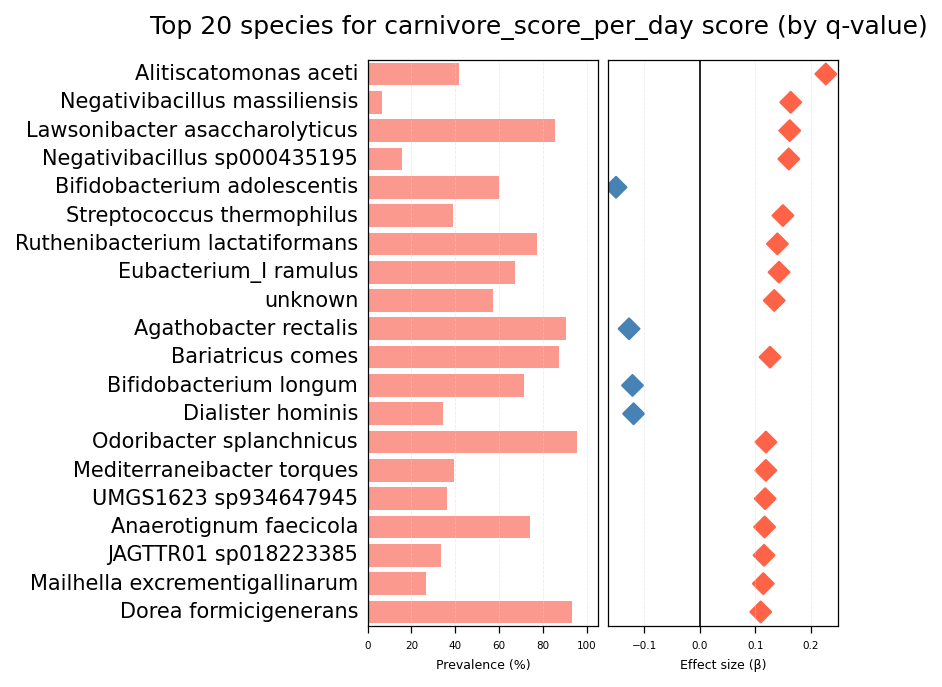

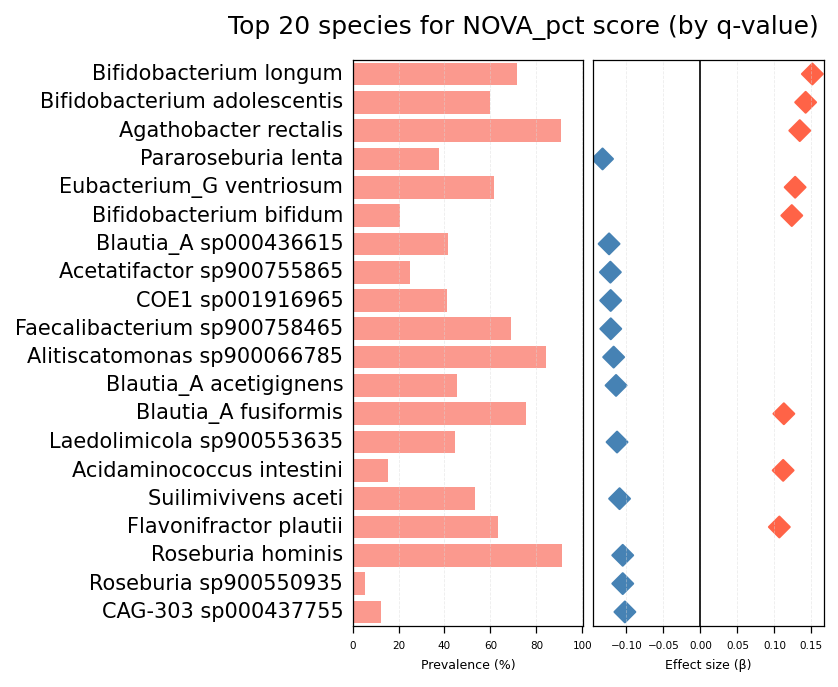

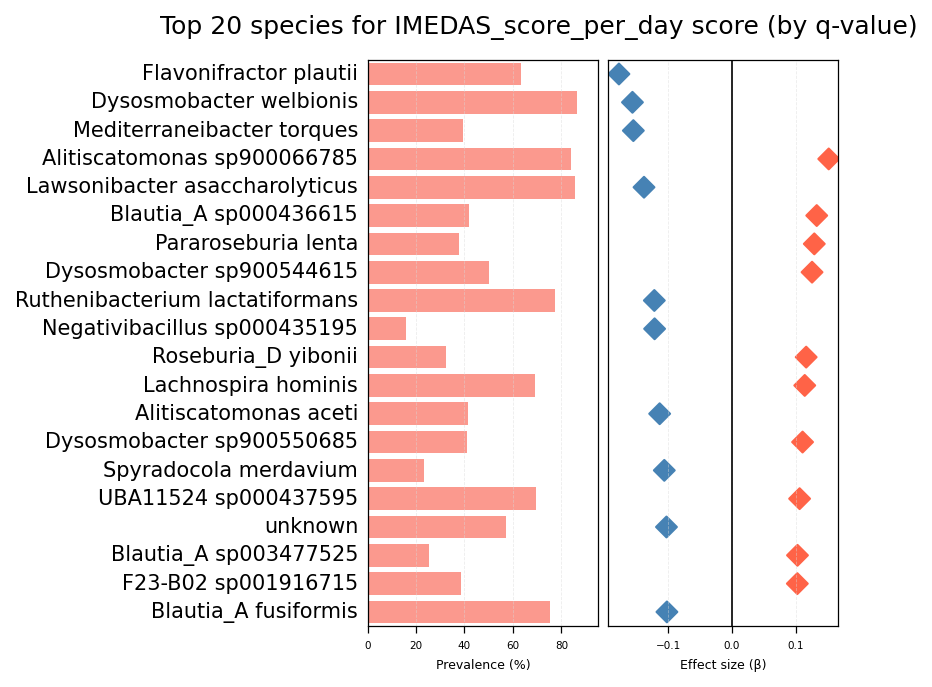

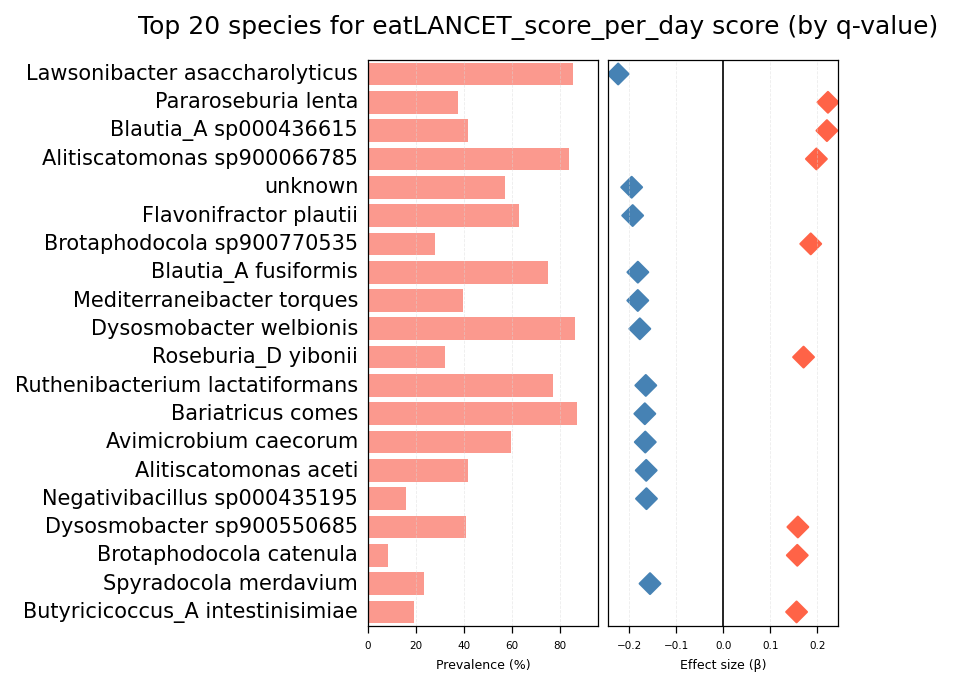

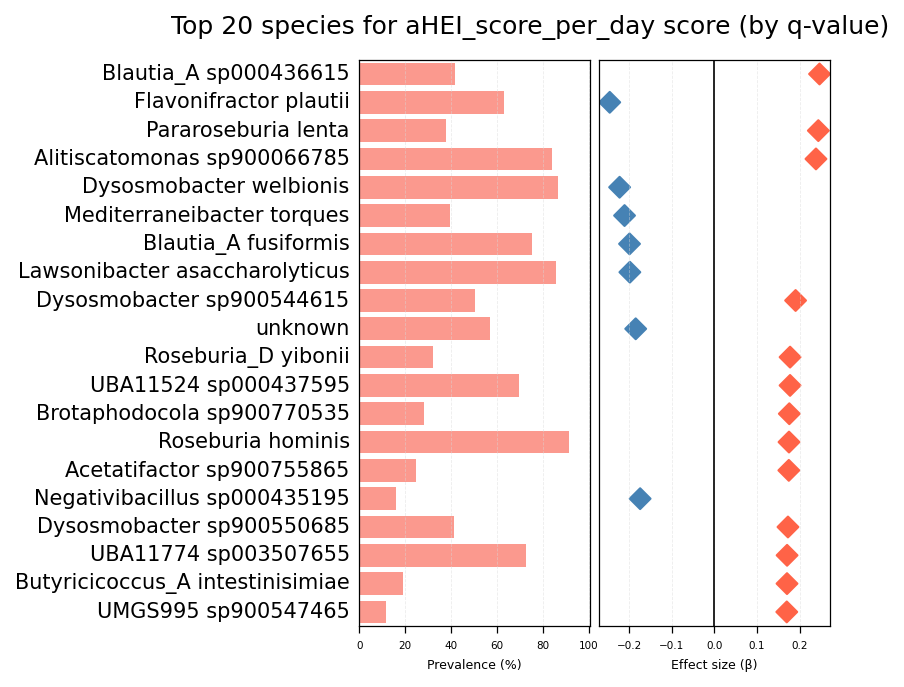

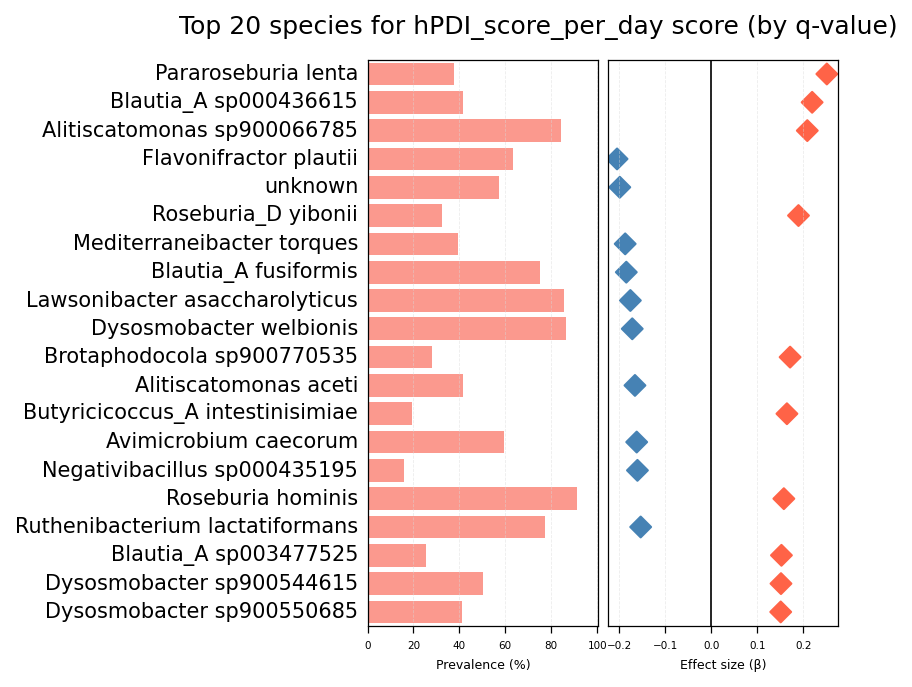

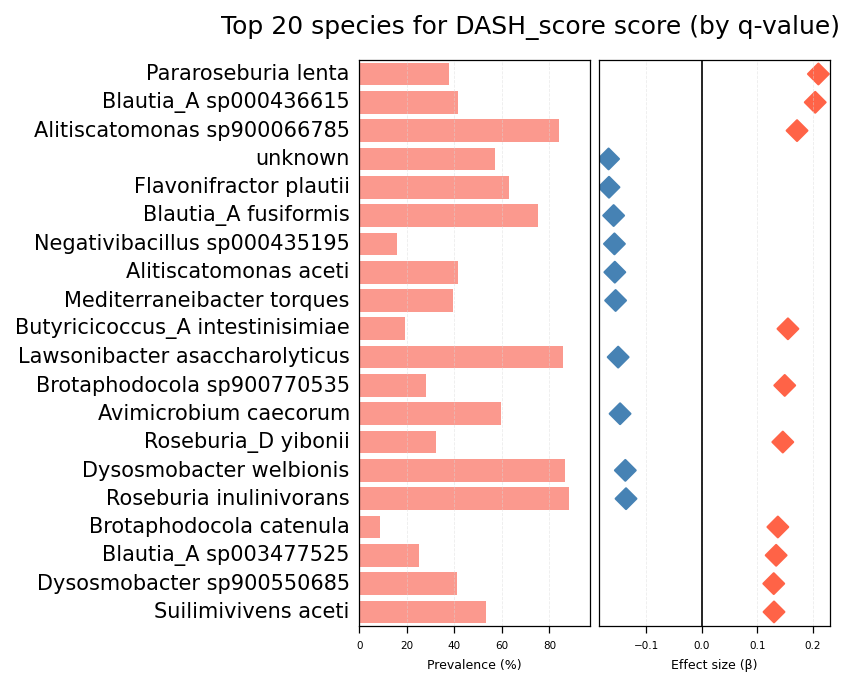

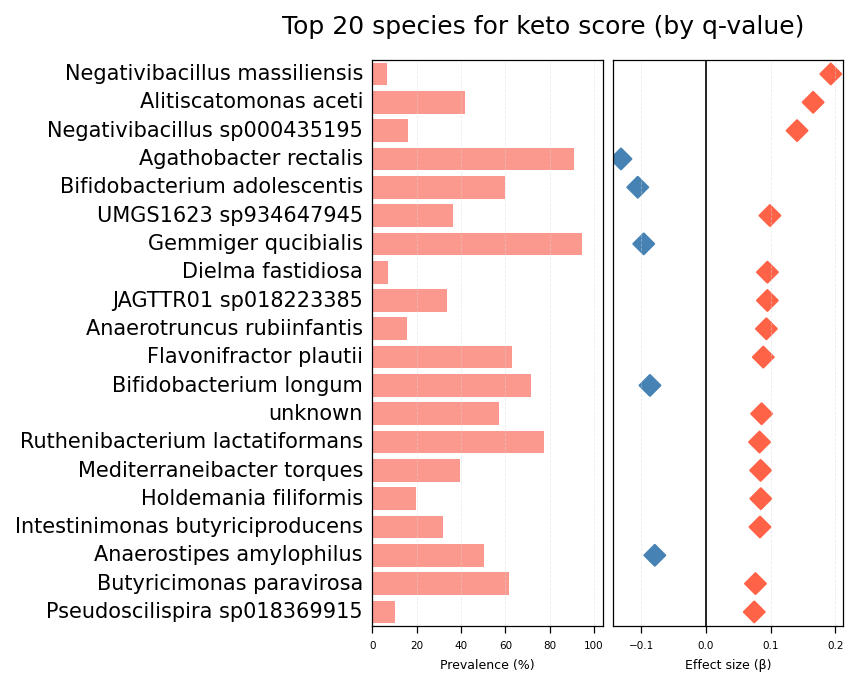

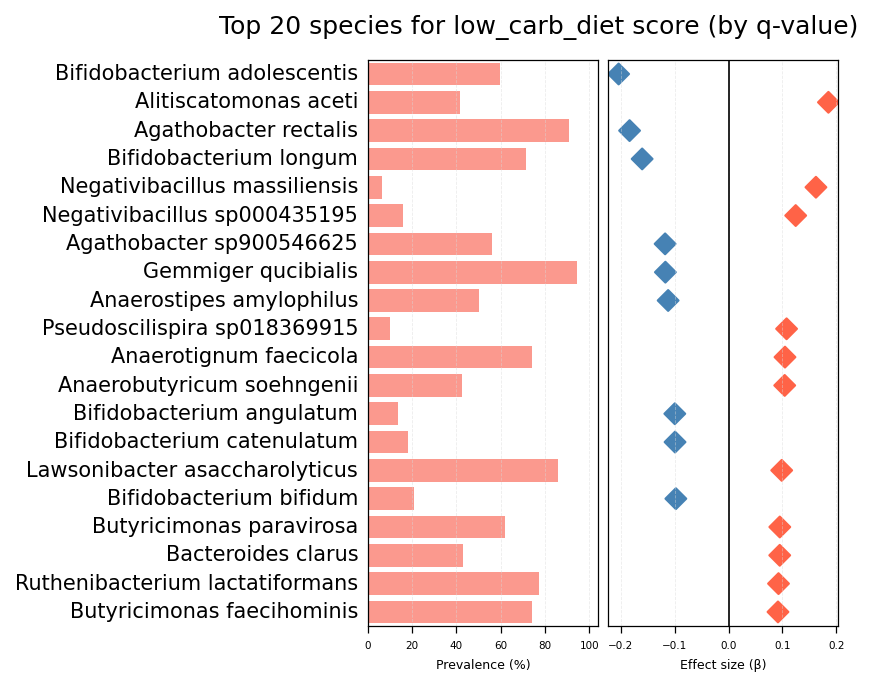

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_top20_diet_alt(diet, top_n=20):
    qcol = f'qval_{diet}'
    bcol = f'beta_{diet}'

    # pick & sort top N by q–value
    top20 = (
        map_df
        .nsmallest(top_n, qcol)
        .sort_values(qcol, ascending=False)
        .reset_index(drop=True)
    )
    names      = top20['Microbe_Name']
    prevalence = top20['prevalence_pct']
    betas      = top20[bcol]
    n = len(top20)
    y = np.arange(n)

    # build a 1×3 grid: [names | prevalence | betas]
    fig = plt.figure(figsize=(5, 5))
    gs  = fig.add_gridspec(1, 3, width_ratios=[0.35, 0.8, 0.8], wspace=0.05)

    ax_names = fig.add_subplot(gs[0, 0])
    ax_prev  = fig.add_subplot(gs[0, 1], sharey=ax_names)
    ax_beta  = fig.add_subplot(gs[0, 2], sharey=ax_names)

    # --- panel 1: names only ---
    ax_names.axis('off')
    ax_names.set_ylim(n - 0.5, -0.5)
    for i, nm in enumerate(names):
        ax_names.text(1.0, i, nm, 
                      ha='right', va='center', 
                      fontsize=10)

    # --- panel 2: prevalence ---
    ax_prev.barh(y, prevalence, color='salmon', alpha=0.8)
    ax_prev.set_xlabel('Prevalence (%)')
    ax_prev.set_xlim(0, prevalence.max() * 1.1)
    ax_prev.grid(axis='x', linestyle='--', alpha=0.5)
    ax_prev.invert_yaxis()

    # --- panel 3: effect sizes ---
    colors = ['steelblue' if β < 0 else 'tomato' for β in betas]
    ax_beta.scatter(betas, y, marker='D', c=colors, s=50)
    ax_beta.axvline(0, color='black', linestyle='-')
    ax_beta.set_xlabel('Effect size (β)')
    x_min = min(betas.min() * 1.1, 0)
    x_max = max(betas.max() * 1.1, 0)
    ax_beta.set_xlim(x_min, x_max)
    ax_beta.grid(axis='x', linestyle='--', alpha=0.5)
    ax_beta.set_yticks([])

    # super‐title
    fig.suptitle(f'Top {top_n} species for {diet} score (by q-value)', 
                 fontsize=12, y=0.94)

    plt.show()


# run for each diet
for diet in diet_scores:
    plot_top20_diet_alt(diet)


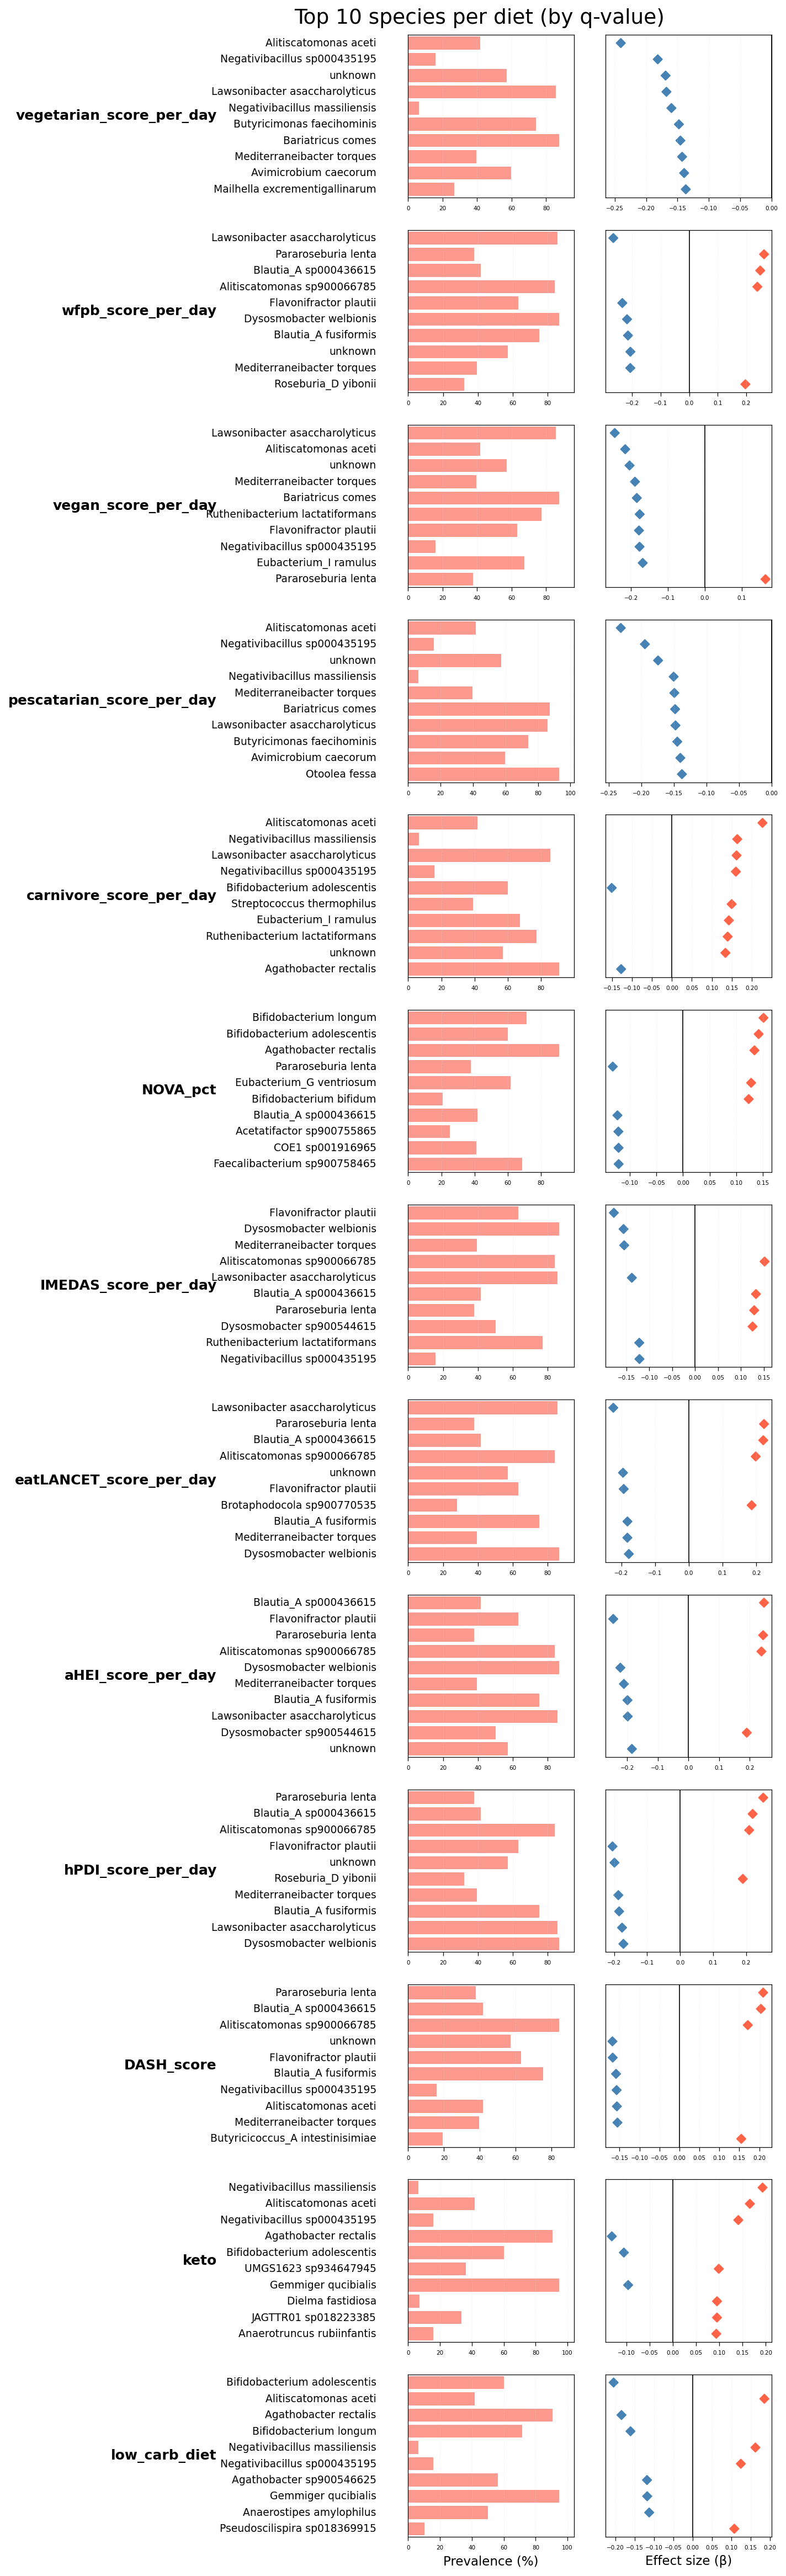

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
top_n      = 10
n_diets    = len(diet_scores)
widths     = [0.35, 0.4, 0.4]     # relative widths of the 3 columns
fig_width  = 7.5
fig_height =  2.5 * n_diets         # 5" per diet
y_min, y_max = -0.5, top_n - 0.5

# create the grid: n_diets rows × 3 columns
fig, axes = plt.subplots(
    n_diets, 3,
    figsize=(fig_width, fig_height),
    gridspec_kw={'width_ratios': widths, 'hspace': 0.2}
)
# leave a bit of room on left/right/top
fig.subplots_adjust(left=0.10, right=0.97, top=0.96, bottom=0.03)

for i, diet in enumerate(diet_scores):
    # pull data
    qcol = f'qval_{diet}'
    bcol = f'beta_{diet}'
    top20 = (
        map_df
        .nsmallest(top_n, qcol)
        .sort_values(qcol, ascending=False)
        .reset_index(drop=True)
    )
    names      = top20['Microbe_Name']
    prevalence = top20['prevalence_pct']
    betas      = top20[bcol]
    y = np.arange(top_n)

    ax_names = axes[i, 0]
    ax_prev  = axes[i, 1]
    ax_beta  = axes[i, 2]
    

    # --- names panel ---
    ax_names.axis('off')
    ax_names.set_ylim(y_min, y_max)
    for j, nm in enumerate(names):
        ax_names.text(1.0, j, nm, ha='right', va='center', fontsize=9)
        
    ax_names.text(-0.10, 0.5, diet, ha='right', va='center',
                  transform=ax_names.transAxes,
                  fontsize=12, fontweight='bold')

    # --- prevalence panel ---
    ax_prev.barh(y, prevalence, color='salmon', alpha=0.8)
    ax_prev.set_xlim(0, prevalence.max() * 1.1)
    if i == n_diets - 1:
        ax_prev.set_xlabel('Prevalence (%)', fontsize=11)
    ax_prev.set_ylim(y_min, y_max)
    ax_prev.grid(axis='x', linestyle='--', alpha=0.3)
    ax_prev.yaxis.set_visible(False)

    # --- beta panel ---
    colors = ['steelblue' if β < 0 else 'tomato' for β in betas]
    ax_beta.scatter(betas, y, marker='D', c=colors, s=30)
    x_min = min(betas.min() * 1.1, 0)
    x_max = max(betas.max() * 1.1, 0)
    ax_beta.set_xlim(x_min, x_max)
    ax_beta.axvline(0, color='black', linestyle='-')
    if i == n_diets - 1:
        ax_beta.set_xlabel('Effect size (β)', fontsize=11)
    ax_beta.grid(axis='x', linestyle='--', alpha=0.3)
    ax_beta.set_yticks([])
    ax_beta.set_ylim(y_min, y_max)

# overall title
fig.suptitle(f'Top {top_n} species per diet (by q-value)', fontsize=18, y=0.97)
plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/top_species_per_diet.png", dpi=400, facecolor="white", transparent=False)
plt.show()


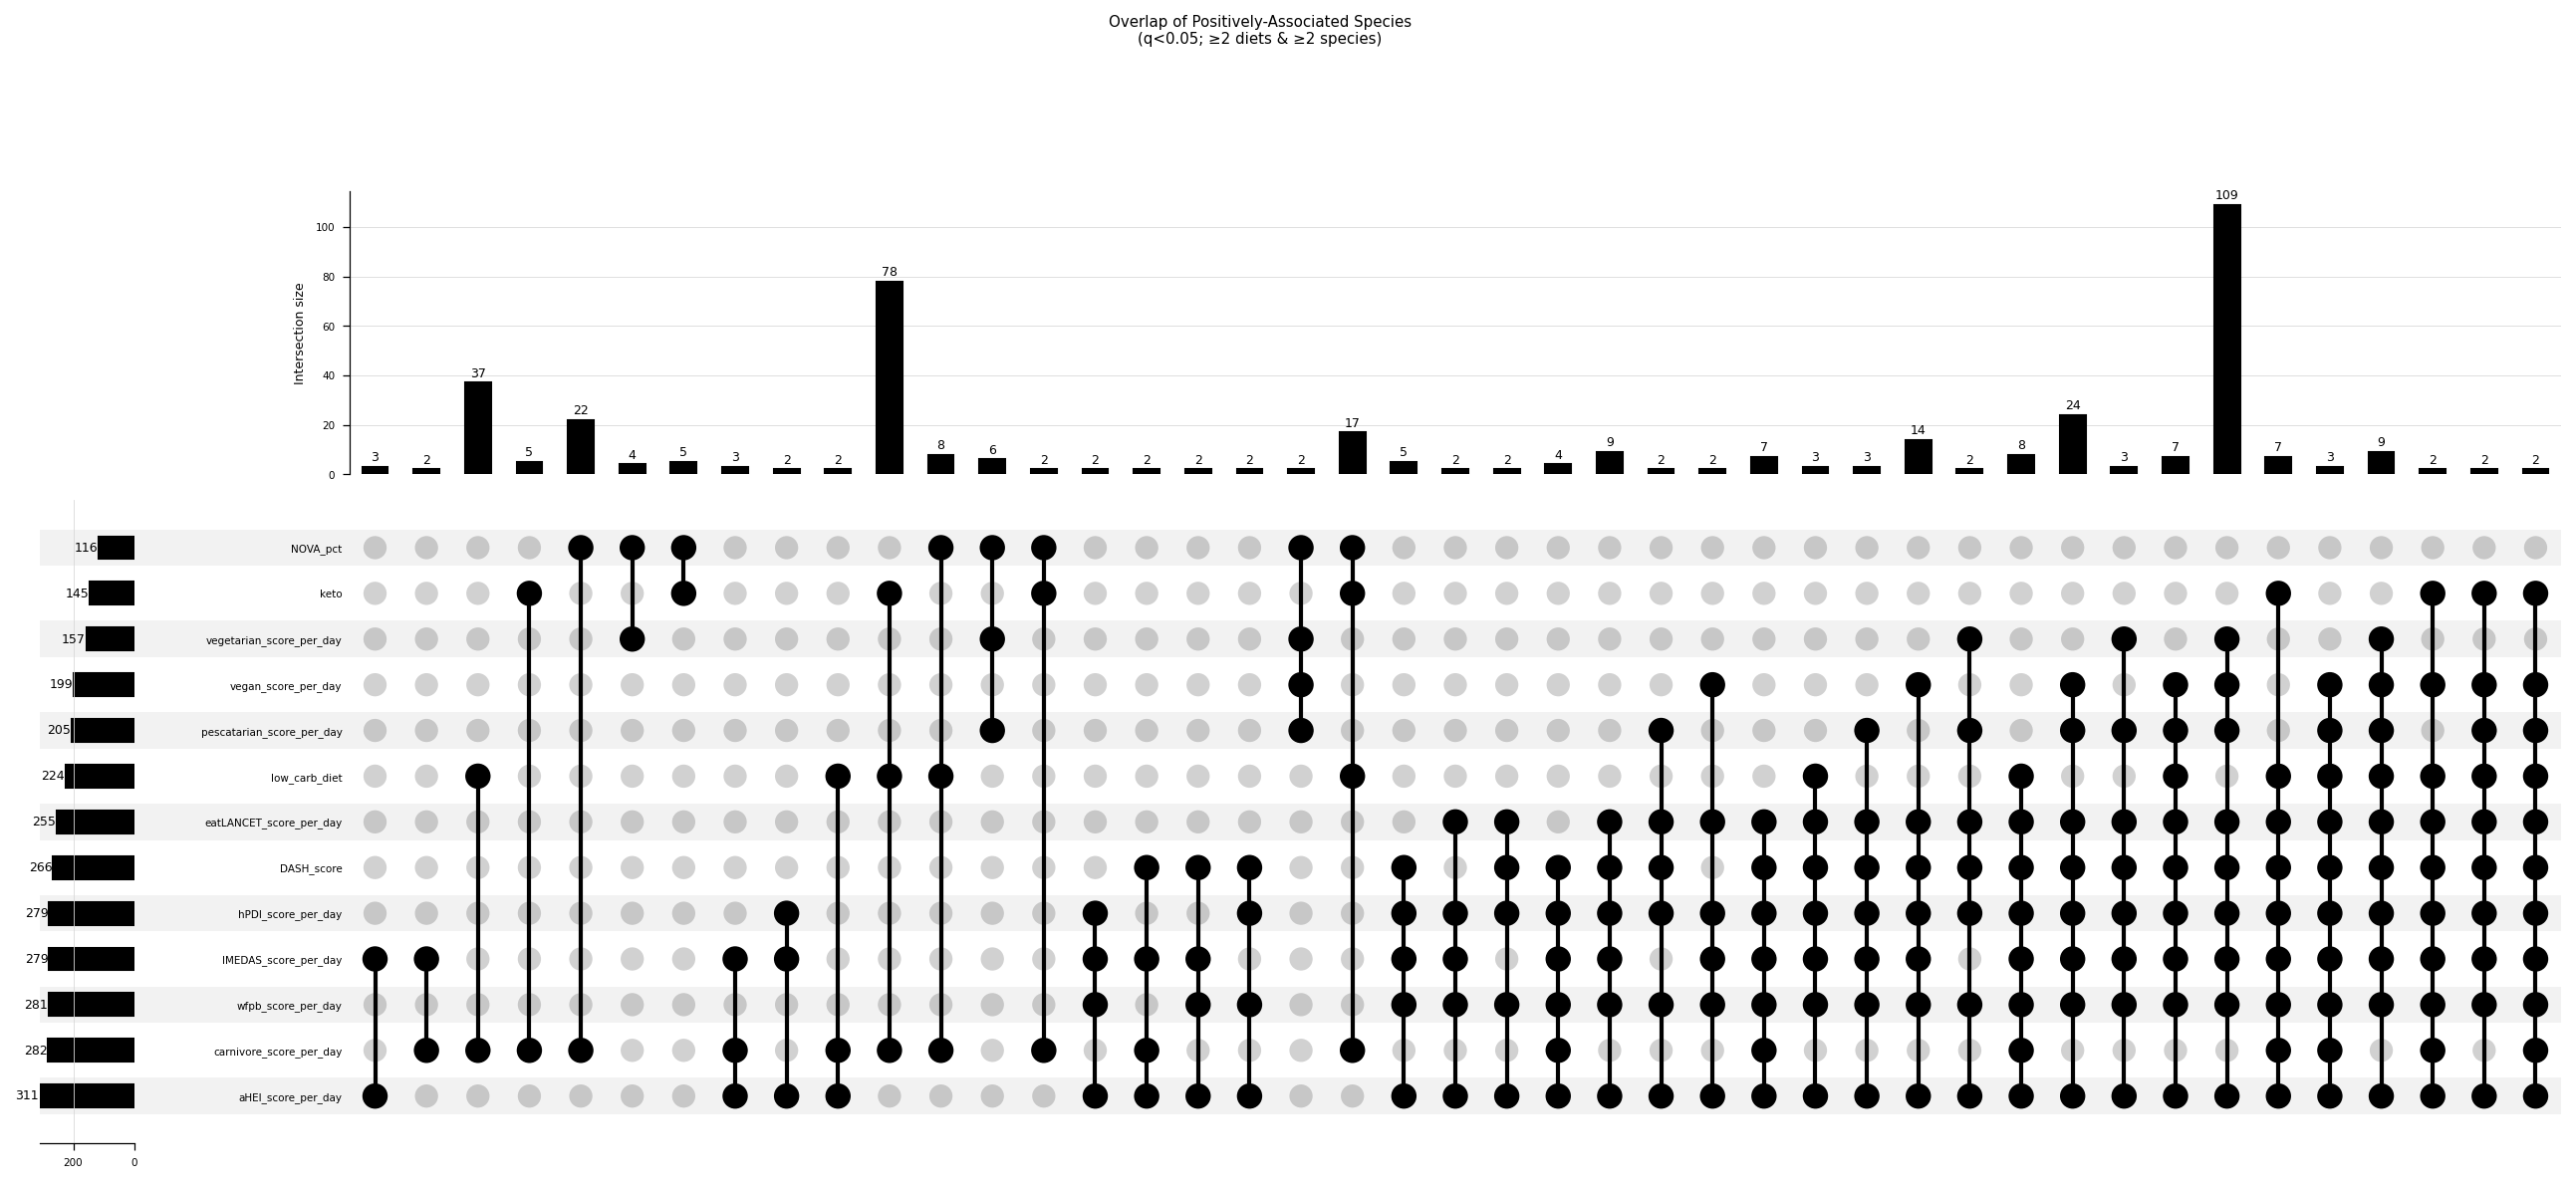

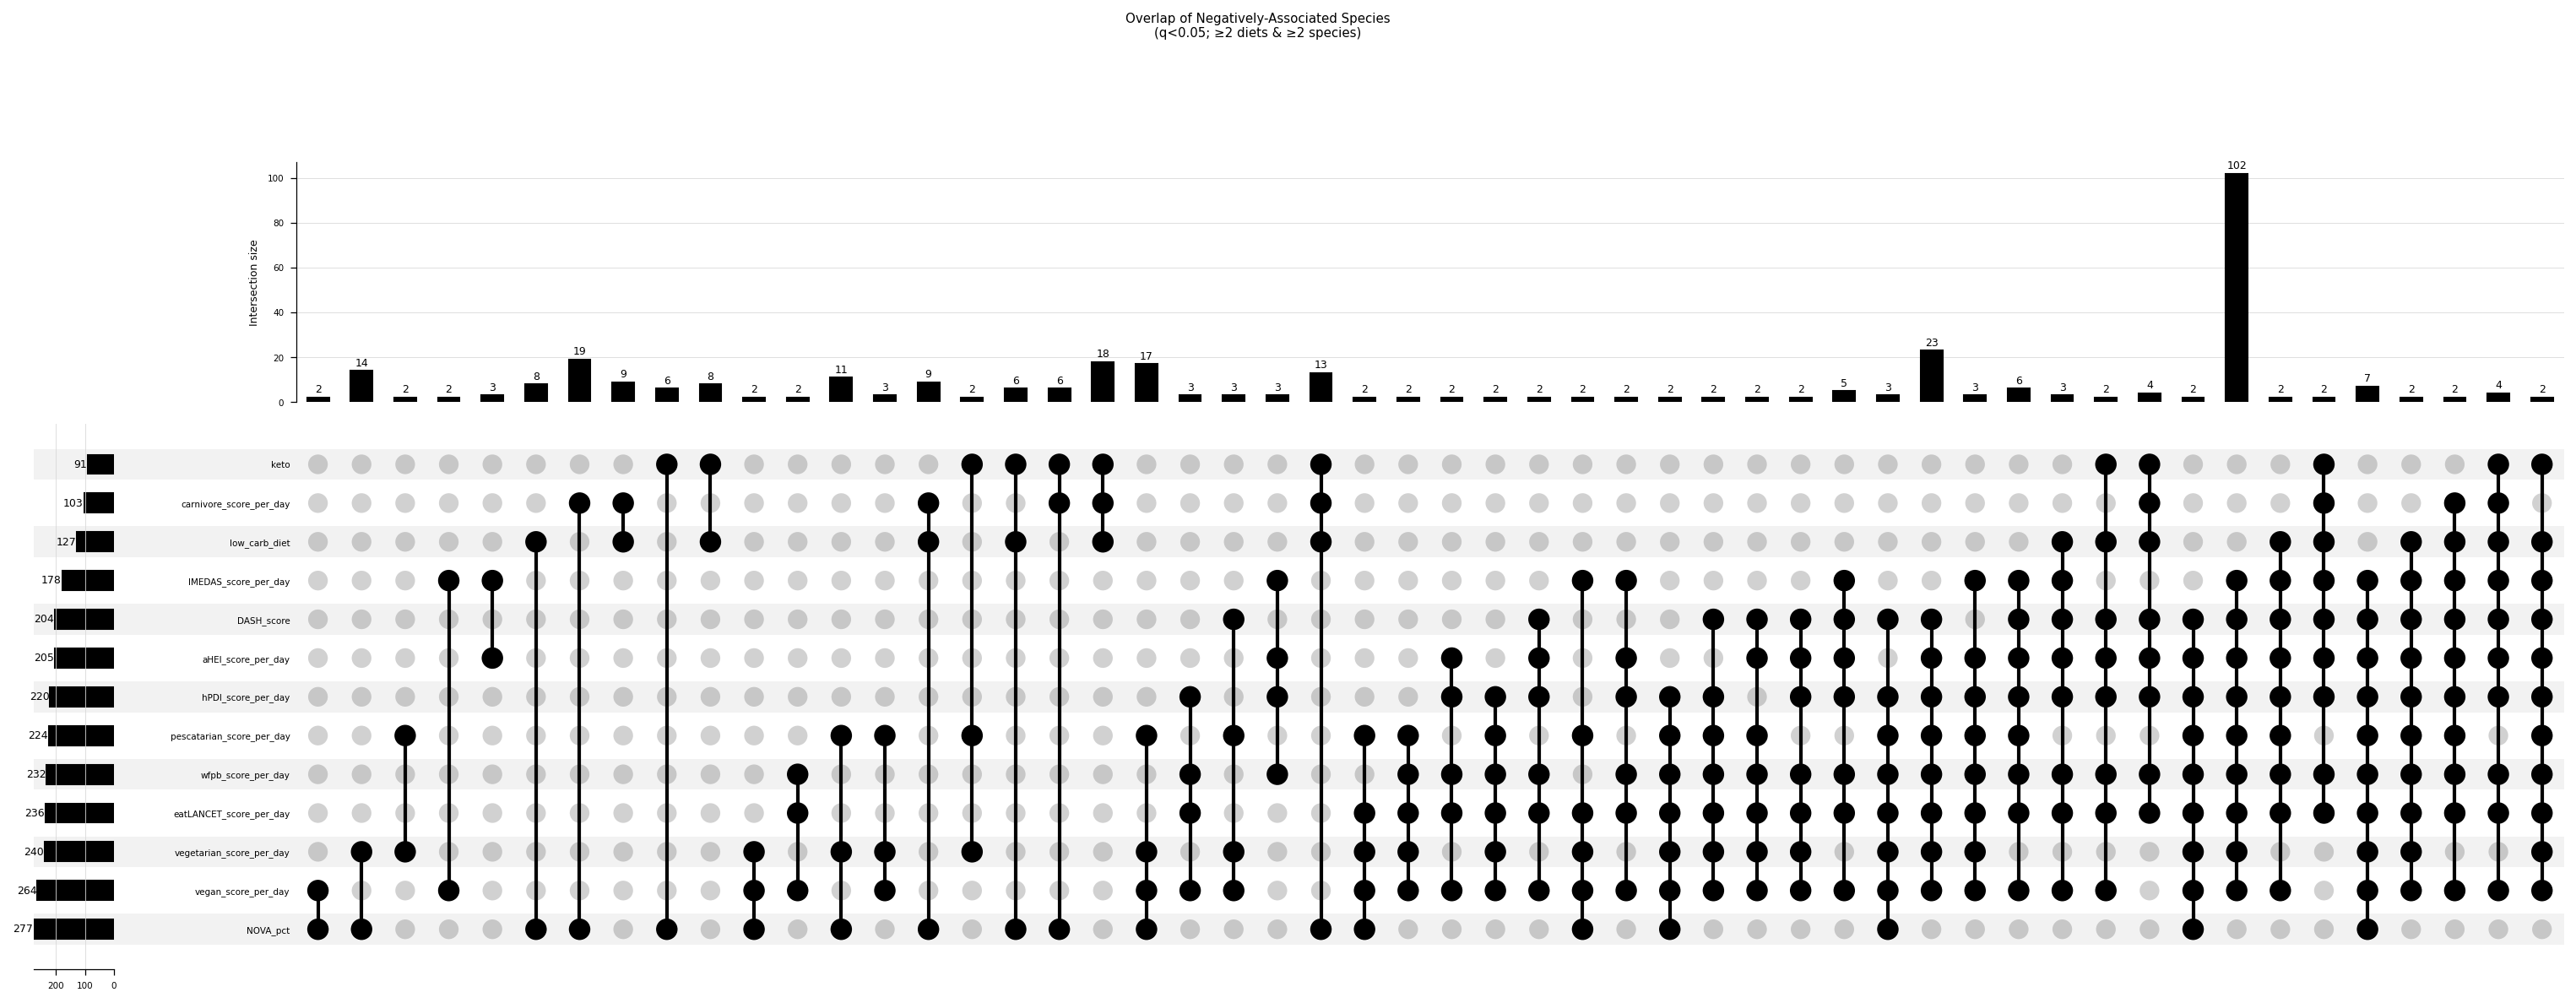

In [45]:
import matplotlib.pyplot as plt
from upsetplot import from_contents, UpSet

q_thr     = 0.05
min_diets = 2   # only intersections of ≥2 diets
min_size  = 2   # only intersections containing ≥2 species

# 1) build per-diet lists for positives and negatives
contents_pos = {}
contents_neg = {}

for diet in diet_scores:
    col_q = f"qval_{diet}"
    col_b = f"beta_{diet}"
    df = map_df[['Microbe_Name', col_q, col_b]].dropna()

    # positive
    pos = df.loc[(df[col_q] < q_thr) & (df[col_b] > 0), 'Microbe_Name']
    contents_pos[diet] = pos.unique().tolist()

    # negative
    neg = df.loc[(df[col_q] < q_thr) & (df[col_b] < 0), 'Microbe_Name']
    contents_neg[diet] = neg.unique().tolist()

# 2) helper to plot one UpSet
def plot_upset(contents, title):
    memberships = from_contents(contents)
    up = UpSet(
        memberships,
        subset_size='count',
        show_counts=True,
        sort_by='degree',
        min_degree=min_diets,
        min_subset_size=min_size
    )
    up.plot()
    plt.suptitle(title, y=1.02)
    plt.show()

# 3) plot positives
plot_upset(
    contents_pos,
    f"Overlap of Positively-Associated Species\n(q<{q_thr}; ≥{min_diets} diets & ≥{min_size} species)"
)

# 4) plot negatives
plot_upset(
    contents_neg,
    f"Overlap of Negatively-Associated Species\n(q<{q_thr}; ≥{min_diets} diets & ≥{min_size} species)"
)


How many species are unique to each diet?

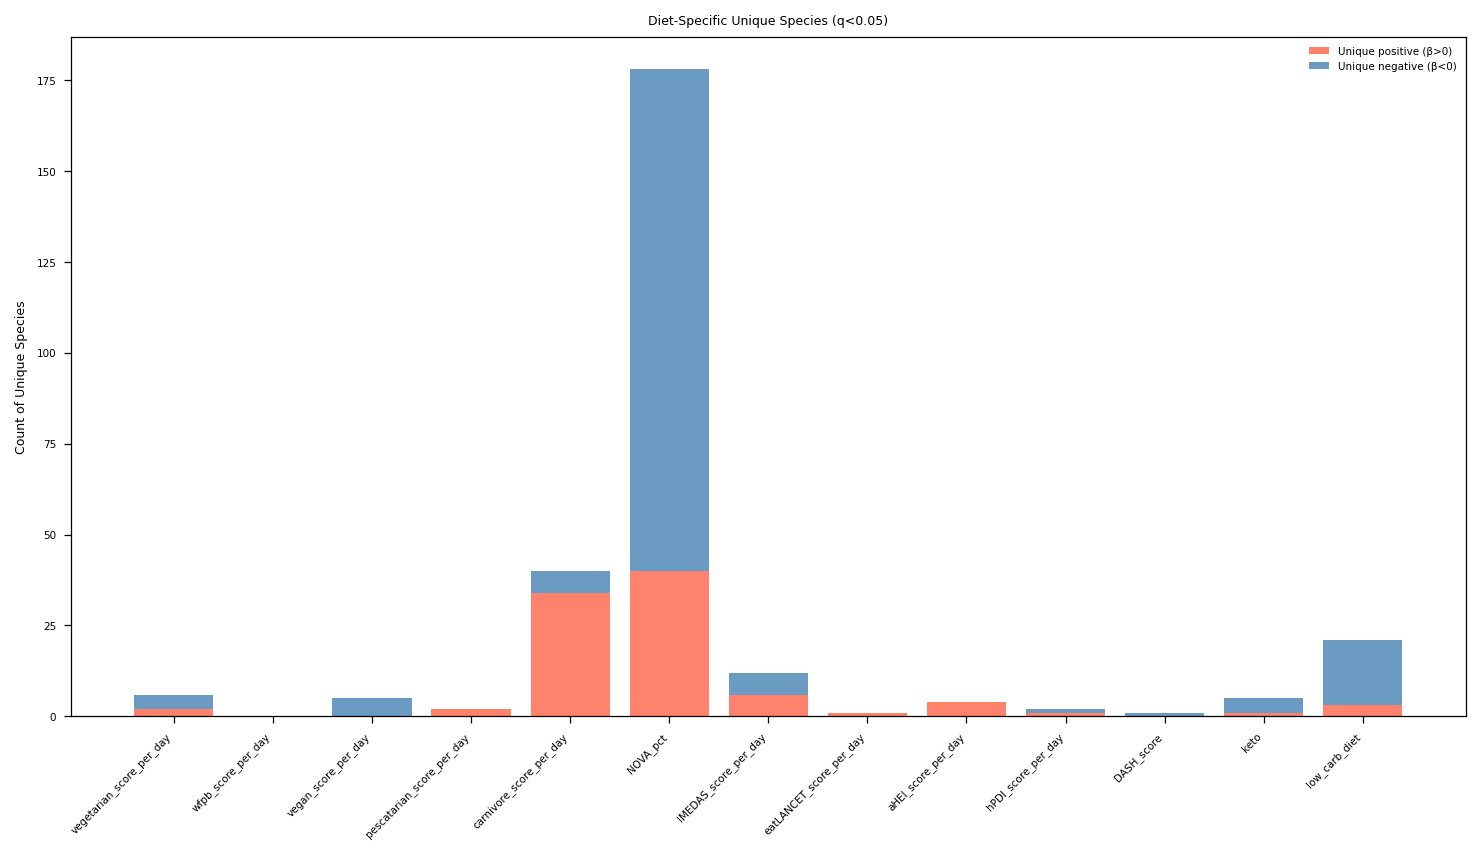

In [46]:
import matplotlib.pyplot as plt

unique_pos = {}
unique_neg = {}

all_pos = {d: set(v) for d, v in contents_pos.items()}
all_neg = {d: set(v) for d, v in contents_neg.items()}

for diet in diet_scores:
    # positive only in `diet`
    others_pos = set().union(*(all_pos[d] for d in diet_scores if d != diet))
    unique_pos[diet] = sorted(all_pos[diet] - others_pos)
    
    # negative only in `diet`
    others_neg = set().union(*(all_neg[d] for d in diet_scores if d != diet))
    unique_neg[diet] = sorted(all_neg[diet] - others_neg)


summary = pd.DataFrame({
    'diet': diet_scores,
    'n_unique_pos': [len(unique_pos[d]) for d in diet_scores],
    'unique_pos_species': [unique_pos[d]       for d in diet_scores],
    'n_unique_neg': [len(unique_neg[d]) for d in diet_scores],
    'unique_neg_species': [unique_neg[d]       for d in diet_scores],
})

diets       = summary['diet']
pos_counts  = summary['n_unique_pos']
neg_counts  = summary['n_unique_neg']

fig, ax = plt.subplots(figsize=(12, 6))

# bottom layer: positive unique species
ax.bar(diets, pos_counts, label='Unique positive (β>0)', color='tomato', alpha=0.8)

# top layer: negative unique species, stacked on positives
ax.bar(diets, neg_counts, bottom=pos_counts,
       label='Unique negative (β<0)', color='steelblue', alpha=0.8)

ax.set_ylabel('Count of Unique Species')
ax.set_title('Diet‐Specific Unique Species (q<0.05)')
ax.set_xticks(diets)
ax.set_xticklabels(diets, rotation=45, ha='right')
ax.legend()


plt.show()


Which diets yield a more similar microbiome composition, and which yield more distinct ones?

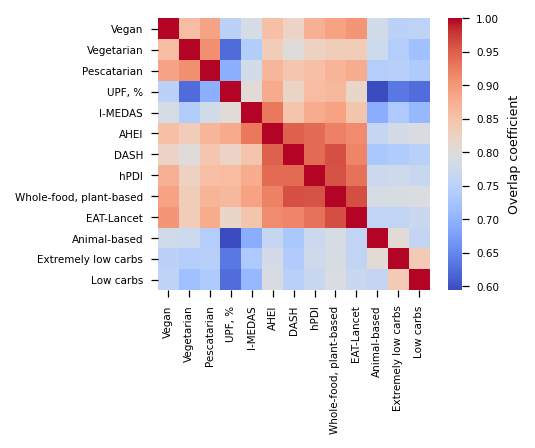

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

plt.style.use(single_style)

# build sig_species & overlap_df ---
q_thr = 0.05
sig_species = {}
for diet in diet_scores:
    qcol = f"qval_{diet}"
    df = map_df[['Microbe_Name', qcol]].dropna()
    sig_species[diet] = set(df.loc[df[qcol] < q_thr, 'Microbe_Name'].unique())

n = len(diet_scores)
# Changed variable name from 'jaccard' to 'overlap'
overlap_matrix = np.zeros((n, n), float)
for i, di in enumerate(diet_scores):
    for j, dj in enumerate(diet_scores):
        A, B = sig_species[di], sig_species[dj]
        inter = len(A & B)
        # --- MODIFIED PART ---
        # Calculate overlap coefficient instead of Jaccard
        min_len = min(len(A), len(B))
        overlap_matrix[i, j] = inter / min_len if min_len > 0 else 0.0
        # --- END MODIFIED PART ---

overlap_df = pd.DataFrame(overlap_matrix, index=diet_scores, columns=diet_scores)

# compute hierarchical clustering order on (1 - Overlap) ---
# create condensed distance matrix
dist_mat = 1 - overlap_df.values
condensed = squareform(dist_mat, checks=False)

# linkage and leaf order
Z = linkage(condensed, method='average')
order = leaves_list(Z)

# reorder DataFrame
ordered = overlap_df.iloc[order, :].iloc[:, order]
ordered_labels = [diet_scores[i] for i in order]

renamed_labels = [diet_rename_dict.get(lbl, lbl) for lbl in ordered_labels]
ordered.index = renamed_labels
ordered.columns = renamed_labels

# Plot
plt.figure()
sns.heatmap(
    ordered,
    cmap='coolwarm',
    vmin=ordered.values.min(),
    vmax=ordered.values.max(),
    xticklabels=renamed_labels,
    yticklabels=renamed_labels,
    square=True,
    cbar_kws={'label': 'Overlap coefficient'}
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/overlap_similarity_of_diet_species.png", dpi=400, facecolor="white", transparent=False, bbox_inches='tight')
plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/overlap_similarity_of_diet_species.pdf", dpi=400, facecolor="white", transparent=False, bbox_inches='tight', format='pdf')
plt.show()


/usr/wisdom/python3/lib/python3.7/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


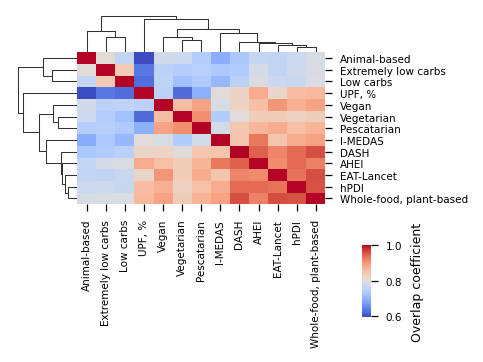

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

# build sig_species & overlap_df ---
q_thr = 0.05
sig_species = {}
for diet in diet_scores:
    qcol = f"qval_{diet}"
    df = map_df[['Microbe_Name', qcol]].dropna()
    sig_species[diet] = set(df.loc[df[qcol] < q_thr, 'Microbe_Name'].unique())

n = len(diet_scores)
# Changed variable name from 'jaccard' to 'overlap'
overlap_matrix = np.zeros((n, n), float)
for i, di in enumerate(diet_scores):
    for j, dj in enumerate(diet_scores):
        A, B = sig_species[di], sig_species[dj]
        inter = len(A & B)
        # --- MODIFIED PART ---
        # Calculate overlap coefficient instead of Jaccard
        min_len = min(len(A), len(B))
        overlap_matrix[i, j] = inter / min_len if min_len > 0 else 0.0
        # --- END MODIFIED PART ---

overlap_df = pd.DataFrame(overlap_matrix, index=diet_scores, columns=diet_scores)

# compute hierarchical clustering order on (1 - Overlap) ---
# create condensed distance matrix
dist_mat = 1 - overlap_df.values
condensed = squareform(dist_mat, checks=False)

# linkage and leaf order
Z = linkage(condensed, method='average')
order = leaves_list(Z)

# reorder DataFrame
ordered = overlap_df.iloc[order, :].iloc[:, order]
ordered_labels = [diet_scores[i] for i in order]
renamed_labels = [diet_rename_dict.get(lbl, lbl) for lbl in ordered_labels]
ordered.index = renamed_labels
ordered.columns = renamed_labels

# Plot
plt.style.use(single_style)

g = sns.clustermap(
    ordered,
    cmap='coolwarm',
    vmin=ordered.values.min(),
    vmax=ordered.values.max(),
    xticklabels=renamed_labels,
    yticklabels=renamed_labels,
    square=True,
    cbar_kws={'label': 'Overlap coefficient', 'shrink': 0.5},
    cbar_pos=(0.75, 0.12, 0.02, 0.2),
    figsize=plt.rcParams['figure.figsize'],  # <- key change
    row_cluster=True,  # <- optional if you already preordered
    col_cluster=True   # <- optional if you already preordered
)

# rotate ticklabels on the heatmap axes (not the figure)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), rotation=90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), rotation=0)

# belt-and-suspenders: ensure final size matches style exactly
g.fig.set_size_inches(*plt.rcParams['figure.figsize'])

g.fig.savefig(
    home_path + f"figures/{PROBLEM}/{SPECIES}/overlap_similarity_of_diet_species_clustered.png",
    dpi=400, facecolor="white", transparent=False, bbox_inches='tight', format='png'
)
g.fig.savefig(
    home_path + f"figures/{PROBLEM}/{SPECIES}/overlap_similarity_of_diet_species_clustered.pdf",
    dpi=400, facecolor="white", transparent=False, bbox_inches='tight', format='pdf'
)
g.fig.show()


Alpha diversity

In [49]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
import pandas as pd
import numpy as np


# Store results
results = []

# Loop over diet scores and outcome variables
for diet_score in diet_scores:
    for target in diversity_targets:
        predictors = ['age', 'sex', diet_score]

        diff_df = diet_mb[predictors + [target]].dropna()

        # Standardize all columns (predictors and target)
        scaler = StandardScaler()
        diff_df_scaled = pd.DataFrame(scaler.fit_transform(diff_df), columns=diff_df.columns, index=diff_df.index)

        X = diff_df_scaled[predictors]
        y = diff_df_scaled[target]
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()

        if diet_score in model.params:
            results.append({
                'target': target,
                'diet_score': diet_score,
                'beta': model.params[diet_score],
                'pval': model.pvalues[diet_score]
            })

# Convert to DataFrame
div_results_df = pd.DataFrame(results)

# FDR correction across all tests
div_results_df['qval'] = multipletests(div_results_df['pval'], method='fdr_bh')[1]

# View or export
div_results_df.sort_values('qval')


target                 diet_score      beta          pval  \
16           Richness         aHEI_score_per_day  0.113037  3.562851e-29   
17  Shannon_diversity         aHEI_score_per_day  0.087662  2.753982e-18   
9   Shannon_diversity    carnivore_score_per_day  0.085861  4.585441e-18   
8            Richness    carnivore_score_per_day  0.081871  1.963138e-16   
10           Richness                   NOVA_pct -0.081593  2.992579e-16   
12           Richness       IMEDAS_score_per_day  0.081170  6.762625e-16   
11  Shannon_diversity                   NOVA_pct -0.067809  9.219899e-12   
0            Richness   vegetarian_score_per_day -0.063967  3.104049e-10   
1   Shannon_diversity   vegetarian_score_per_day -0.058375  8.083600e-09   
18           Richness         hPDI_score_per_day  0.050940  6.452971e-07   
2            Richness         wfpb_score_per_day  0.049383  9.917841e-07   
5   Shannon_diversity        vegan_score_per_day -0.043441  1.353185e-05   
13  Shannon_diversity       IMEDAS_score_per_day  0.042831  1.921097e-05   
19  Shannon_diversity         hPDI_score_per_day  0.040577  6.875457e-05   
25  Shannon_diversity              low_carb_diet  0.038499  1.056563e-04   
3   Shannon_diversity         wfpb_score_per_day  0.038566  1.246753e-04   
21  Shannon_diversity                 DASH_score  0.036832  2.660065e-04   
4            Richness        vegan_score_per_day -0.034129  6.652597e-04   
6            Richness  pescatarian_score_per_day -0.033086  1.295262e-03   
20           Richness                 DASH_score  0.031998  1.610004e-03   
24           Richness              low_carb_diet  0.030186  2.471940e-03   
7   Shannon_diversity  pescatarian_score_per_day -0.029704  3.728648e-03   
14           Richness    eatLANCET_score_per_day  0.023413  2.042412e-02   
15  Shannon_diversity    eatLANCET_score_per_day  0.018988  5.899574e-02   
23  Shannon_diversity                       keto  0.017342  8.089781e-02   
22           Richness                       keto -0.000268  9.785925e-01   

            qval  
16  9.263412e-28  
17  3.580177e-17  
9   3.974048e-17  
8   1.276040e-15  
10  1.556141e-15  
12  2.930471e-15  
11  3.424534e-11  
0   1.008816e-09  
1   2.335262e-08  
18  1.677772e-06  
2   2.344217e-06  
5   2.931900e-05  
13  3.842194e-05  
19  1.276871e-04  
25  1.831376e-04  
3   2.025973e-04  
21  4.068335e-04  
4   9.609307e-04  
6   1.772464e-03  
20  2.093005e-03  
24  3.060498e-03  
7   4.406584e-03  
14  2.308814e-02  
15  6.391205e-02  
23  8.413372e-02  
22  9.785925e-01

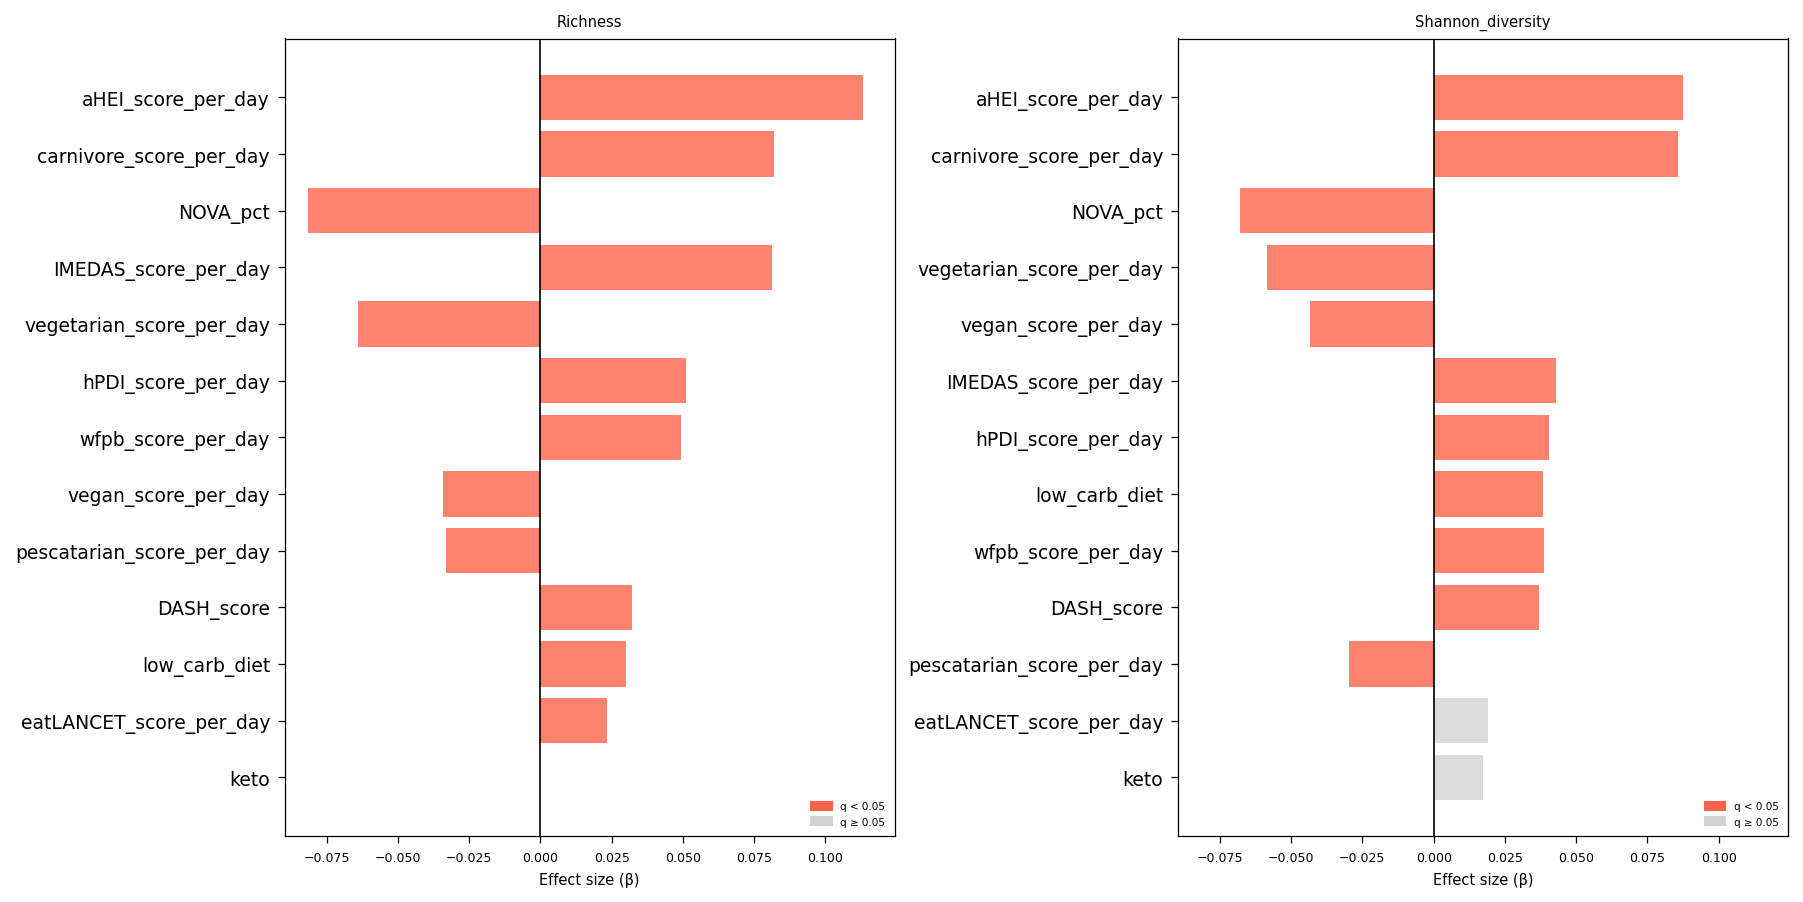

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# significance threshold
q_sig = 0.05

# assume div_results_df has columns:
# ['target', 'diet_score', 'beta', 'pval', 'qval']

metrics = div_results_df['target'].unique()

# 1) compute global x‐limits so both plots share the same scale
min_beta = div_results_df['beta'].min() * 1.1
max_beta = div_results_df['beta'].max() * 1.1
x_min = min(min_beta, 0)
x_max = max(max_beta, 0)

# prepare the figure
fig, axes = plt.subplots(1, len(metrics), figsize=(12, 6), sharey=False)

# create legend patches once
red_patch  = mpatches.Patch(color='tomato',    label=f'q < {q_sig}')
grey_patch = mpatches.Patch(color='lightgray', label=f'q ≥ {q_sig}')

for ax, metric in zip(axes, metrics):
    dfm = (
        div_results_df[div_results_df['target'] == metric]
        .sort_values('qval', ascending=True)
        .reset_index(drop=True)
    )
    
    y = np.arange(len(dfm))
    colors = ['tomato' if q < q_sig else 'lightgray' for q in dfm['qval']]
    
    bars = ax.barh(
        y,
        dfm['beta'],
        color=colors,
        alpha=0.8
    )
    ax.axvline(0, color='black', linewidth=0.8)
    
    ax.set_yticks(y)
    ax.set_yticklabels(dfm['diet_score'], fontsize=9)
    ax.invert_yaxis()              # most significant at top
    ax.set_xlabel('Effect size (β)')
    ax.set_title(f'{metric}')
    
    # 2) remove individual q‐value annotations (so no text here)
    
    # 3) add the correct legend (one red, one grey)
    ax.legend(
        handles=[red_patch, grey_patch],
        loc='lower right',
        frameon=False
    )
    
    # 1) apply the shared x‐limits
    ax.set_xlim(x_min, x_max)


plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/diet_comparisons_diversity.png", dpi=400, facecolor="white", transparent=False)
plt.show()


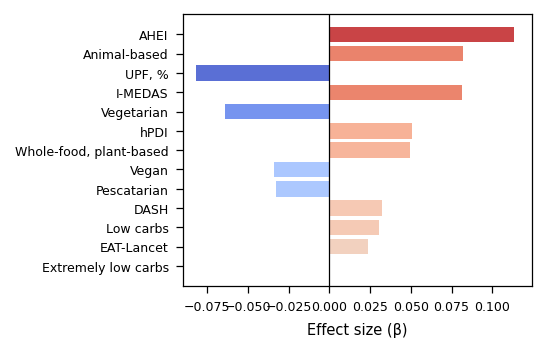

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib.cm as cm

plt.style.use(single_style)
# significance threshold
q_sig = 0.05

# assume div_results_df has columns:
# ['target', 'diet_score', 'beta', 'pval', 'qval']

metrics = div_results_df['target'].unique()

# pick "Richness" explicitly if present, otherwise fall back to the first target
metric = next((m for m in metrics if str(m).lower().startswith('rich')), metrics[0])

# 1) compute global x-limits so the scale reflects the full dataset
min_beta = div_results_df['beta'].min() * 1.1
max_beta = div_results_df['beta'].max() * 1.1
x_min = min(min_beta, 0)
x_max = max(max_beta, 0)

# filter for the chosen metric and sort by significance
dfm = (
    div_results_df[div_results_df['target'] == metric]
    .sort_values('qval', ascending=True)
    .reset_index(drop=True)
)

# pretty labels using diet_rename_dict
dfm['pretty'] = dfm['diet_score'].map(diet_rename_dict).fillna(dfm['diet_score'])

y = np.arange(len(dfm))

# 2) color bars by coolwarm palette centered at 0
norm = TwoSlopeNorm(vmin=x_min, vcenter=0, vmax=x_max)
cmap = cm.get_cmap('coolwarm')
colors = cmap(norm(dfm['beta'].values))

# prepare a single-panel figure
fig, ax = plt.subplots()

bars = ax.barh(
    y,
    dfm['beta'],
    color=colors,
    alpha=0.9
)

ax.axvline(0, color='black', linewidth=0.6)

ax.set_yticks(y)
ax.set_yticklabels(dfm['pretty'])
ax.invert_yaxis()              # most significant at top
ax.set_xlabel('Effect size (β)')

# apply x-limits
ax.set_xlim(x_min, x_max)

plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/diet_comparisons_diversity_richness.png",
            dpi=400, facecolor="white", transparent=False, bbox_inches='tight')
plt.savefig(home_path + f"figures/{PROBLEM}/{SPECIES}/diet_comparisons_diversity_richness.pdf",
            dpi=400, facecolor="white", transparent=False, bbox_inches='tight', format='pdf')
plt.show()


Cluster Analysis

In [49]:
diet_clusters = {
    'Cluster_1_Meditteranean': ['wfpb_score_per_day', 'IMEDAS_score_per_day', 'eatLANCET_score_per_day', 'aHEI_score_per_day',
                                'hPDI_score_per_day', 'DASH_score'],
    'Cluster_2_Restricted_animal_products': ['vegetarian_score_per_day', 'vegan_score_per_day','pescatarian_score_per_day'],
    'Cluster_3_UPF': ['NOVA_pct'],
    'Cluster_4_low_carb': ['carnivore_score_per_day', 'keto', 'low_carb_diet']
}


--- Generating plot for Cluster_1_Meditteranean ---


/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


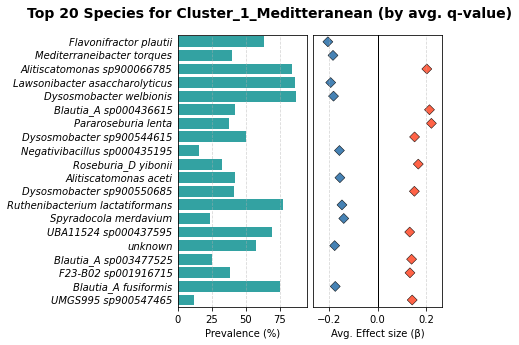

--- Generating plot for Cluster_2_Restricted_animal_products ---


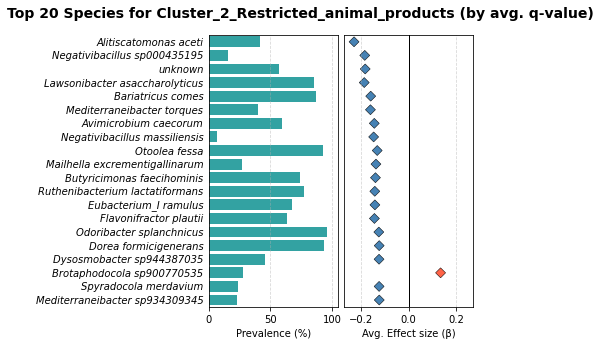

--- Generating plot for Cluster_3_UPF ---


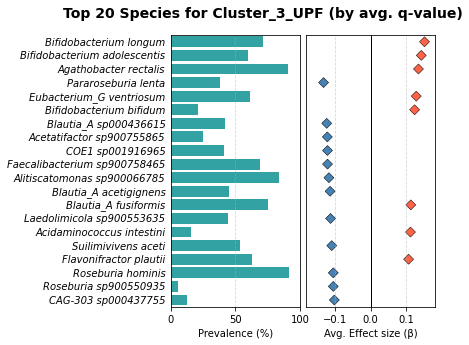

--- Generating plot for Cluster_4_low_carb ---


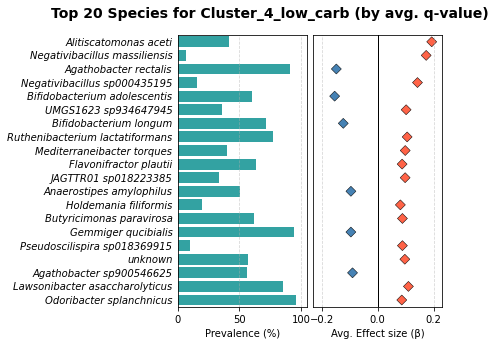

In [50]:
def plot_top20_cluster(cluster_name, diets_in_cluster, top_n=20):
    """
    Analyzes and plots the top N microbes for a given diet cluster.
    
    This function calculates the average q-value and beta-value for each microbe
    across all diets within the cluster. It then identifies the top N microbes
    based on the average q-value and generates a three-panel plot.
    
    Args:
        cluster_name (str): The name of the cluster for titling.
        diets_in_cluster (list): A list of diet names belonging to the cluster.
        top_n (int): The number of top microbes to plot.
    """
    
    # Create copies of the relevant q-value and beta columns
    qval_cols = [f'qval_{d}' for d in diets_in_cluster]
    beta_cols = [f'beta_{d}' for d in diets_in_cluster]
    
    # Create a temporary dataframe for calculations
    temp_df = map_df.copy()
    
    # Calculate the mean q-value and beta for the cluster
    temp_df['avg_qval'] = temp_df[qval_cols].mean(axis=1)
    temp_df['avg_beta'] = temp_df[beta_cols].mean(axis=1)

    # --- Data Selection and Sorting ---
    # Pick & sort top N by the new average q–value
    top20 = (
        temp_df
        .nsmallest(top_n, 'avg_qval')
        .sort_values('avg_qval', ascending=False)
        .reset_index(drop=True)
    )
    
    names      = top20['Microbe_Name']
    prevalence = top20['prevalence_pct']
    betas      = top20['avg_beta'] # Use the average beta for the plot
    n          = len(top20)
    y          = np.arange(n)

    # --- Plotting ---
    # Build a 1×3 grid: [names | prevalence | betas]
    fig = plt.figure(figsize=(6, 5))
    gs  = fig.add_gridspec(1, 3, width_ratios=[0.4, 0.8, 0.8], wspace=0.05)

    ax_names = fig.add_subplot(gs[0, 0])
    ax_prev  = fig.add_subplot(gs[0, 1], sharey=ax_names)
    ax_beta  = fig.add_subplot(gs[0, 2], sharey=ax_names)

    # Panel 1: Microbe Names
    ax_names.axis('off')
    ax_names.set_ylim(n - 0.5, -0.5)
    for i, nm in enumerate(names):
        ax_names.text(1.0, i, nm, 
                      ha='right', va='center', 
                      fontsize=10, style='italic')

    # Panel 2: Prevalence
    ax_prev.barh(y, prevalence, color='darkcyan', alpha=0.8)
    ax_prev.set_xlabel('Prevalence (%)')
    ax_prev.set_xlim(0, prevalence.max() * 1.1)
    ax_prev.grid(axis='x', linestyle='--', alpha=0.5)
    ax_prev.invert_yaxis() # To match names and have top one at the top
    plt.setp(ax_prev.get_yticklabels(), visible=False)


    # Panel 3: Average Effect Sizes (Betas)
    colors = ['steelblue' if β < 0 else 'tomato' for β in betas]
    ax_beta.scatter(betas, y, marker='D', c=colors, s=50, edgecolors='k', linewidths=0.5)
    ax_beta.axvline(0, color='black', linestyle='-', lw=1)
    ax_beta.set_xlabel('Avg. Effect size (β)')
    
    # Set x-axis limits to be symmetrical around 0 if possible, or just wide enough
    xmin, xmax = ax_beta.get_xlim()
    x_abs_max = max(abs(xmin), abs(xmax)) * 1.1
    ax_beta.set_xlim(-x_abs_max, x_abs_max)
    
    ax_beta.grid(axis='x', linestyle='--', alpha=0.5)
    ax_beta.set_yticks([]) # Remove y-ticks as they are shared

    # Super-title for the entire figure
    fig.suptitle(f'Top {top_n} Species for {cluster_name} (by avg. q-value)', 
                 fontsize=14, y=0.96, weight='bold')
    
    plt.tight_layout(rect=[0, 0, 1, 0.92]) # Adjust layout to make space for suptitle
    plt.show()


# --- Main Execution Loop ---
# Run the analysis for each defined cluster
for name, diets in diet_clusters.items():
    print(f"--- Generating plot for {name} ---")
    plot_top20_cluster(name, diets)

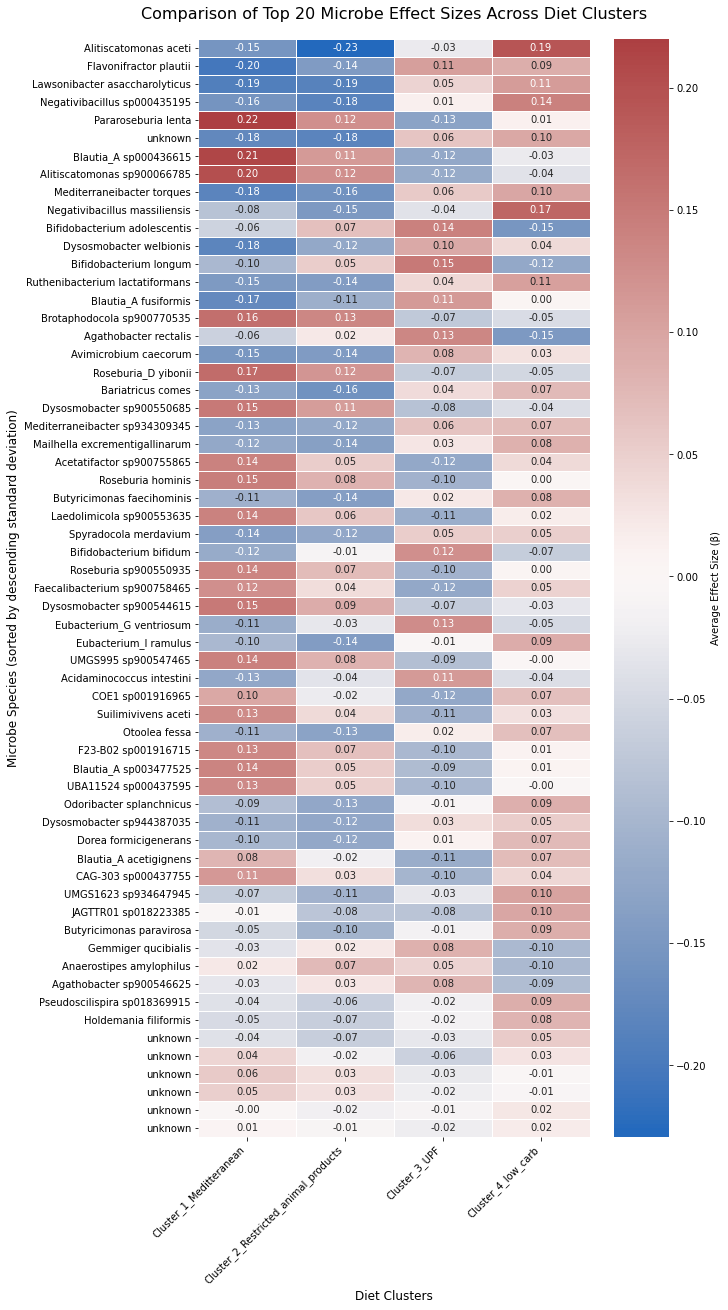

In [51]:

# --- New Function to Generate Comparison Heatmap ---
def plot_cluster_comparison_heatmap(map_df, diet_clusters, top_n=20):
    """
    Generates a heatmap to compare the average effect sizes (betas) of top
    microbes across different diet clusters.

    Args:
        map_df (pd.DataFrame): The main dataframe with microbe data.
                               Must contain a 'Microbe_Name' column.
        diet_clusters (dict): A dictionary where keys are cluster names and
                              values are lists of diet names.
        top_n (int): The number of top microbes to select from each cluster.
    """
    
    # --- Step 0: Ensure 'Microbe_Name' is the index for calculations ---
    # This makes the function robust regardless of the input DataFrame's index.
    internal_map_df = map_df.set_index('Microbe_Name')

    # --- Step 1: Calculate average betas and find top microbes for each cluster ---
    all_top_microbes = set()
    cluster_beta_data = {}

    for cluster_name, diets in diet_clusters.items():
        qval_cols = [f'qval_{d}' for d in diets]
        beta_cols = [f'beta_{d}' for d in diets]
        
        # Calculate average q-value and beta for the current cluster
        avg_qval = internal_map_df[qval_cols].mean(axis=1)
        avg_beta = internal_map_df[beta_cols].mean(axis=1)
        
        # Store the average betas for later use
        cluster_beta_data[cluster_name] = avg_beta
        
        # Find the top N microbes for this cluster and add to the global set
        top_microbes_in_cluster = avg_qval.nsmallest(top_n).index
        all_top_microbes.update(top_microbes_in_cluster)

    # --- Step 2: Create a comparison DataFrame ---
    # This dataframe will have microbes as rows and clusters as columns
    comparison_df = pd.DataFrame(cluster_beta_data)
    
    # Filter the dataframe to only include the top microbes from all clusters
    # The index here will be the Microbe_Name, which is what we want for the plot
    comparison_df = comparison_df.loc[list(all_top_microbes)]

    # --- Step 2.5: Sort microbes by variance across clusters ---
    # Calculate the standard deviation of beta values for each microbe across clusters
    # This highlights microbes with the most differential abundance.
    comparison_df['stdev'] = comparison_df.std(axis=1)
    # Sort the DataFrame by this standard deviation in descending order
    comparison_df = comparison_df.sort_values('stdev', ascending=False)
    # Drop the temporary column so it's not plotted
    del comparison_df['stdev']

    # --- Step 3: Generate the Heatmap ---
    plt.figure(figsize=(10, max(8, len(comparison_df) * 0.3))) # Adjust height based on number of microbes
    
    sns.heatmap(
        comparison_df,
        annot=True,          # Show the beta values in the cells
        cmap='vlag',         # A diverging colormap (blue-white-red)
        center=0,            # Center the colormap at zero
        linewidths=.5,       # Add lines between cells
        fmt=".2f",           # Format annotations to two decimal places
        cbar_kws={'label': 'Average Effect Size (β)'} # Label for the color bar
    )
    
    plt.title(f'Comparison of Top {top_n} Microbe Effect Sizes Across Diet Clusters', fontsize=16, pad=20)
    plt.xlabel('Diet Clusters', fontsize=12)
    plt.ylabel('Microbe Species (sorted by descending standard deviation)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate cluster names for better readability
    plt.yticks(rotation=0)
    
    plt.show()


# --- Main Execution ---
# Call the new function to generate the heatmap
plot_cluster_comparison_heatmap(map_df, diet_clusters)

Beta Diversity

In [52]:
# # Re-import required packages after code execution state reset
# import pandas as pd
# import numpy as np
# from skbio.diversity import beta_diversity
# from skbio.stats.distance import permanova
# from skbio.stats.ordination import pcoa
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Simulated data for demonstration
# np.random.seed(0)
# n_samples = 100
# n_taxa = 20

# microbiome_df = diet_mb[targets]

# # Define quantiles
# diet_score_col = 'aHEI_score_per_day'
# threshold_high = diet_mb[diet_score_col].quantile(0.9)
# threshold_low = diet_mb[diet_score_col].quantile(0.1)

# # Assign diet group
# diet_mb["diet_group"] = "middle"
# diet_mb.loc[diet_mb[diet_score_col] >= threshold_high, "diet_group"] = "high"
# diet_mb.loc[diet_mb[diet_score_col] <= threshold_low, "diet_group"] = "low"

# # Subset to only high and low for clearer contrast
# selected_samples = diet_mb[diet_mb["diet_group"].isin(["high", "low"])].index
# X = microbiome_df.loc[selected_samples]
# X = X.fillna(0)  # just in case

# # Compute Bray-Curtis distance
# bc_dm = beta_diversity("braycurtis", X.values, ids=X.index)

# # Run PERMANOVA
# grouping = diet_mb.loc[selected_samples, "diet_group"]
# permanova_results = permanova(distance_matrix=bc_dm, grouping=grouping, permutations=999)

# # Perform PCoA
# ordination = pcoa(bc_dm)
# df_coords = ordination.samples
# df_coords["group"] = grouping.values

# # Plot PCoA
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=df_coords, x="PC1", y="PC2", hue="group", alpha=0.8)
# plt.title("PCoA of Bray-Curtis Distances")
# plt.xlabel(f"PC1 ({ordination.proportion_explained[0]:.1%})")
# plt.ylabel(f"PC2 ({ordination.proportion_explained[1]:.1%})")
# 
# plt.show()

# # Display PERMANOVA results
# permanova_results
